# Simulating The Spread of Heat Through a Material
> Written by David Mascharka and Ryan Soklaski

## Understanding the Heat Propagation
In this problem, we will learn about a simple algorithm for numerically simulating the spread of heat through a material. We will want to use vectorization to write an efficient algorithm.

Imagine that we have a rectangular piece of steel. For now, let's treat this piece of steel as a 5x5 grid - we are only able to measure the average temperature of each of these 25 grid regions. Let's assume that steel starts off at a uniform 0-degrees. Thus, our temperature readout for each of its grid positions is:

```
                                0     0     0     0     0 
                                0     0     0     0     0 
                                0     0     0     0     0 
                                0     0     0     0     0 
                                0     0     0     0     0 
```

Now, we will clamp hot contacts, which are always at a constant 100-degrees, along the outer edges of the steel. Upon clamping these contacts, our temperature readout at time-0 becomes:

```
                               100   100   100   100   100
                               100    0     0     0    100
                               100    0     0     0    100
                               100    0     0     0    100
                               100   100   100   100   100
```

We will adopt the same indexing scheme as a 2D NumPy array. That is, element (i,j) of this grid is row-i, column-j in the grid. The top-left corner is located at (0, 0), and has a temperature of 100. 

Moving forward, we want to describe, numerically, how the heat from the contacts will spread through the material as time carries on. The heat equation is a partial differential equation that describes the flow of heat through space and time. In the following equation, the function $u(x, y, t)$ describes how much heat resides at the location $(x, y)$ at time $t$:

\begin{equation}
\frac{\partial u}{\partial t} - \alpha \left(\frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} \right)= 0
\end{equation}

Do not worry if you have no clue what a partial differential equation is! You do not need to know anything about the heat equation, we are simply providing some background here. 

What this equation ultimately says is that heat will spread such that a point will take on the average amount of heat among its neighboring points. Numerically, we can write this out as:

\begin{equation}
u^{(t)}_{ij} = \frac{u^{(t-1)}_{i+1,j} + u^{(t-1)}_{i-1,j} + u^{(t-1)}_{i,j+1} + u^{(t-1)}_{i,j-1}}{4}
\end{equation}

That is, $u^{(t)}_{ij}$ is the heat at grid-location $(i, j)$ at time-step $t$. It's value is given by the average of the heat of all four of its neighboring grid positions from time-step $t-1$. See that the right side of the equation averages the heat from above, below, left-of, and right-of $(i, j)$, at time-step $t-1$. This means of evolving the heat through our gridded material is known as the *finite difference method*.

Let's using the finite difference method to figure out what the distribution of heat looks like throughout our steel square at time-step 1. Keep in mind that we need not update any of the outer-edges of the steel - those positions are held at a fixed heat. We'll start at the upper-left corner and get

\begin{equation}
u^{t=1}_{1,1} = \frac{0 + 100 + 0 + 100}{4} = 50\\
u^{t=1}_{1,2} = \frac{0 + 100 + 0 + 0}{4} = 25\\
\end{equation}

and so on, yielding the heat distribution at timestep-1 of:
```
                                100   100   100   100   100
                                100    50    25    50   100
                                100    25     0    25   100
                                100    50    25    50   100
                                100   100   100   100   100
```

Repeating this process again will produce the heat distribution at timestep-2, and so on. After many iterations, we see the entire region becomes 100 degrees. This is because the heat from the edges flows inward until everything is the same temperature. This stabilized distribution of heat is known as the *steady state*. If we change the boundary conditions, i.e. change what we clamp to the edges of our steel, we will observe different steady states.


## Problem 1: A Simple Implementation of Finite Differences
Write a Python function that takes in a 2-dimensional numpy-array containing heat-values, and uses the finite difference method to produce the heat distribution for that material at the next time-step. Do this using simple for-loops to iterate over the values of the array.

Assume that the boundary-values of the array are fixed, so you need not update them. However, do *not* assume that the boundary values are all the same as one another, as they were in the preceding example.

Also, be careful not to change the content of the array that your function is given. You need to use the values in that array, unchanged, to compute the new heat distribution. Consider making use of `np.copy` to create a copy of the input array (so that your new array will have the appropriate boundary values).

In [10]:
# make sure to execute this cell so that your function is defined
# you must re-run this cell any time you make a change to this function
import numpy as np
def evolve_heat_slow(u):
    """ Given a 2D array of heat-values (at fixed boundary), produces
        the new heat distribution after one iteration of the finite 
        difference method.
        
        Parameters
        ----------
        u : numpy.ndarray shape=(M, N)
            An MxN array of heat values at time-step t-1.
            (M and N are both at least 2)
        
        Returns
        -------
        numpy.ndarray, shape=(M, N)
            An MxN array of heat values at time-step t.
        """       
    # student code goes here
    u2 = u.copy()
#     print(u2)
    inds = []
    x = np.size(u,0)
    y = np.size(u,1)
    for xx in range(0,x):
        for yy in range(0,y):
            ind = (xx,yy)
            ind = tuple(ind)
            inds.append(ind)
    inde = np.array(inds)
    for x1,y1 in inde:
        if not x1==0 and not x1==x-1 and not y1==0 and not y1==y-1:
            avg = (u[x1-1,y1]+u[x1+1,y1]+u[x1,y1-1]+u[x1,y1+1])/4
            u2[x1,y1]=avg
    print(u,"\n", u2)
    return u2

In [11]:
from bwsi_grader.python.heat_dispersion import grader
grader(evolve_heat_slow, grade_ver=1)

[[100. 100. 100. 100. 100.]
 [100.   0.   0.   0. 100.]
 [100.   0.   0.   0. 100.]
 [100.   0.   0.   0. 100.]
 [100. 100. 100. 100. 100.]] 
 [[100. 100. 100. 100. 100.]
 [100.  50.  25.  50. 100.]
 [100.  25.   0.  25. 100.]
 [100.  50.  25.  50. 100.]
 [100. 100. 100. 100. 100.]]
[[100. 100. 100. 100. 100.]
 [100.   0.   0.   0. 100.]
 [100. 100. 100. 100. 100.]] 
 [[100. 100. 100. 100. 100.]
 [100.  75.  50.  75. 100.]
 [100. 100. 100. 100. 100.]]
[[0.55 0.19 0.95 0.23 0.19 0.2 ]
 [0.77 0.19 0.85 0.97 0.86 0.6 ]
 [0.99 0.1  0.69 0.14 0.84 0.17]
 [0.88 0.49 0.72 0.03 0.72 0.79]
 [0.72 0.39 0.02 0.62 0.49 0.23]
 [0.03 0.2  0.63 0.69 0.29 0.62]
 [0.03 0.59 0.83 0.05 0.67 0.5 ]] 
 [[0.55   0.19   0.95   0.23   0.19   0.2   ]
 [0.77   0.4775 0.7    0.52   0.65   0.6   ]
 [0.99   0.59   0.4525 0.6325 0.4725 0.17  ]
 [0.88   0.5225 0.3075 0.55   0.5375 0.79  ]
 [0.72   0.3575 0.59   0.3075 0.465  0.23  ]
 [0.03   0.41   0.435  0.3975 0.6175 0.62  ]
 [0.03   0.59   0.83   0.05   0.67   0.5

[[0.09 0.83 0.4  0.21 0.24 0.59 0.48]
 [0.63 0.19 0.94 0.29 0.66 0.98 0.2 ]
 [0.27 0.3  0.49 0.58 0.27 0.37 0.18]
 [0.23 0.63 0.99 0.44 0.65 0.24 0.  ]
 [0.89 0.62 0.23 0.9  0.07 0.14 0.32]
 [0.95 0.75 0.59 0.93 0.16 0.54 0.83]
 [0.5  0.08 0.52 0.75 0.7  0.96 0.24]] 
 [[0.09   0.83   0.4    0.21   0.24   0.59   0.48  ]
 [0.63   0.675  0.3425 0.5975 0.445  0.455  0.2   ]
 [0.27   0.395  0.7025 0.3725 0.565  0.4175 0.18  ]
 [0.23   0.535  0.4475 0.78   0.255  0.29   0.    ]
 [0.89   0.625  0.775  0.4175 0.4625 0.2925 0.32  ]
 [0.95   0.56   0.6075 0.6    0.56   0.5225 0.83  ]
 [0.5    0.08   0.52   0.75   0.7    0.96   0.24  ]]
[[0.13 0.13 0.83 0.34 0.19 0.59 0.91]
 [0.18 0.98 0.81 0.35 0.24 0.25 0.16]] 
 [[0.13 0.13 0.83 0.34 0.19 0.59 0.91]
 [0.18 0.98 0.81 0.35 0.24 0.25 0.16]]
[[0.37 0.98 0.79]
 [0.   0.99 0.4 ]
 [0.46 0.15 0.67]
 [0.11 0.14 0.96]
 [0.4  0.47 0.36]] 
 [[0.37   0.98   0.79  ]
 [0.     0.3825 0.4   ]
 [0.46   0.565  0.67  ]
 [0.11   0.4225 0.96  ]
 [0.4    0.47   0.36 

Armed with this function, we will find the steady state of a more finely-gridded sheet of steel, with a less trivial set of boundary heat-values.

We will create an 80x96 grid with the following boundary conditions:

- Along the top row, we linearly increase the heat from 0 to 300 degrees from left to right
- Along the bottom row, we fade from 0 to 80 degrees at the middle and back to 0 on the right
- Along the left side, we linearly increase from 0 degrees at the bottom to 90 at the top (note that the very corner point is 0 from the 0 -> 300 continuum above)
- Along the right side, we linearly increase the heat from 0 to 300 degrees from bottom to top

In [12]:
# creating the 80x96-grid sheet with the non-trivial boundary conditions
# simply execute this cell; you need not change anything.

import numpy as np
# discretize our rectangle into an 80x96 grid
rows = 80     
columns = 96
u = np.zeros((rows, columns))

# set up the boundary conditions
u[0] = np.linspace(0, 300, columns)                # top row runs 0 -> 300
u[1:,0] = np.linspace(90, 0, rows-1)               # left side goes 0 -> 90 bottom to top
u[-1,:columns//2] = np.linspace(0, 80, columns//2) # 0 (left) to 80 (middle) along the bottom
u[-1,columns//2:] = np.linspace(80, 0, columns//2) # 80 (middle) to 0 (left) along the bottom
u[:,-1] = np.linspace(300,0,rows)                  # 0 -> 300 bottom to top along the right

Let's plot the initial condition for this steel sheet. You should see a "hot spot" in the top-right corner, and varying amounts of heat elsewhere on the boundary. Check that this corresponds to the boundary conditions that we imposed.

<IPython.core.display.Javascript object>


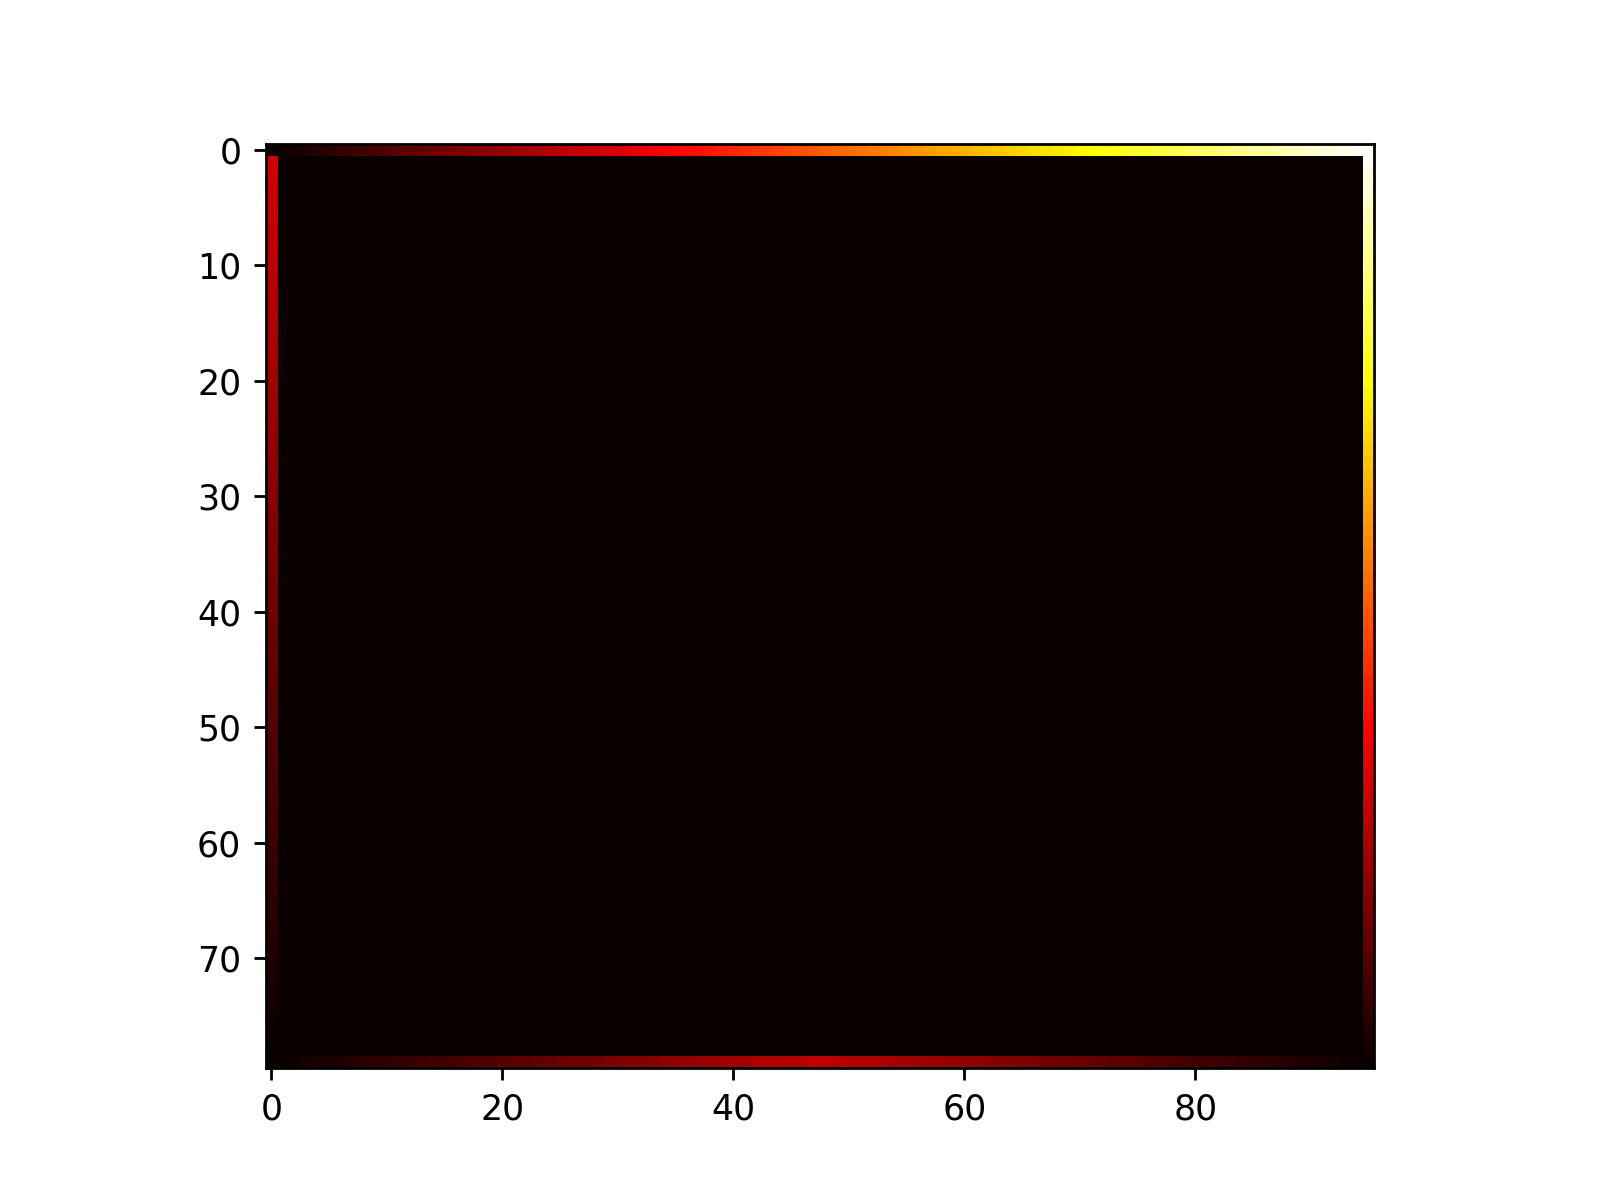

In [13]:
# execute this cell

# matplotlib is a Python library used for visualizing data
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

fig, ax = plt.subplots()
ax.imshow(u, cmap='hot');

Now, we will make an animation of the heat spreading through this material. However, our current implementation is too slow - let's time the amount of time required to evolve the heat in the material for 5000 iterations. This should take 20 sec - 1 minute.

In [14]:
import time
slow = u.copy()
start = time.time()
for _ in range(5000): # perform 5000 iterations to reach a steady state
    slow = evolve_heat_slow(slow)
t = round(time.time() - start, 1)
print("`evolve_heat_slow` took {} seconds to complete 5000 iterations".format(t))

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.           0.           0.         ...   0.           0.
  296.20253165]
 [ 88.84615385   0.           0.         ...   0.           0.
  292.40506329]
 ...
 [  2.30769231   0.           0.         ...   0.           0.
    7.59493671]
 [  1.15384615   0.           0.         ...   0.           0.
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          23.28947368   1.57894737 ...  73.42105263 148.26115923
  296.20253165]
 [ 88.84615385  22.21153846   0.         ...   0.          73.10126582
  292.40506329]
 ...
 [  2.30769231   0.57692308   0.         ...   0.           1.89873418
    7.59493671]
 [  1.15384615   0.71399345   0.85106383 ...   0.85106383   1.374899
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          42.29621606  23.10215278 ... 237.47777702 264.75336222
  296.20253165]
 [ 88.84615385  54.34955664  31.29547768 ... 189.68194991 236.86992237
  292.40506329]
 ...
 [  2.30769231   2.25292878   2.31261277 ...   4.45327471   5.83577435
    7.59493671]
 [  1.15384615   1.93532062   2.77401885 ...   3.84434982   3.72674341
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          42.65240104  23.72598591 ... 241.37583369 266.84808408
  296.20253165]
 [ 88.84615385  55.0451467   32.35574871 ... 195.8759047  240.76458058
  292.40506329]
 ...
 [  2.30769231   2.31470377   2.42390052 ...   4.66757558   5.96310314
    7.59493671]
 [  1.15384615   1.97073036   2.83870721 ...   3.96054474   3.79493005
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          44.52309619  26.90696493 ... 260.6049934  277.73607669
  296.20253165]
 [ 88.84615385  58.49895916  38.29638647 ... 230.2231268  259.97872338
  292.40506329]
 ...
 [  2.30769231   2.67887985   3.09806907 ...   5.9657859    6.7013712
    7.59493671]
 [  1.15384615   2.17280101   3.2157567  ...   4.64961512   4.18404668
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          44.64095471  27.12627582 ... 261.893022   278.40708842
  296.20253165]
 [ 88.84615385  58.73057077  38.69511728 ... 232.48100364 261.26592051
  292.40506329]
 ...
 [  2.30769231   2.70637017   3.15004961 ...   6.06588204   6.75635616
    7.59493671]
 [  1.15384615   2.18765259   3.24395981 ...   4.70187603   4.21264558
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          45.26744972  28.25905417 ... 268.42900505 281.94958773
  296.20253165]
 [ 88.84615385  59.9171727   40.85957791 ... 244.65545272 267.79789676
  292.40506329]
 ...
 [  2.30769231   2.86050684   3.44386575 ...   6.63166807   7.0630395
    7.59493671]
 [  1.15384615   2.27005266   3.40153135 ...   4.99543251   4.37131899
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          45.3335304   28.38450024 ... 269.14349803 282.31788468
  296.20253165]
 [ 88.84615385  60.04737479  41.09300058 ... 245.95024705 268.51199293
  292.40506329]
 ...
 [  2.30769231   2.87835147   3.47812324 ...   6.69763588   7.09837948
    7.59493671]
 [  1.15384615   2.279503     3.41971615 ...   5.02947247   4.38951701
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          45.75055263  29.16058442 ... 273.49659394 284.62484912
  296.20253165]
 [ 88.84615385  60.84872608  42.58633607 ... 254.17329173 272.86277991
  292.40506329]
 ...
 [  2.30769231   2.99638593   3.70586114 ...   7.13617858   7.33136009
    7.59493671]
 [  1.15384615   2.34159266   3.53972997 ...   5.25488869   4.50907975
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          45.79180131  29.23646444 ... 273.91560758 284.85100269
  296.20253165]
 [ 88.84615385  60.92668428  42.73601527 ... 254.99037008 273.28158284
  292.40506329]
 ...
 [  2.30769231   3.00868467   3.72969832 ...   7.18208055   7.35556221
    7.59493671]
 [  1.15384615   2.34802243   3.55220934 ...   5.27840046   4.5214612
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.05898783  29.74247312 ... 276.68570795 286.29920329
  296.20253165]
 [ 88.84615385  61.44458608  43.71509018 ... 260.27535259 276.05037493
  292.40506329]
 ...
 [  2.30769231   3.09323448   3.89407749 ...   7.49861674   7.52159812
    7.59493671]
 [  1.15384615   2.39203821   3.63788068 ...   5.4401503    4.60622003
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.08623849  29.79528965 ... 276.97211638 286.44517995
  296.20253165]
 [ 88.84615385  61.49845926  43.81585924 ... 260.81307824 276.33665615
  292.40506329]
 ...
 [  2.30769231   3.10236398   3.91187747 ...   7.5328932    7.53949171
    7.59493671]
 [  1.15384615   2.39677224   3.64711924 ...   5.45762711   4.61533611
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.27276995  30.15178068 ... 278.88333144 287.43814834
  296.20253165]
 [ 88.84615385  61.86131955  44.5097234  ... 264.4928901  278.24704678
  292.40506329]
 ...
 [  2.30769231   3.16674982   4.03767446 ...   7.77513374   7.66550706
    7.59493671]
 [  1.15384615   2.43006222   3.71221184 ...   5.58094148   4.67944083
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.29274874  30.18956879 ... 279.08358407 287.54375378
  296.20253165]
 [ 88.84615385  61.89970411  44.58447391 ... 264.8865846  278.44721579
  292.40506329]
 ...
 [  2.30769231   3.17387059   4.05161429 ...   7.80197692   7.67942513
    7.59493671]
 [  1.15384615   2.43373387   3.71940429 ...   5.59458561   4.68651114
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.43053622  30.45500794 ... 280.48086982 288.26509087
  296.20253165]
 [ 88.84615385  62.16886557  45.1025252  ... 267.589262   279.84394291
  292.40506329]
 ...
 [  2.30769231   3.22501038   4.15187823 ...   7.99504984   7.77927843
    7.59493671]
 [  1.15384615   2.46004711   3.77102296 ...   5.69260876   4.73718114
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.44544206  30.48417009 ... 280.63327523 288.34236241
  296.20253165]
 [ 88.84615385  62.19838898  45.15882796 ... 267.88016925 279.99628994
  292.40506329]
 ...
 [  2.30769231   3.23076435   4.16317553 ...   8.01680443   7.79050238
    7.59493671]
 [  1.15384615   2.46300179   3.77682699 ...   5.70364144   4.7428708
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.53962823  30.66615911 ... 281.57596578 288.82841826
  296.20253165]
 [ 88.84615385  62.38245265  45.51563367 ... 269.71550965 280.93862556
  292.40506329]
 ...
 [  2.30769231   3.26778409   4.23593434 ...   8.15691218   7.86266368
    7.59493671]
 [  1.15384615   2.48198396   3.814151   ...   5.77463992   4.77942376
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.55162662  30.689696   ... 281.69722983 288.88980706
  296.20253165]
 [ 88.84615385  62.40623179  45.56123484 ... 269.94809445 281.05984553
  292.40506329]
 ...
 [  2.30769231   3.27265331   4.24551372 ...   8.1753587    7.87214867
    7.59493671]
 [  1.15384615   2.48447722   3.819058   ...   5.78398049   4.7842249
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.62824513  30.83831927 ... 282.45659468 289.28013807
  296.20253165]
 [ 88.84615385  62.55626928  45.85311965 ... 271.43051415 281.81893853
  292.40506329]
 ...
 [  2.30769231   3.3042492    4.30772465 ...   8.29515495   7.93366085
    7.59493671]
 [  1.15384615   2.5006369    3.85088693 ...   5.84460208   4.81534273
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.63812082  30.85773367 ... 282.55529458 289.33004253
  296.20253165]
 [ 88.84615385  62.5758516   45.89084067 ... 271.62056126 281.91760419
  292.40506329]
 ...
 [  2.30769231   3.30843924   4.31598119 ...   8.31105412   7.94181374
    7.59493671]
 [  1.15384615   2.50277749   3.85510633 ...   5.85264279   4.81946474
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.71000583  30.99780987 ... 283.2614495  289.69148871
  296.20253165]
 [ 88.84615385  62.71704056  46.16601392 ... 273.00011872 282.62351825
  292.40506329]
 ...
 [  2.30769231   3.3394733    4.37718024 ...   8.42890187   8.00216773
    7.59493671]
 [  1.15384615   2.51861502   3.88634687 ...   5.91220768   4.84996224
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.71818629  31.01363187 ... 283.34053524 289.73240116
  296.20253165]
 [ 88.84615385  62.73297734  46.19739634 ... 273.15662083 282.7025775
  292.40506329]
 ...
 [  2.30769231   3.34306975   4.38427755 ...   8.44256878   8.00915847
    7.59493671]
 [  1.15384615   2.5204485    3.88996602 ...   5.91911164   4.85349286
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.79119825  31.15637073 ... 284.04944559 290.09427093
  296.20253165]
 [ 88.84615385  62.87664459  46.47816073 ... 274.54432303 283.41125779
  292.40506329]
 ...
 [  2.30769231   3.37611558   4.44953912 ...   8.5682395    8.07335981
    7.59493671]
 [  1.15384615   2.53727755   3.92320908 ...   5.98255926   4.88589966
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.79772752  31.16925596 ... 284.11300347 290.12633507
  296.20253165]
 [ 88.84615385  62.88960443  46.5033269  ... 274.66757974 283.47479568
  292.40506329]
 ...
 [  2.30769231   3.37915652   4.45554889 ...   8.57981219   8.07926483
    7.59493671]
 [  1.15384615   2.53882462   3.92626716 ...   5.9883988    4.88887877
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.84611042  31.2640538  ... 284.5771198  290.36286496
  296.20253165]
 [ 88.84615385  62.98490971  46.69008231 ... 275.57816922 283.938768
  292.40506329]
 ...
 [  2.30769231   3.40200481   4.50072585 ...   8.66680704   8.12361732
    7.59493671]
 [  1.15384615   2.55044039   3.9492389  ...   6.03227949   4.91124665
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.85171456  31.27496524 ... 284.63013863 290.39013118
  296.20253165]
 [ 88.84615385  62.99587486  46.71174504 ... 275.68329378 283.99177062
  292.40506329]
 ...
 [  2.30769231   3.40468963   4.50603696 ...   8.67703435   8.12882728
    7.59493671]
 [  1.15384615   2.55180438   3.95193762 ...   6.03743631   4.91387321
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.88827152  31.34679651 ... 284.97786681 290.56683165
  296.20253165]
 [ 88.84615385  63.06803353  46.85323172 ... 276.3654496  284.33939465
  292.40506329]
 ...
 [  2.30769231   3.42253717   4.54135626 ...   8.74504685   8.16345192
    7.59493671]
 [  1.15384615   2.56086675   3.96987445 ...   6.07171974   4.93132412
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.89318119  31.35637513 ... 285.02392373 290.59047459
  296.20253165]
 [ 88.84615385  63.07765278  46.87225412 ... 276.45682492 284.38543791
  292.40506329]
 ...
 [  2.30769231   3.42496006   4.54615277 ...   8.75428322   8.16815118
    7.59493671]
 [  1.15384615   2.56209636   3.97230904 ...   6.07637427   4.93369192
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.93815712  31.44480851 ... 285.44678351 290.80534968
  296.20253165]
 [ 88.84615385  63.16642526  47.04676213 ... 277.28851894 284.80817531
  292.40506329]
 ...
 [  2.30769231   3.44764738   4.59108584 ...   8.84080844   8.21214041
    7.59493671]
 [  1.15384615   2.57360286   3.99510127 ...   6.11996257   4.95584938
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.94228213  31.45297623 ... 285.48561119 290.82489893
  296.20253165]
 [ 88.84615385  63.1746211   47.06278962 ... 277.36429691 284.84699202
  292.40506329]
 ...
 [  2.30769231   3.44977369   4.59529887 ...   8.84892125   8.21626195
    7.59493671]
 [  1.15384615   2.57468062   3.99723698 ...   6.12404817   4.95792475
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.98414436  31.53537264 ... 285.87403896 291.02218319
  296.20253165]
 [ 88.84615385  63.25727369  47.2256383  ... 278.1299684  285.23531162
  292.40506329]
 ...
 [  2.30769231   3.47167536   4.63871194 ...   8.93251947   8.25870331
    7.59493671]
 [  1.15384615   2.58577539   4.01923139 ...   6.16613515   4.97928937
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          46.98763527  31.54229181 ... 285.90646013 291.03849687
  296.20253165]
 [ 88.84615385  63.26421197  47.23923569 ... 278.19336782 285.26772397
  292.40506329]
 ...
 [  2.30769231   3.4735414    4.64241221 ...   8.93964488   8.26231836
    7.59493671]
 [  1.15384615   2.58672014   4.02110498 ...   6.16972132   4.98110862
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.01405497  31.59438565 ... 286.14902964 291.16148532
  296.20253165]
 [ 88.84615385  63.31643898  47.34222155 ... 278.67171259 285.51022814
  292.40506329]
 ...
 [  2.30769231   3.48780244   4.67069852 ...   8.99411431   8.28994106
    7.59493671]
 [  1.15384615   2.59393761   4.03542204 ...   6.19712994   4.99500692
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.01717984  31.60051814 ... 286.17740502 291.17597367
  296.20253165]
 [ 88.84615385  63.3225859   47.35441179 ... 278.72810727 285.53859596
  292.40506329]
 ...
 [  2.30769231   3.48950622   4.67407876 ...   9.00062346   8.29324057
    7.59493671]
 [  1.15384615   2.59479957   4.03713231 ...   6.20040466   4.99666675
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.0435663   31.65263102 ... 286.41750953 291.29750366
  296.20253165]
 [ 88.84615385  63.37481022  47.45743214 ... 279.20156734 285.77863755
  292.40506329]
 ...
 [  2.30769231   3.50412519   4.7030897  ...   9.05648828   8.32154654
    7.59493671]
 [  1.15384615   2.60219278   4.05180522 ...   6.22850451   5.01090346
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.04633399  31.65806985 ... 286.44239841 291.310196
  296.20253165]
 [ 88.84615385  63.38025962  47.46824604 ... 279.25105275 285.80351997
  292.40506329]
 ...
 [  2.30769231   3.50567456   4.70616513 ...   9.06241047   8.32454598
    7.59493671]
 [  1.15384615   2.60297606   4.05336012 ...   6.23148279   5.01241177
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.06731086  31.6995137  ... 286.63134942 291.40583604
  296.20253165]
 [ 88.84615385  63.42177717  47.55026138 ... 279.62420007 285.9924227
  292.40506329]
 ...
 [  2.30769231   3.51757737   4.72979656 ...   9.10791626   8.34758553
    7.59493671]
 [  1.15384615   2.60899171   4.06530432 ...   6.25436417   5.02399578
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.0697964   31.70444894 ... 286.65376389 291.41710226
  296.20253165]
 [ 88.84615385  63.4267204   47.55998571 ... 279.66818645 286.01483153
  292.40506329]
 ...
 [  2.30769231   3.5190067    4.73263485 ...   9.11338181   8.3503518
    7.59493671]
 [  1.15384615   2.60971388   4.06673848 ...   6.25711196   5.02538643
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.09104283  31.74643525 ... 286.84325259 291.51302809
  296.20253165]
 [ 88.84615385  63.46876832  47.6431589  ... 280.04293872 286.20427294
  292.40506329]
 ...
 [  2.30769231   3.53133417   4.75711914 ...   9.1605299    8.37420666
    7.59493671]
 [  1.15384615   2.61594054   4.07910649 ...   6.28081187   5.03737679
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.09327458  31.75086875 ... 286.86317893 291.52304061
  296.20253165]
 [ 88.84615385  63.47320765  47.65190118 ... 280.08208144 286.22419438
  292.40506329]
 ...
 [  2.30769231   3.53264729   4.75972772 ...   9.16555311   8.37674732
    7.59493671]
 [  1.15384615   2.61660362   4.08042381 ...   6.2833365    5.03865363
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.1083049   31.78058762 ... 286.9960593  291.59028279
  296.20253165]
 [ 88.84615385  63.50296241  47.71080353 ... 280.34507202 286.35704229
  292.40506329]
 ...
 [  2.30769231   3.54154607   4.77740815 ...   9.19959938   8.39396321
    7.59493671]
 [  1.15384615   2.62109621   4.08935042 ...   6.30044603   5.04730478
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.11036119  31.78467402 ... 287.0142768  291.59943463
  296.20253165]
 [ 88.84615385  63.50705329  47.71886579 ... 280.38088383 286.37525539
  292.40506329]
 ...
 [  2.30769231   3.54277711   4.77985438 ...   9.20430995   8.39634459
    7.59493671]
 [  1.15384615   2.62171757   4.09058523 ...   6.30281301   5.04850131
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.12802424  31.81962483 ... 287.16915855 291.67775296
  296.20253165]
 [ 88.84615385  63.54203835  47.7881525  ... 280.68750539 286.53010007
  292.40506329]
 ...
 [  2.30769231   3.55343649   4.80103934 ...   9.24510473   8.41696215
    7.59493671]
 [  1.15384615   2.62709661   4.10127639 ...   6.32330909   5.05885944
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.12988948  31.82333306 ... 287.18552712 291.68597388
  296.20253165]
 [ 88.84615385  63.54574977  47.7954732  ... 280.71970911 286.54646477
  292.40506329]
 ...
 [  2.30769231   3.55457634   4.8033051  ...   9.2494678    8.41916662
    7.59493671]
 [  1.15384615   2.62767167   4.10241955 ...   6.3255009    5.05996681
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.14422675  31.85173118 ... 287.3102207  291.74895696
  296.20253165]
 [ 88.84615385  63.57416964  47.85176651 ... 280.96653463 286.6711291
  292.40506329]
 ...
 [  2.30769231   3.56339783   4.82084254 ...   9.28323875   8.43622575
    7.59493671]
 [  1.15384615   2.63212133   4.1112661  ...   6.34246421   5.06853529
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.14594889  31.85513049 ... 287.32506782 291.75649668
  296.20253165]
 [ 88.84615385  63.57757123  47.85853096 ... 280.99609446 286.68597276
  292.40506329]
 ...
 [  2.30769231   3.56446483   4.82296406 ...   9.28732406   8.43828894
    7.59493671]
 [  1.15384615   2.63265944   4.11233607 ...   6.34451607   5.06957149
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.1623187   31.88757378 ... 287.46618149 291.82773486
  296.20253165]
 [ 88.84615385  63.61003296  47.92286178 ... 281.27553155 286.827054
  292.40506329]
 ...
 [  2.30769231   3.57473045   4.84337825 ...   9.32663468   8.45813686
    7.59493671]
 [  1.15384615   2.63783541   4.1226295  ...   6.36425771   5.07953861
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.16387537  31.89067067 ... 287.4795938  291.8344681
  296.20253165]
 [ 88.84615385  63.61313129  47.92898221 ... 281.30195669 286.84046326
  292.40506329]
 ...
 [  2.30769231   3.57571841   4.8453432  ...   9.3304185    8.46004683
    7.59493671]
 [  1.15384615   2.63833344   4.12362007 ...   6.36615771   5.08049765
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.17442965  31.91158713 ... 287.56975673 291.88000263
  296.20253165]
 [ 88.84615385  63.63405611  47.97049095 ... 281.48071462 286.93060583
  292.40506329]
 ...
 [  2.30769231   3.5824507    4.85873431 ...   9.35620514   8.47306103
    7.59493671]
 [  1.15384615   2.64172667   4.1303698  ...   6.37910522   5.08703184
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.17588449  31.91448211 ... 287.58220284 291.88624987
  296.20253165]
 [ 88.84615385  63.63695207  47.97621455 ... 281.5052484  286.94304916
  292.40506329]
 ...
 [  2.30769231   3.58338711   4.86059709 ...   9.35979222   8.47487108
    7.59493671]
 [  1.15384615   2.64219858   4.13130859 ...   6.38090616   5.08794056
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.18575948  31.93405981 ... 287.66598424 291.92854729
  296.20253165]
 [ 88.84615385  63.65653511  48.01507499 ... 281.67140317 287.02681193
  292.40506329]
 ...
 [  2.30769231   3.58977403   4.87330364 ...   9.38426069   8.48721601
    7.59493671]
 [  1.15384615   2.64541684   4.13771148 ...   6.39319      5.09413784
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.18712241  31.9367725  ... 287.67756285 291.93435827
  296.20253165]
 [ 88.84615385  63.65924838  48.0204401  ... 281.69423758 287.03838798
  292.40506329]
 ...
 [  2.30769231   3.59066321   4.87507281 ...   9.3876675    8.48893457
    7.59493671]
 [  1.15384615   2.64586483   4.13860285 ...   6.3949002    5.09500051
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.20145126  31.96519728 ... 287.79813951 291.99519279
  296.20253165]
 [ 88.84615385  63.68767689  48.07686639 ... 281.93338442 287.15893828
  292.40506329]
 ...
 [  2.30769231   3.60008567   4.89382257 ...   9.42377324   8.50714399
    7.59493671]
 [  1.15384615   2.65061114   4.1480479  ...   6.41302323   5.1041403
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.20269223  31.96766797 ... 287.80857426 292.00042868
  296.20253165]
 [ 88.84615385  63.69014771  48.08175528 ... 281.95397624 287.16937078
  292.40506329]
 ...
 [  2.30769231   3.60091108   4.89546527 ...   9.42693653   8.50873901
    7.59493671]
 [  1.15384615   2.65102684   4.14887524 ...   6.41461087   5.10494081
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.21346902  31.98905435 ... 287.89842747 292.04574915
  296.20253165]
 [ 88.84615385  63.7115339   48.1242235  ... 282.1322677  287.25920469
  292.40506329]
 ...
 [  2.30769231   3.60812201   4.9098175  ...   9.45457424   8.52267241
    7.59493671]
 [  1.15384615   2.65465798   4.15610269 ...   6.42848106   5.11193318
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.21462075  31.99134789 ... 287.90803106 292.05056727
  296.20253165]
 [ 88.84615385  63.71382728  48.12876356 ... 282.15122863 287.26880624
  292.40506329]
 ...
 [  2.30769231   3.60889989   4.91136589 ...   9.45755593   8.52417537
    7.59493671]
 [  1.15384615   2.65504963   4.15688231 ...   6.42997733   5.11268737
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.22246652  32.00692139 ... 287.97295997 292.08331147
  296.20253165]
 [ 88.84615385  63.72939904  48.15969784 ... 282.28011686 287.33372141
  292.40506329]
 ...
 [  2.30769231   3.61422133   4.92195915 ...   9.4779552    8.53445661
    7.59493671]
 [  1.15384615   2.65772863   4.16221551 ...   6.44021354   5.11784628
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.22355379  32.00908693 ... 287.98196656 292.08782957
  296.20253165]
 [ 88.84615385  63.73156424  48.16398573 ... 282.29790563 287.34272612
  292.40506329]
 ...
 [  2.30769231   3.61496436   4.92343839 ...   9.48080377   8.53589212
    7.59493671]
 [  1.15384615   2.65810266   4.16296016 ...   6.44164285   5.11856654
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.23096657  32.02380498 ... 288.04292003 292.11856131
  296.20253165]
 [ 88.84615385  63.74627942  48.1932256  ... 282.41892852 287.40366684
  292.40506329]
 ...
 [  2.30769231   3.62005091   4.93356548 ...   9.50030544   8.54571863
    7.59493671]
 [  1.15384615   2.66066289   4.16805761 ...   6.45142759   5.12349675
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.23199478  32.02585322 ... 288.05138238 292.12280595
  296.20253165]
 [ 88.84615385  63.74832719  48.19728233 ... 282.43564812 287.41212744
  292.40506329]
 ...
 [  2.30769231   3.62076162   4.93498057 ...   9.50303049   8.54709157
    7.59493671]
 [  1.15384615   2.66102058   4.16876983 ...   6.45279479   5.12418556
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.24095448  32.04364932 ... 288.12454335 292.1596778
  296.20253165]
 [ 88.84615385  63.76611829  48.23264039 ... 282.58092215 287.48527332
  292.40506329]
 ...
 [  2.30769231   3.62698779   4.94737839 ...   9.5269051    8.55911852
    7.59493671]
 [  1.15384615   2.66415375   4.1750089  ...   6.46477226   5.13021912
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.24191559  32.04556424 ... 288.13239054 292.16361339
  296.20253165]
 [ 88.84615385  63.76803259  48.23643424 ... 282.59643259 287.4931189
  292.40506329]
 ...
 [  2.30769231   3.62766127   4.94871957 ...   9.52948785   8.56041942
    7.59493671]
 [  1.15384615   2.66449263   4.17568376 ...   6.4660679    5.1308717
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.25030013  32.06222284 ... 288.20032455 292.19784178
  296.20253165]
 [ 88.84615385  63.78468508  48.26953842 ... 282.73136015 287.56103909
  292.40506329]
 ...
 [  2.30769231   3.63356683   4.96048077 ...   9.55213677   8.57182596
    7.59493671]
 [  1.15384615   2.66746379   4.18160113 ...   6.47742913   5.13659335
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.25120067  32.06401739 ... 288.20761977 292.20150014
  296.20253165]
 [ 88.84615385  63.7864789   48.27309483 ... 282.74578504 287.56833284
  292.40506329]
 ...
 [  2.30769231   3.63420623   4.96175425 ...   9.55458918   8.57306089
    7.59493671]
 [  1.15384615   2.66778544   4.18224178 ...   6.47865924   5.13721278
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.25821217  32.07795536 ... 288.26403667 292.22990657
  296.20253165]
 [ 88.84615385  63.80041072  48.30078979 ... 282.85781348 287.62473841
  292.40506329]
 ...
 [  2.30769231   3.63920664   4.97171415 ...   9.57376955   8.58271835
    7.59493671]
 [  1.15384615   2.67030072   4.18725187 ...   6.48827956   5.14205657
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.25906521  32.07964712 ... 288.27085481 292.233353
  296.20253165]
 [ 88.84615385  63.80210167  48.30415984 ... 282.87140803 287.6315552
  292.40506329]
 ...
 [  2.30769231   3.63981774   4.97293143 ...   9.57611374   8.58389855
    7.59493671]
 [  1.15384615   2.67060808   4.18786413 ...   6.48945529   5.14264848
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.26650117  32.09443647 ... 288.3302818  292.26325494
  296.20253165]
 [ 88.84615385  63.81688349  48.33354312 ... 282.98938453 287.6909704
  292.40506329]
 ...
 [  2.30769231   3.64518485   4.98362306 ...   9.59670358   8.59426345
    7.59493671]
 [  1.15384615   2.6733073    4.19324128 ...   6.49978155   5.1478466
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.26730368  32.09602854 ... 288.33664884 292.26647228
  296.20253165]
 [ 88.84615385  63.8184747   48.33671485 ... 283.00208095 287.69733619
  292.40506329]
 ...
 [  2.30769231   3.64576687   4.98478256 ...   9.59893656   8.5953874
    7.59493671]
 [  1.15384615   2.67359999   4.19382438 ...   6.50090138   5.14841025
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.27430647  32.10995943 ... 288.39219856 292.29441782
  296.20253165]
 [ 88.84615385  63.83239759  48.36439738 ... 283.11238481 287.75287503
  292.40506329]
 ...
 [  2.30769231   3.65088251   4.99497452 ...   9.61856456   8.605266
    7.59493671]
 [  1.15384615   2.67617227   4.19894928 ...   6.5107443    5.15336402
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.27506294  32.11146062 ... 288.39815674 292.29742763
  296.20253165]
 [ 88.84615385  63.83389787  48.36738829 ... 283.1242671  287.75883206
  292.40506329]
 ...
 [  2.30769231   3.65143769   4.99608066 ...   9.62069483   8.60633804
    7.59493671]
 [  1.15384615   2.6764514    4.19950545 ...   6.51181253   5.15390158
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.28167042  32.12460779 ... 288.45018733 292.32359798
  296.20253165]
 [ 88.84615385  63.84703671  48.39351778 ... 283.22760479 287.81085258
  292.40506329]
 ...
 [  2.30769231   3.65632086   5.0058106  ...   9.63943351   8.61576717
    7.59493671]
 [  1.15384615   2.67890637   4.20439718 ...   6.52120863   5.15862953
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.28238481  32.12602589 ... 288.45577383 292.3264192
  296.20253165]
 [ 88.84615385  63.84845387  48.39634335 ... 283.23874685 287.816438
  292.40506329]
 ...
 [  2.30769231   3.65685118   5.00686735 ...   9.64146871   8.61679117
    7.59493671]
 [  1.15384615   2.67917296   4.20492841 ...   6.5222291    5.15914296
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.28930633  32.13979749 ... 288.50984867 292.35362345
  296.20253165]
 [ 88.84615385  63.86221597  48.42372467 ... 283.34620859 287.87050252
  292.40506329]
 ...
 [  2.30769231   3.66202618   5.01717993 ...   9.66133014   8.62678328
    7.59493671]
 [  1.15384615   2.6817742    4.21011219 ...   6.53218728   5.16415275
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.28997705  32.14113499 ... 288.51508287 292.35624702
  296.20253165]
 [ 88.84615385  63.86355251  48.42637851 ... 283.35657434 287.87573572
  292.40506329]
 ...
 [  2.30769231   3.66253123   5.01818644 ...   9.66326864   8.62775843
    7.59493671]
 [  1.15384615   2.68202804   4.21061808 ...   6.53315917   5.16464164
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.29586043  32.15284047 ... 288.56068979 292.37919645
  296.20253165]
 [ 88.84615385  63.87524931  48.44966093 ... 283.44726184 287.92133403
  292.40506329]
 ...
 [  2.30769231   3.66697963   5.02705203 ...   9.68034387   8.63634724
    7.59493671]
 [  1.15384615   2.6842637    4.21507378 ...   6.54171969   5.1689475
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.29649613  32.15410829 ... 288.56561544 292.38166518
  296.20253165]
 [ 88.84615385  63.87651616  48.45217703 ... 283.45701908 287.92625876
  292.40506329]
 ...
 [  2.30769231   3.66746339   5.02801621 ...   9.68220092   8.63728126
    7.59493671]
 [  1.15384615   2.6845068    4.21555832 ...   6.54265067   5.16941574
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.30207646  32.16521287 ... 288.60857121 292.40327682
  296.20253165]
 [ 88.84615385  63.88761201  48.47426699 ... 283.54244816 287.9692065
  292.40506329]
 ...
 [  2.30769231   3.67172683   5.036514   ...   9.69856842   8.64551272
    7.59493671]
 [  1.15384615   2.68664919   4.21982855 ...   6.55085575   5.17354213
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3026799   32.16641648 ... 288.61321409 292.40560366
  296.20253165]
 [ 88.84615385  63.88881464  48.47665611 ... 283.55164752 287.97384853
  292.40506329]
 ...
 [  2.30769231   3.67219075   5.03743872 ...   9.70034955   8.64640841
    7.59493671]
 [  1.15384615   2.6868823    4.2202932  ...   6.55174861   5.17399112
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.30682364  32.17466308 ... 288.64491037 292.42154985
  296.20253165]
 [ 88.84615385  63.89705446  48.49306358 ... 283.61469922 288.00553894
  292.40506329]
 ...
 [  2.30769231   3.67538545   5.04380684 ...   9.71261562   8.65257632
    7.59493671]
 [  1.15384615   2.68848744   4.22349285 ...   6.55789723   5.17708287
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.30740307  32.17581888 ... 288.64934372 292.42377155
  296.20253165]
 [ 88.84615385  63.89820928  48.49535813 ... 283.62348506 288.00997148
  292.40506329]
 ...
 [  2.30769231   3.67583445   5.04470188 ...   9.71433966   8.65344319
    7.59493671]
 [  1.15384615   2.68871303   4.22394254 ...   6.55876142   5.17751739
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.31138355  32.18374162 ... 288.67962505 292.43900396
  296.20253165]
 [ 88.84615385  63.90612526  48.51112266 ... 283.68372876 288.04024725
  292.40506329]
 ...
 [  2.30769231   3.67892747   5.05086772 ...   9.72621662   8.65941473
    7.59493671]
 [  1.15384615   2.69026692   4.22704023 ...   6.56471466   5.18051055
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.31194041  32.18485249 ... 288.68386235 292.4411273
  296.20253165]
 [ 88.84615385  63.90723516  48.51332832 ... 283.69212756 288.04448377
  292.40506329]
 ...
 [  2.30769231   3.67936233   5.05173463 ...   9.72788654   8.66025429
    7.59493671]
 [  1.15384615   2.69048538   4.22747574 ...   6.56555168   5.18093135
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.31683707  32.19460077 ... 288.72089077 292.45974924
  296.20253165]
 [ 88.84615385  63.91697481  48.53272598 ... 283.76579554 288.08150547
  292.40506329]
 ...
 [  2.30769231   3.68320015   5.0593858  ...   9.74262538   8.66766378
    7.59493671]
 [  1.15384615   2.69241324   4.23131922 ...   6.57293899   5.18464505
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.31736758  32.19565918 ... 288.72490025 292.46175829
  296.20253165]
 [ 88.84615385  63.91803226  48.53482784 ... 283.77374447 288.08551422
  292.40506329]
 ...
 [  2.30769231   3.68361834   5.06021954 ...   9.74423151   8.66847116
    7.59493671]
 [  1.15384615   2.6926233    4.23173802 ...   6.57374398   5.1850497
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.32254145  32.20596295 ... 288.76376191 292.48129258
  296.20253165]
 [ 88.84615385  63.92832656  48.55532907 ... 283.85104368 288.12436888
  292.40506329]
 ...
 [  2.30769231   3.68771341   5.06838423 ...   9.75996065   8.67637737
    7.59493671]
 [  1.15384615   2.69468012   4.23583895 ...   6.58162713   5.18901209
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.32304606  32.20696617 ... 288.76752892 292.48319193
  296.20253165]
 [ 88.84615385  63.92932883  48.55732883 ... 283.85856059 288.12813522
  292.40506329]
 ...
 [  2.30769231   3.68811445   5.06918385 ...   9.76150117   8.67715165
    7.59493671]
 [  1.15384615   2.69488154   4.23624055 ...   6.58239918   5.18940013
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.32651025  32.21386779 ... 288.79339486 292.49618624
  296.20253165]
 [ 88.84615385  63.93622391  48.57105867 ... 283.90999305 288.15399655
  292.40506329]
 ...
 [  2.30769231   3.69088022   5.07469857 ...   9.77212593   8.68249151
    7.59493671]
 [  1.15384615   2.69627055   4.23901017 ...   6.58772381   5.19207618
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.32699661  32.21483486 ... 288.79700675 292.49800708
  296.20253165]
 [ 88.84615385  63.93719005  48.57298645 ... 283.91720075 288.15760779
  292.40506329]
 ...
 [  2.30769231   3.6912695    5.0754748  ...   9.77362147   8.68324311
    7.59493671]
 [  1.15384615   2.69646605   4.23939999 ...   6.58847328   5.19245283
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.33127213  32.22335334 ... 288.82874098 292.5139494
  296.20253165]
 [ 88.84615385  63.94570025  48.58993539 ... 283.98031552 288.18933642
  292.40506329]
 ...
 [  2.30769231   3.69470978   5.08233488 ...   9.78683919   8.68988541
    7.59493671]
 [  1.15384615   2.69819364   4.24284493 ...   6.59509704   5.19578143
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.33173708  32.224278   ... 288.83217167 292.51567858
  296.20253165]
 [ 88.84615385  63.94662399  48.59177872 ... 283.98716201 288.1927665
  292.40506329]
 ...
 [  2.30769231   3.69508515   5.08308341 ...   9.78828151   8.69061017
    7.59493671]
 [  1.15384615   2.69838213   4.24322081 ...   6.5958198    5.19614462
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.33493172  32.23064396 ... 288.85574696 292.52751979
  296.20253165]
 [ 88.84615385  63.95298361  48.60444535 ... 284.03405068 288.21633766
  292.40506329]
 ...
 [  2.30769231   3.69767551   5.08824902 ...   9.79823521   8.69561168
    7.59493671]
 [  1.15384615   2.6996828    4.24581459 ...   6.60080762   5.19865085
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.33538058  32.23153673 ... 288.85904203 292.52918038
  296.20253165]
 [ 88.84615385  63.95387548  48.60622518 ... 284.04062681 288.21963214
  292.40506329]
 ...
 [  2.30769231   3.69804033   5.08897656 ...   9.79963716   8.6963161
    7.59493671]
 [  1.15384615   2.69986598   4.24617989 ...   6.60151013   5.19900383
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.33846575  32.23768509 ... 288.88169289 292.54055634
  296.20253165]
 [ 88.84615385  63.9600176   48.61845981 ... 284.0856813  288.24227907
  292.40506329]
 ...
 [  2.30769231   3.70055855   5.09399855 ...   9.80931488   8.70117849
    7.59493671]
 [  1.15384615   2.70113032   4.24870137 ...   6.60635945   5.20144026
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.33889936  32.23854765 ... 288.88485998 292.54215222
  296.20253165]
 [ 88.84615385  63.96087927  48.62017948 ... 284.09200228 288.2454456
  292.40506329]
 ...
 [  2.30769231   3.7009133    5.09470604 ...   9.81067832   8.70186349
    7.59493671]
 [  1.15384615   2.70130843   4.24905657 ...   6.60704263   5.20178349
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.34271667  32.24615541 ... 288.91272449 292.55614667
  296.20253165]
 [ 88.84615385  63.96847916  48.63532026 ... 284.1474381  288.2733053
  292.40506329]
 ...
 [  2.30769231   3.70405171   5.10096522 ...   9.82274135   8.70792375
    7.59493671]
 [  1.15384615   2.70288403   4.25219895 ...   6.61308691   5.20482
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.34313233  32.24698238 ... 288.91574149 292.55766667
  296.20253165]
 [ 88.84615385  63.96930527  48.63696906 ... 284.15345984 288.27632178
  292.40506329]
 ...
 [  2.30769231   3.70439451   5.10164891 ...   9.82405906   8.70858571
    7.59493671]
 [  1.15384615   2.70305612   4.25254217 ...   6.61374714   5.20515167
    3.79746835]
 [  0.           1.70212766   3.40

    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3479845   32.25665208 ... 288.95089722 292.57532646
  296.20253165]
 [ 88.84615385  63.97896474  48.65621872 ... 284.22343159 288.31147149
  292.40506329]
 ...
 [  2.30769231   3.70841944   5.10967667 ...   9.83953272   8.7163585
    7.59493671]
 [  1.15384615   2.70507657   4.25657202 ...   6.62149991   5.20904603
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3479845   32.25665208 ... 288.95089722 292.57532646
  296.20253165]
 [ 88.84615385  63.97896474  48.65621872 ... 284.22343159 288.31147149
  292.40506329]
 ...
 [  2.30769231   3.70841944   5.10967667 ...   9.83953272   8.7163585
    7.59493671]
 [  1.15384615   2.70507657   4.25657202 ...   6.62149991   5.20904603
    3.79746835]
 [  0.         

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.35147099  32.26360204 ... 288.9759994  292.58793096
  296.20253165]
 [ 88.84615385  63.98590721  48.67005306 ... 284.27338367 288.33656941
  292.40506329]
 ...
 [  2.30769231   3.711335     5.11549212 ...   9.85074364   8.72198942
    7.59493671]
 [  1.15384615   2.70654      4.25949105 ...   6.62711664   5.21186713
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.351851    32.26435832 ... 288.9787205  292.58930143
  296.20253165]
 [ 88.84615385  63.98666267  48.67156107 ... 284.27881538 288.33929005
  292.40506329]
 ...
 [  2.30769231   3.7116537    5.11612783 ...   9.85196925   8.72260498
    7.59493671]
 [  1.15384615   2.70669996   4.25981012 ...   6.62773066   5.21217552
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3548354   32.27030699 ... 289.00007766 292.60002772
  296.20253165]
 [ 88.84615385  63.99260482  48.68340511 ... 284.32133167 288.36064361
  292.40506329]
 ...
 [  2.30769231   3.71416679   5.12114075 ...   9.86163438   8.72745907
    7.59493671]
 [  1.15384615   2.70796128   4.26232612 ...   6.63257274   5.21460732
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.35520164  32.2710381  ... 289.00269682 292.60133955
  296.20253165]
 [ 88.84615385  63.99333513  48.68485871 ... 284.32653186 288.36326233
  292.40506329]
 ...
 [  2.30769231   3.71447644   5.12175842 ...   9.86282535   8.72805719
    7.59493671]
 [  1.15384615   2.70811668   4.26263612 ...   6.63316939   5.21490696
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3580832   32.2767822  ... 289.02320514 292.61163886
  296.20253165]
 [ 88.84615385  63.99907287  48.69629636 ... 284.36736241 288.38376722
  292.40506329]
 ...
 [  2.30769231   3.71691871   5.12663029 ...   9.87221987   8.73277499
    7.59493671]
 [  1.15384615   2.70934236   4.26508115 ...   6.6378757    5.21727038
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.35843745  32.27748739 ... 289.02571439 292.61290232
  296.20253165]
 [ 88.84615385  63.99977727  48.6977026  ... 284.37237162 288.38627606
  292.40506329]
 ...
 [  2.30769231   3.7172197    5.12723074 ...   9.87337781   8.73335646
    7.59493671]
 [  1.15384615   2.70949342   4.26538248 ...   6.63845578   5.21756168
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.36122156  32.28303773 ... 289.04542214 292.62279865
  296.20253165]
 [ 88.84615385  64.00532138  48.70875506 ... 284.41161074 288.40598053
  292.40506329]
 ...
 [  2.30769231   3.71959438   5.13196798 ...   9.8825141    8.73794422
    7.59493671]
 [  1.15384615   2.71068509   4.26775977 ...   6.64303255   5.21985987
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.36156346  32.28372032 ... 289.04784065 292.62400989
  296.20253165]
 [ 88.84615385  64.00600321  48.71011245 ... 284.41641375 288.40839865
  292.40506329]
 ...
 [  2.30769231   3.71988712   5.13255198 ...   9.8836405    8.73850982
    7.59493671]
 [  1.15384615   2.71083199   4.26805283 ...   6.6435968    5.2201432
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3639233   32.28842421 ... 289.0644555  292.63235569
  296.20253165]
 [ 88.84615385  64.01070177  48.71948186 ... 284.44950973 288.42501075
  292.40506329]
 ...
 [  2.30769231   3.72191151   5.13659059 ...   9.89143061   8.74242133
    7.59493671]
 [  1.15384615   2.71184782   4.2700794  ...   6.64749908   5.22210256
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.36425518  32.28908683 ... 289.06679192 292.63352579
  296.20253165]
 [ 88.84615385  64.01136364  48.72079965 ... 284.45415018 288.42734679
  292.40506329]
 ...
 [  2.30769231   3.72219722   5.13716059 ...   9.89253016   8.74297341
    7.59493671]
 [  1.15384615   2.71199118   4.27036542 ...   6.64804987   5.22237911
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.36751029  32.29557707 ... 289.08958803 292.64497144
  296.20253165]
 [ 88.84615385  64.01784645  48.7337255  ... 284.49954593 288.45013917
  292.40506329]
 ...
 [  2.30769231   3.72500774   5.14276774 ...   9.90334782   8.74840467
    7.59493671]
 [  1.15384615   2.71340138   4.27317888 ...   6.65346852   5.22509965
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.36782956  32.29621282 ... 289.09181234 292.64609103
  296.20253165]
 [ 88.84615385  64.01848147  48.7349934  ... 284.50398681 288.45236312
  292.40506329]
 ...
 [  2.30769231   3.72528422   5.14331935 ...   9.90441215   8.74893902
    7.59493671]
 [  1.15384615   2.71354011   4.27345565 ...   6.65400164   5.2253673
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37095805  32.30245116 ... 289.11358077 292.6570196
  296.20253165]
 [ 88.84615385  64.0247126   48.7474184  ... 284.54733917 288.47412801
  292.40506329]
 ...
 [  2.30769231   3.72800492   5.14874755 ...   9.91488699   8.75419771
    7.59493671]
 [  1.15384615   2.71490514   4.27617911 ...   6.65924834   5.22800129
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37126462  32.30306332 ... 289.11571115 292.65808642
  296.20253165]
 [ 88.84615385  64.02532404  48.74863609 ... 284.55157151 288.47625804
  292.40506329]
 ...
 [  2.30769231   3.72827265   5.14928174 ...   9.91591795   8.75471526
    7.59493671]
 [  1.15384615   2.71503946   4.27644712 ...   6.65976473   5.22826052
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37397796  32.30847346 ... 289.13447184 292.66750692
  296.20253165]
 [ 88.84615385  64.03072787  48.7594139  ... 284.58894743 288.49501572
  292.40506329]
 ...
 [  2.30769231   3.73064797   5.15402107 ...   9.92506564   8.75930733
    7.59493671]
 [  1.15384615   2.71623112   4.27882478 ...   6.6643465    5.23056051
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37427402  32.30906464 ... 289.13651716 292.66853112
  296.20253165]
 [ 88.84615385  64.03131836  48.76058996 ... 284.59301125 288.49706071
  292.40506329]
 ...
 [  2.30769231   3.73090815   5.15454019 ...   9.92606775   8.75981037
    7.59493671]
 [  1.15384615   2.71636164   4.27908521 ...   6.66484841   5.23081246
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37631962  32.31314349 ... 289.15058683 292.67559612
  296.20253165]
 [ 88.84615385  64.03539241  48.76871639 ... 284.62104539 288.51112812
  292.40506329]
 ...
 [  2.30769231   3.73270893   5.1581333  ...   9.93300459   8.76329238
    7.59493671]
 [  1.15384615   2.71726501   4.28088772 ...   6.66832272   5.23255641
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37660766  32.31371868 ... 289.15256758 292.67658796
  296.20253165]
 [ 88.84615385  64.03596692  48.76986073 ... 284.62498128 288.51310855
  292.40506329]
 ...
 [  2.30769231   3.7329633    5.15864086 ...   9.93398458   8.76378428
    7.59493671]
 [  1.15384615   2.71739262   4.28114234 ...   6.66881354   5.23280278
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37915838  32.31880525 ... 289.1700225  292.6853516
  296.20253165]
 [ 88.84615385  64.04104748  48.77999501 ... 284.65976001 288.5305607
  292.40506329]
 ...
 [  2.30769231   3.7352211    5.16314601 ...   9.94268421   8.76815088
    7.59493671]
 [  1.15384615   2.71852518   4.28340225 ...   6.6731706    5.2349897
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.37943687  32.31936139 ... 289.1719266  292.68630503
  296.20253165]
 [ 88.84615385  64.04160296  48.78110154 ... 284.66354399 288.5324645
  292.40506329]
 ...
 [  2.30769231   3.73546851   5.1636397  ...   9.94363769   8.76862944
    7.59493671]
 [  1.15384615   2.71864929   4.28364989 ...   6.67364813   5.23522937
    3.79746835]
 [  0.           1.70212766   3.40

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3816331   32.32374192 ... 289.1868777  292.69380912
  296.20253165]
 [ 88.84615385  64.04597827  48.78982843 ... 284.69332804 288.54741324
  292.40506329]
 ...
 [  2.30769231   3.73742367   5.16754111 ...   9.95117344   8.77241161
    7.59493671]
 [  1.15384615   2.71962999   4.28560684 ...   6.67742215   5.23712353
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.38190373  32.32428108 ... 289.1887121  292.69473196
  296.20253165]
 [ 88.84615385  64.04651679  48.79090388 ... 284.69699105 288.54924735
  292.40506329]
 ...
 [  2.30769231   3.73766509   5.16802285 ...   9.95210407   8.77287868
    7.59493671]
 [  1.15384615   2.71975108   4.28584847 ...   6.67788822   5.23735744
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.38377228  32.32800888 ... 289.20137484 292.70108499
  296.20253165]
 [ 88.84615385  64.05024013  48.79832947 ... 284.72220929 288.5619081
  292.40506329]
 ...
 [  2.30769231   3.73933693   5.17135901 ...   9.95854962   8.77611351
    7.59493671]
 [  1.15384615   2.72058963   4.2875218  ...   6.68111615   5.23897744
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.38403594  32.32853418 ... 289.20315398 292.70197996
  296.20253165]
 [ 88.84615385  64.0507648   48.7993773  ... 284.72576205 288.56368697
  292.40506329]
 ...
 [  2.30769231   3.73957322   5.17183053 ...   9.9594607    8.77657075
    7.59493671]
 [  1.15384615   2.72070814   4.28775829 ...   6.68157242   5.23920642
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.38611366  32.33267881 ... 289.21716387 292.7090108
  296.20253165]
 [ 88.84615385  64.05490445  48.80763496 ... 284.75367388 288.57769468
  292.40506329]
 ...
 [  2.30769231   3.74144108   5.17555796 ...   9.96666408   8.78018572
    7.59493671]
 [  1.15384615   2.72164495   4.28962778 ...   6.68517977   5.24101674
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3863695   32.33318978 ... 289.21888763 292.70987386
  296.20253165]
 [ 88.84615385  64.0554148   48.80865183 ... 284.75710036 288.57941817
  292.40506329]
 ...
 [  2.30769231   3.7416718    5.17601838 ...   9.96755399   8.7806323
    7.59493671]
 [  1.15384615   2.72176067   4.2898587  ...   6.68562542   5.24124038
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.38888534  32.33820864 ... 289.23575755 292.71833959
  296.20253165]
 [ 88.84615385  64.0604276   48.81865192 ... 284.79071271 288.59628548
  292.40506329]
 ...
 [  2.30769231   3.74394619   5.18055719 ...   9.97632822   8.78503533
    7.59493671]
 [  1.15384615   2.72290131   4.292135   ...   6.69001928   5.24344526
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.38913274  32.33870163 ... 289.23740863 292.71916999
  296.20253165]
 [ 88.84615385  64.06092     48.81963537 ... 284.79400992 288.5979363
  292.40506329]
 ...
 [  2.30769231   3.7441704    5.18100464 ...   9.97719337   8.78546946
    7.59493671]
 [  1.15384615   2.72301375   4.29235939 ...   6.69045252   5.24366266
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39084207  32.34211233 ... 289.24881317 292.72489086
  296.20253165]
 [ 88.84615385  64.06432656  48.82643039 ... 284.8167267  288.6093391
  292.40506329]
 ...
 [  2.30769231   3.74572386   5.18410485 ...   9.98318851   8.78847774
    7.59493671]
 [  1.15384615   2.72379279   4.29391412 ...   6.6934546    5.24516905
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39108341  32.34259326 ... 289.25041672 292.72569729
  296.20253165]
 [ 88.84615385  64.06480691  48.82738981 ... 284.81992908 288.6109424
  292.40506329]
 ...
 [  2.30769231   3.74594352   5.18454324 ...   9.98403637   8.78890317
    7.59493671]
 [  1.15384615   2.72390295   4.29413396 ...   6.69387917   5.24538209
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39322115  32.34685886 ... 289.26460869 292.73281659
  296.20253165]
 [ 88.84615385  64.06906733  48.83588876 ... 284.84820173 288.62513221
  292.40506329]
 ...
 [  2.30769231   3.74789568   5.18843923 ...   9.99157284   8.79268467
    7.59493671]
 [  1.15384615   2.72488189   4.29608768 ...   6.69765296   5.24727562
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39345523  32.34732537 ... 289.26615556 292.73359445
  296.20253165]
 [ 88.84615385  64.06953326  48.83681942 ... 284.85129099 288.62667884
  292.40506329]
 ...
 [  2.30769231   3.74810987   5.18886671 ...   9.9923999    8.79309965
    7.59493671]
 [  1.15384615   2.72498929   4.29630204 ...   6.6980671    5.24748341
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39507314  32.35055397 ... 289.27684433 292.73895577
  296.20253165]
 [ 88.84615385  64.07275792  48.84325229 ... 284.8725844  288.637366
  292.40506329]
 ...
 [  2.30769231   3.74959437   5.19182944 ...   9.99813299   8.79597614
    7.59493671]
 [  1.15384615   2.72573368   4.29778767 ...   6.70093779   5.24892373
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39530166  32.35100941 ... 289.2783479  292.73971181
  296.20253165]
 [ 88.84615385  64.07321281  48.8441609  ... 284.87558725 288.63886934
  292.40506329]
 ...
 [  2.30769231   3.74980434   5.19224851 ...   9.99894404   8.79638307
    7.59493671]
 [  1.15384615   2.72583896   4.29799781 ...   6.7013439    5.24912749
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39710454  32.35460673 ... 289.29020119 292.74565879
  296.20253165]
 [ 88.84615385  64.07680573  48.85132983 ... 284.89920891 288.65072085
  292.40506329]
 ...
 [  2.30769231   3.75146569   5.19556429 ...  10.00536244   8.79960327
    7.59493671]
 [  1.15384615   2.72667199   4.29966041 ...   6.70455765   5.25073986
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.3973268   32.35505069 ... 289.29166125 292.74638974
  296.20253165]
 [ 88.84615385  64.07724915  48.85221366 ... 284.9021124  288.65218069
  292.40506329]
 ...
 [  2.30769231   3.75167109   5.19597423 ...  10.00615611   8.80000145
    7.59493671]
 [  1.15384615   2.72677498   4.29986595 ...   6.70495504   5.25093923
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39929933  32.35898623 ... 289.30456135 292.75286317
  296.20253165]
 [ 88.84615385  64.08117986  48.86005792 ... 284.92782774 288.66507886
  292.40506329]
 ...
 [  2.30769231   3.75349742   5.1996194  ...  10.01321486   8.80354275
    7.59493671]
 [  1.15384615   2.72769069   4.30169362 ...   6.70848932   5.25271233
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.39951521  32.35941745 ... 289.30597184 292.75356928
  296.20253165]
 [ 88.84615385  64.08161055  48.86091645 ... 284.93063287 288.66648914
  292.40506329]
 ...
 [  2.30769231   3.75369792   5.20001957 ...  10.01398995   8.80393159
    7.59493671]
 [  1.15384615   2.72779121   4.30189426 ...   6.70887739   5.25290702
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40143152  32.36324101 ... 289.3184373  292.75982428
  296.20253165]
 [ 88.84615385  64.08542942  48.86853787 ... 284.95548303 288.67895276
  292.40506329]
 ...
 [  2.30769231   3.75548105   5.2035786  ...  10.02088483   8.80739051
    7.59493671]
 [  1.15384615   2.72868522   4.30367865 ...   6.71232952   5.25463882
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40164129  32.36366007 ... 289.3198006  292.76050674
  296.20253165]
 [ 88.84615385  64.08584796  48.86937222 ... 284.95819452 288.68031585
  292.40506329]
 ...
 [  2.30769231   3.75567684   5.20396939 ...  10.02164208   8.80777038
    7.59493671]
 [  1.15384615   2.72878338   4.30387457 ...   6.71270865   5.25482901
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40329915  32.36696847 ... 289.3305322  292.76589021
  296.20253165]
 [ 88.84615385  64.08915229  48.87596632 ... 284.97958429 288.69104588
  292.40506329]
 ...
 [  2.30769231   3.75722674   5.20706298 ...  10.02763781   8.81077808
    7.59493671]
 [  1.15384615   2.72956041   4.30542553 ...   6.71571049   5.25633485
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40350387  32.3673766  ... 289.33185219 292.76655375
  296.20253165]
 [ 88.84615385  64.08955992  48.87678063 ... 284.98222076 288.69236568
  292.40506329]
 ...
 [  2.30769231   3.75741846   5.20744564 ...  10.02837959   8.81115019
    7.59493671]
 [  1.15384615   2.72965652   4.30561737 ...   6.71608188   5.25652115
    3.79746835]
 [  0.           1.70212766   

    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4053199   32.37100122 ... 289.34355066 292.7724206
  296.20253165]
 [ 88.84615385  64.09318007  48.88400447 ... 285.00553329 288.70406244
  292.40506329]
 ...
 [  2.30769231   3.75912407   5.21085011 ...  10.03498075   8.81446145
    7.59493671]
 [  1.15384615   2.73051158   4.30732411 ...   6.71938674   5.25817892
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4053199   32.37100122 ... 289.34355066 292.7724206
  296.20253165]
 [ 88.84615385  64.09318007  48.88400447 ... 285.00553329 288.70406244
  292.40506329]
 ...
 [  2.30769231   3.75912407   5.21085011 ...  10.03498075   8.81446145
    7.59493671]
 [  1.15384615   2.73051158   4.30732411 ...   6.71938674   5.25817892
    3.79746835]
 [  0.         

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40689678  32.37414829 ... 289.35366142 292.77749219
  296.20253165]
 [ 88.84615385  64.09632326  48.89027752 ... 285.02568738 288.71417173
  292.40506329]
 ...
 [  2.30769231   3.76061095   5.21381805 ...  10.04073781   8.81734919
    7.59493671]
 [  1.15384615   2.73125695   4.30881194 ...   6.72226893   5.25962462
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40709157  32.37453667 ... 289.35490556 292.77811751
  296.20253165]
 [ 88.84615385  64.09671116  48.89105245 ... 285.02817245 288.71541569
  292.40506329]
 ...
 [  2.30769231   3.76079493   5.21418527 ...  10.04145029   8.81770656
    7.59493671]
 [  1.15384615   2.73134918   4.30899602 ...   6.72262563   5.25980353
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40863029  32.3776077  ... 289.36472516 292.78304281
  296.20253165]
 [ 88.84615385  64.09977841  48.89717415 ... 285.04774681 288.72523388
  292.40506329]
 ...
 [  2.30769231   3.76225191   5.21709358 ...  10.04709419   8.82053742
    7.59493671]
 [  1.15384615   2.73207953   4.3104539  ...   6.72545109   5.26122072
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.40882021  32.37798714 ... 289.36593613 292.78364899
  296.20253165]
 [ 88.84615385  64.10015737  48.89792978 ... 285.05015599 288.72644469
  292.40506329]
 ...
 [  2.30769231   3.7624322    5.21745348 ...  10.04779278   8.82088781
    7.59493671]
 [  1.15384615   2.73216991   4.31063431 ...   6.72580081   5.26139613
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4101363   32.38061356 ... 289.37429592 292.78784314
  296.20253165]
 [ 88.84615385  64.10278055  48.90316613 ... 285.06682586 288.73480328
  292.40506329]
 ...
 [  2.30769231   3.76368315   5.21995058 ...  10.05264075   8.82331936
    7.59493671]
 [  1.15384615   2.73279696   4.31188601 ...   6.72822776   5.26261339
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41032221  32.380985   ... 289.37547639 292.78843403
  296.20253165]
 [ 88.84615385  64.10315153  48.90390587 ... 285.06917448 288.73598358
  292.40506329]
 ...
 [  2.30769231   3.76386029   5.22030418 ...  10.05332738   8.82366374
    7.59493671]
 [  1.15384615   2.73288574   4.31206325 ...   6.72857148   5.26278578
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41179273  32.38392012 ... 289.38477787 292.79309914
  296.20253165]
 [ 88.84615385  64.10608303  48.90975708 ... 285.08771762 288.74528375
  292.40506329]
 ...
 [  2.30769231   3.7652635    5.22310527 ...  10.05876794   8.82639241
    7.59493671]
 [  1.15384615   2.73358909   4.31346727 ...   6.73129501   5.26415175
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41197447  32.38428254 ... 289.38592307 292.79367463
  296.20253165]
 [ 88.84615385  64.106445    48.91048025 ... 285.09000518 288.74642878
  292.40506329]
 ...
 [  2.30769231   3.76543719   5.223452   ...  10.05944153   8.82673025
    7.59493671]
 [  1.15384615   2.73367615   4.31364106 ...   6.73163221   5.26432086
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41358819  32.38750394 ... 289.39608185 292.79876839
  296.20253165]
 [ 88.84615385  64.10966242  48.91690173 ... 285.11025375 288.75658613
  292.40506329]
 ...
 [  2.30769231   3.76698365   5.22653911 ...  10.06544066   8.82973894
    7.59493671]
 [  1.15384615   2.73445126   4.31518838 ...   6.73463527   5.26582696
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41376527  32.38785709 ... 289.39719199 292.79932622
  296.20253165]
 [ 88.84615385  64.11001514  48.91760644 ... 285.11247133 288.75769612
  292.40506329]
 ...
 [  2.30769231   3.76715365   5.22687846 ...  10.06610028   8.83006976
    7.59493671]
 [  1.15384615   2.73453646   4.31535847 ...   6.73496547   5.26599256
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4151651   32.39065133 ... 289.40595974 292.80372327
  296.20253165]
 [ 88.84615385  64.11280593  48.9231772  ... 285.12995173 288.76646265
  292.40506329]
 ...
 [  2.30769231   3.76850067   5.22956751 ...  10.07132854   8.83269175
    7.59493671]
 [  1.15384615   2.73521159   4.31670621 ...   6.73758259   5.26730504
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.415338    32.39099679 ... 289.40704172 292.80426483
  296.20253165]
 [ 88.84615385  64.11315095  48.9238653  ... 285.13210478 288.76754448
  292.40506329]
 ...
 [  2.30769231   3.76866746   5.22990046 ...  10.07197606   8.83301647
    7.59493671]
 [  1.15384615   2.73529517   4.31687308 ...   6.7379067    5.26746759
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41670621  32.39372801 ... 289.41557187 292.80854259
  296.20253165]
 [ 88.84615385  64.11587881  48.92931065 ... 285.14911223 288.77607345
  292.40506329]
 ...
 [  2.30769231   3.76998921   5.23253911 ...  10.07710889   8.83559051
    7.59493671]
 [  1.15384615   2.73595761   4.31819551 ...   6.74047597   5.26875604
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41687539  32.39406543 ... 289.41662268 292.80907056
  296.20253165]
 [ 88.84615385  64.11621581  48.92998398 ... 285.15121138 288.77712412
  292.40506329]
 ...
 [  2.30769231   3.77015288   5.23286586 ...  10.07774465   8.83590934
    7.59493671]
 [  1.15384615   2.73603963   4.31835927 ...   6.74079421   5.26891562
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41837841  32.39706615 ... 289.42594922 292.81374652
  296.20253165]
 [ 88.84615385  64.11921283  48.93596625 ... 285.16980341 288.78644938
  292.40506329]
 ...
 [  2.30769231   3.77161084   5.23577648 ...  10.08340957   8.8387501
    7.59493671]
 [  1.15384615   2.7367703    4.31981795 ...   6.74362974   5.27033755
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41854343  32.3973953  ... 289.42696903 292.81425888
  296.20253165]
 [ 88.84615385  64.11954157  48.9366231  ... 285.17184066 288.78746905
  292.40506329]
 ...
 [  2.30769231   3.77177118   5.23609658 ...  10.08403274   8.8390626
    7.59493671]
 [  1.15384615   2.73685065   4.31997836 ...   6.74394167   5.27049396
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41968673  32.39967801 ... 289.4340312  292.81779925
  296.20253165]
 [ 88.84615385  64.12182147  48.94117395 ... 285.18591847 288.79453027
  292.40506329]
 ...
 [  2.30769231   3.77288446   5.23831912 ...  10.0883607    8.84123285
    7.59493671]
 [  1.15384615   2.73740855   4.32109217 ...   6.74610794   5.27158024
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.41984855  32.40000077 ... 289.43502715 292.8182996
  296.20253165]
 [ 88.84615385  64.12214384  48.94181808 ... 285.18790807 288.79552608
  292.40506329]
 ...
 [  2.30769231   3.77304221   5.23863407 ...  10.08897411   8.84154046
    7.59493671]
 [  1.15384615   2.73748761   4.32124999 ...   6.74641498   5.2717342
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4211285   32.40255606 ... 289.44289768 292.82224613
  296.20253165]
 [ 88.84615385  64.12469597  48.94691314 ... 285.20360194 288.80339555
  292.40506329]
 ...
 [  2.30769231   3.7742929    5.24113098 ...  10.09383873   8.84397975
    7.59493671]
 [  1.15384615   2.73811435   4.32250125 ...   6.74884982   5.27295511
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42128669  32.40287215 ... 289.44386952 292.82273254
  296.20253165]
 [ 88.84615385  64.12501168  48.94754288 ... 285.20553624 288.80436726
  292.40506329]
 ...
 [  2.30769231   3.77444783   5.2414403  ...  10.09444153   8.844282
    7.59493671]
 [  1.15384615   2.73819199   4.32265625 ...   6.74915151   5.27310639
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4226942   32.40568193 ... 289.45248151 292.82705161
  296.20253165]
 [ 88.84615385  64.12781799  48.95314611 ... 285.22271275 288.8129781
  292.40506329]
 ...
 [  2.30769231   3.77582851   5.24419679 ...  10.09981484   8.84697629
    7.59493671]
 [  1.15384615   2.73888385   4.32403753 ...   6.7518409    5.27445489
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42284866  32.40599058 ... 289.45342561 292.82752413
  296.20253165]
 [ 88.84615385  64.12812626  48.95376105 ... 285.22459197 288.81392208
  292.40506329]
 ...
 [  2.30769231   3.77598041   5.24450006 ...  10.10040621   8.84727279
    7.59493671]
 [  1.15384615   2.73895996   4.32418949 ...   6.75213687   5.2746033
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42392028  32.40812983 ... 289.45995229 292.83079746
  296.20253165]
 [ 88.84615385  64.13026288  48.95802737 ... 285.23761053 288.82044789
  292.40506329]
 ...
 [  2.30769231   3.77703547   5.24660649 ...  10.10451453   8.84933273
    7.59493671]
 [  1.15384615   2.73948863   4.32524499 ...   6.75419307   5.27563428
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42407186  32.40843272 ... 289.46087503 292.83125927
  296.20253165]
 [ 88.84615385  64.13056541  48.95863087 ... 285.23944729 288.82137051
  292.40506329]
 ...
 [  2.30769231   3.77718503   5.24690508 ...  10.10509704   8.84962478
    7.59493671]
 [  1.15384615   2.73956357   4.3253946  ...   6.7544846    5.27578045
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42527237  32.41082964 ... 289.46815679 292.83491026
  296.20253165]
 [ 88.84615385  64.13295938  48.96341063 ... 285.2539687  288.82865131
  292.40506329]
 ...
 [  2.30769231   3.77837114   5.24927321 ...  10.1097181    8.85194172
    7.59493671]
 [  1.15384615   2.74015789   4.32658118 ...   6.75679736   5.27694004
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42542094  32.41112602 ... 289.46905468 292.83536125
  296.20253165]
 [ 88.84615385  64.13325539  48.96400214 ... 285.25576254 288.82954909
  292.40506329]
 ...
 [  2.30769231   3.77851813   5.24956668 ...  10.1102909    8.85222893
    7.59493671]
 [  1.15384615   2.74023153   4.32672823 ...   6.75708405   5.27708377
    3.79746835]
 [  0.           1.70212766   

    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42688733  32.41405389 ... 289.47790451 292.83979826
  296.20253165]
 [ 88.84615385  64.13617968  48.96984089 ... 285.27341152 288.83839777
  292.40506329]
 ...
 [  2.30769231   3.77997276   5.25247097 ...  10.11596159   8.85507205
    7.59493671]
 [  1.15384615   2.74096037   4.32818341 ...   6.75992206   5.27850667
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42688733  32.41405389 ... 289.47790451 292.83979826
  296.20253165]
 [ 88.84615385  64.13617968  48.96984089 ... 285.27341152 288.83839777
  292.40506329]
 ...
 [  2.30769231   3.77997276   5.25247097 ...  10.11596159   8.85507205
    7.59493671]
 [  1.15384615   2.74096037   4.32818341 ...   6.75992206   5.27850667
    3.79746835]
 [  0.       

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42817877  32.41663275 ... 289.48566241 292.84368694
  296.20253165]
 [ 88.84615385  64.13875539  48.97498335 ... 285.28888039 288.84615467
  292.40506329]
 ...
 [  2.30769231   3.78125876   5.25503862 ...  10.12097782   8.85758695
    7.59493671]
 [  1.15384615   2.74160468   4.32946987 ...   6.76243245   5.27976527
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42832072  32.41691595 ... 289.48651174 292.8441135
  296.20253165]
 [ 88.84615385  64.13903824  48.97554858 ... 285.29057726 288.84700389
  292.40506329]
 ...
 [  2.30769231   3.78140033   5.25532127 ...  10.12153016   8.85786389
    7.59493671]
 [  1.15384615   2.74167561   4.32961148 ...   6.76270889   5.27990385
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42944447  32.41915982 ... 289.4932292  292.8474812
  296.20253165]
 [ 88.84615385  64.14127937  48.98002358 ... 285.3039746  288.8537205
  292.40506329]
 ...
 [  2.30769231   3.7825235    5.25756385 ...  10.1259138    8.86006158
    7.59493671]
 [  1.15384615   2.74223832   4.33073503 ...   6.76490266   5.28100368
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.42958348  32.41943762 ... 289.49405935 292.84789665
  296.20253165]
 [ 88.84615385  64.14155683  48.98057717 ... 285.30562739 288.85455054
  292.40506329]
 ...
 [  2.30769231   3.78266274   5.25784187 ...  10.12645741   8.8603341
    7.59493671]
 [  1.15384615   2.74230808   4.33087431 ...   6.76517469   5.28114006
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43068503  32.42163722 ... 289.50061444 292.85118288
  296.20253165]
 [ 88.84615385  64.14375374  48.98496401 ... 285.31870136 288.8611048
  292.40506329]
 ...
 [  2.30769231   3.78376761   5.26004795 ...  10.13077198   8.8624971
    7.59493671]
 [  1.15384615   2.74286161   4.33197953 ...   6.76733385   5.2822225
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43082142  32.42190936 ... 289.50142323 292.85158904
  296.20253165]
 [ 88.84615385  64.14402555  48.98550719 ... 285.32031726 288.86191349
  292.40506329]
 ...
 [  2.30769231   3.7839046    5.26032147 ...  10.13130706   8.86276537
    7.59493671]
 [  1.15384615   2.74293024   4.33211657 ...   6.76760163   5.28235674
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43190149  32.42406611 ... 289.50782157 292.85479658
  296.20253165]
 [ 88.84615385  64.14617967  48.98980868 ... 285.3330789  288.86831103
  292.40506329]
 ...
 [  2.30769231   3.78499171   5.26249214 ...  10.13555461   8.86489472
    7.59493671]
 [  1.15384615   2.74347485   4.33320401 ...   6.76972721   5.28342232
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43203513  32.42433318 ... 289.50861247 292.85519238
  296.20253165]
 [ 88.84615385  64.14644642  48.99034095 ... 285.33465369 288.86910183
  292.40506329]
 ...
 [  2.30769231   3.78512651   5.26276131 ...  10.13608147   8.86515882
    7.59493671]
 [  1.15384615   2.74354238   4.33333885 ...   6.76999084   5.28355448
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43309438  32.42644844 ... 289.51485937 292.85832393
  296.20253165]
 [ 88.84615385  64.1485591   48.99455982 ... 285.34711369 288.87534796
  292.40506329]
 ...
 [  2.30769231   3.7861964    5.26489761 ...  10.14026397   8.8672555
    7.59493671]
 [  1.15384615   2.74407835   4.33440904 ...   6.77208381   5.28460369
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43322557  32.42671021 ... 289.51563033 292.85871106
  296.20253165]
 [ 88.84615385  64.14882056  48.99508232 ... 285.34865408 288.87611883
  292.40506329]
 ...
 [  2.30769231   3.78632909   5.26516254 ...  10.14078278   8.86751559
    7.59493671]
 [  1.15384615   2.74414481   4.33454176 ...   6.77234344   5.28473383
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43439328  32.4290423  ... 289.5224852  292.86214662
  296.20253165]
 [ 88.84615385  64.15114982  48.99973341 ... 285.36232451 288.88297285
  292.40506329]
 ...
 [  2.30769231   3.78751288   5.26752633 ...  10.14541317   8.86983672
    7.59493671]
 [  1.15384615   2.74473782   4.33572587 ...   6.77466048   5.28589533
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43452171  32.42929859 ... 289.52323624 292.86252374
  296.20253165]
 [ 88.84615385  64.1514058   49.00024499 ... 285.36382513 288.8837238
  292.40506329]
 ...
 [  2.30769231   3.78764328   5.26778671 ...  10.14592335   8.87009248
    7.59493671]
 [  1.15384615   2.74480314   4.3358563  ...   6.77491579   5.2860233
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43553916  32.43133047 ... 289.52917996 292.86550312
  296.20253165]
 [ 88.84615385  64.15343522  49.0042978  ... 285.37568104 288.8896668
  292.40506329]
 ...
 [  2.30769231   3.78867845   5.26985376 ...  10.14997461   8.87212326
    7.59493671]
 [  1.15384615   2.74532168   4.33689173 ...   6.776943     5.28703948
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43566511  32.43158217 ... 289.52991493 292.86587092
  296.20253165]
 [ 88.84615385  64.15368661  49.00479949 ... 285.37714466 288.89040168
  292.40506329]
 ...
 [  2.30769231   3.78880686   5.27011017 ...  10.1504773    8.87237522
    7.59493671]
 [  1.15384615   2.745386     4.33702017 ...   6.77719451   5.28716557
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4366637   32.43357645 ... 289.53572237 292.86878193
  296.20253165]
 [ 88.84615385  64.15567848  49.0087774  ... 285.38872911 288.89620842
  292.40506329]
 ...
 [  2.30769231   3.78982633   5.27214591 ...  10.15446915   8.87437617
    7.59493671]
 [  1.15384615   2.74589666   4.33803987 ...   6.77919196   5.2881668
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43678742  32.43382334 ... 289.53643939 292.86914193
  296.20253165]
 [ 88.84615385  64.15592507  49.00927024 ... 285.39016177 288.89692535
  292.40506329]
 ...
 [  2.30769231   3.7899528    5.27239845 ...  10.15496447   8.87462447
    7.59493671]
 [  1.15384615   2.74596      4.33816638 ...   6.77943982   5.28829104
    3.79746835]
 [  0.           1.70212766   3

    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43776773  32.43578116 ... 289.54211504 292.87198679
  296.20253165]
 [ 88.84615385  64.15788053  49.01317554 ... 285.40148356 288.90260032
  292.40506329]
 ...
 [  2.30769231   3.79095703   5.27440378 ...  10.15889859   8.87659643
    7.59493671]
 [  1.15384615   2.74646301   4.33917082 ...   6.78140833   5.28927774
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43788911  32.43602375 ... 289.54281701 292.87233807
  296.20253165]
 [ 88.84615385  64.15812282  49.01365908 ... 285.40288159 288.90330222
  292.40506329]
 ...
 [  2.30769231   3.79108163   5.27465259 ...  10.15938684   8.87684114
    7.59493671]
 [  1.15384615   2.74652542   4.33929544 ...   6.78165261   5.2894002
    3.79746835]
 [  0.        

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43873226  32.43770751 ... 289.54767711 292.87477466
  296.20253165]
 [ 88.84615385  64.15980456  49.01701814 ... 285.41257905 288.90816174
  292.40506329]
 ...
 [  2.30769231   3.79194808   5.27638281 ...  10.16278274   8.87854331
    7.59493671]
 [  1.15384615   2.7469594    4.34016206 ...   6.78335181   5.29025188
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4388517   32.43794621 ... 289.5483651  292.87511894
  296.20253165]
 [ 88.84615385  64.16004298  49.01749397 ... 285.41394928 288.90884965
  292.40506329]
 ...
 [  2.30769231   3.79207105   5.27662838 ...  10.16326483   8.87878492
    7.59493671]
 [  1.15384615   2.74702099   4.34028506 ...   6.783593     5.29037278
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.43991638  32.44007245 ... 289.55447492 292.87818184
  296.20253165]
 [ 88.84615385  64.16216666  49.02173577 ... 285.42613999 288.91495875
  292.40506329]
 ...
 [  2.30769231   3.79316887   5.27882065 ...  10.16756953   8.88094256
    7.59493671]
 [  1.15384615   2.74757084   4.34138308 ...   6.78574689   5.29145234
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44003346  32.44030646 ... 289.55514599 292.87851764
  296.20253165]
 [ 88.84615385  64.16240039  49.02220225 ... 285.42747658 288.91562975
  292.40506329]
 ...
 [  2.30769231   3.79328986   5.27906229 ...  10.16804414   8.88118041
    7.59493671]
 [  1.15384615   2.74763144   4.34150409 ...   6.78598433   5.29157136
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44107729  32.44239111 ... 289.5611064  292.88150556
  296.20253165]
 [ 88.84615385  64.16448254  49.0263612  ... 285.4393695  288.92158947
  292.40506329]
 ...
 [  2.30769231   3.79437022   5.28121973 ...  10.17228249   8.88330474
    7.59493671]
 [  1.15384615   2.74817252   4.34258463 ...   6.78810497   5.29263424
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4411921   32.44262057 ... 289.56176115 292.8818332
  296.20253165]
 [ 88.84615385  64.16471173  49.02681864 ... 285.44067363 288.92224415
  292.40506329]
 ...
 [  2.30769231   3.79448931   5.28145756 ...  10.17274984   8.88353895
    7.59493671]
 [  1.15384615   2.74823217   4.34270374 ...   6.78833878   5.29275143
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44232836  32.44489006 ... 289.56821637 292.8850685
  296.20253165]
 [ 88.84615385  64.1669785   49.03134613 ... 285.45355194 288.92869862
  292.40506329]
 ...
 [  2.30769231   3.79567      5.28381541 ...  10.17738415   8.88586165
    7.59493671]
 [  1.15384615   2.74882348   4.3438846  ...   6.79065745   5.29391354
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44244082  32.44511453 ... 289.5688528  292.88538797
  296.20253165]
 [ 88.84615385  64.16720271  49.03179425 ... 285.45482367 288.92933499
  292.40506329]
 ...
 [  2.30769231   3.79578706   5.28404918 ...  10.17784371   8.886092
    7.59493671]
 [  1.15384615   2.7488821    4.34400168 ...   6.79088741   5.29402878
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44322175  32.44667449 ... 289.57326909 292.88760083
  296.20253165]
 [ 88.84615385  64.16876081  49.03490606 ... 285.46363249 288.93375078
  292.40506329]
 ...
 [  2.30769231   3.79660144   5.28567554 ...  10.18104163   8.88769471
    7.59493671]
 [  1.15384615   2.74928995   4.34481617 ...   6.79248736   5.29483066
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44333251  32.44689557 ... 289.57389338 292.88791419
  296.20253165]
 [ 88.84615385  64.16898162  49.03534739 ... 285.46487996 288.93437499
  292.40506329]
 ...
 [  2.30769231   3.79671706   5.28590645 ...  10.18149572   8.88792232
    7.59493671]
 [  1.15384615   2.74934785   4.34493181 ...   6.79271458   5.29494452
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44410165  32.44843201 ... 289.5782257  292.89008493
  296.20253165]
 [ 88.84615385  64.17051623  49.03841235 ... 285.47352149 288.93870683
  292.40506329]
 ...
 [  2.30769231   3.79752154   5.28751305 ...  10.18465583   8.88950605
    7.59493671]
 [  1.15384615   2.74975073   4.34573638 ...   6.79429559   5.29573689
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44421074  32.44864976 ... 289.57883817 292.89039236
  296.20253165]
 [ 88.84615385  64.17073373  49.03884708 ... 285.47474536 288.93931923
  292.40506329]
 ...
 [  2.30769231   3.79763577   5.28774118 ...  10.18510458   8.88973098
    7.59493671]
 [  1.15384615   2.74980793   4.34585063 ...   6.79452013   5.29584941
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4449684   32.45016329 ... 289.58308881 292.89252213
  296.20253165]
 [ 88.84615385  64.17224545  49.04186639 ... 285.48322415 288.9435694
  292.40506329]
 ...
 [  2.30769231   3.79843059   5.28932852 ...  10.18822776   8.89129618
    7.59493671]
 [  1.15384615   2.75020596   4.34664553 ...   6.79608264   5.2966325
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44507587  32.45037782 ... 289.58368979 292.89282378
  296.20253165]
 [ 88.84615385  64.17245973  49.04229468 ... 285.48442506 288.94417031
  292.40506329]
 ...
 [  2.30769231   3.79854345   5.28955392 ...  10.1886713    8.89151849
    7.59493671]
 [  1.15384615   2.75026248   4.34675841 ...   6.79630457   5.29674371
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44603385  32.45229152 ... 289.58904005 292.89550459
  296.20253165]
 [ 88.84615385  64.17437116  49.04611247 ... 285.49509807 288.94951998
  292.40506329]
 ...
 [  2.30769231   3.79955177   5.29156767 ...  10.19263472   8.89350474
    7.59493671]
 [  1.15384615   2.75076741   4.34776682 ...   6.79828743   5.29773743
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44613935  32.45250212 ... 289.58962709 292.89579924
  296.20253165]
 [ 88.84615385  64.17458151  49.04653293 ... 285.49627115 288.95010696
  292.40506329]
 ...
 [  2.30769231   3.79966298   5.29178977 ...  10.19307192   8.89372387
    7.59493671]
 [  1.15384615   2.7508231    4.34787804 ...   6.79850618   5.29784705
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4471835   32.45458786 ... 289.59542745 292.89870599
  296.20253165]
 [ 88.84615385  64.17666478  49.05069434 ... 285.50784429 288.95590668
  292.40506329]
 ...
 [  2.30769231   3.80076623   5.29399316 ...  10.19741006   8.89589788
    7.59493671]
 [  1.15384615   2.75137555   4.34898138 ...   6.80067649   5.29893467
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44728685  32.45479442 ... 289.59600057 292.89899276
  296.20253165]
 [ 88.84615385  64.1768711   49.05110622 ... 285.50898607 288.95647974
  292.40506329]
 ...
 [  2.30769231   3.80087568   5.29421175 ...  10.19784053   8.89611358
    7.59493671]
 [  1.15384615   2.75143036   4.34909084 ...   6.80089182   5.2990426
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44820892  32.45663622 ... 289.60109538 292.90154632
  296.20253165]
 [ 88.84615385  64.17871073  49.05478129 ... 285.51915347 288.961574
  292.40506329]
 ...
 [  2.30769231   3.80185371   5.29616508 ...  10.20168749   8.89804143
    7.59493671]
 [  1.15384615   2.75192009   4.35006894 ...   6.80281639   5.30000704
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44831042  32.45683911 ... 289.60165548 292.90182657
  296.20253165]
 [ 88.84615385  64.17891338  49.05518586 ... 285.52026936 288.96213404
  292.40506329]
 ...
 [  2.30769231   3.80196161   5.29638058 ...  10.20211199   8.89825412
    7.59493671]
 [  1.15384615   2.75197412   4.35017684 ...   6.80302872   5.30011346
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44901616  32.45824878 ... 289.60553729 292.90377222
  296.20253165]
 [ 88.84615385  64.1803214   49.05799879 ... 285.52801657 288.96601544
  292.40506329]
 ...
 [  2.30769231   3.80271266   5.2978806  ...  10.20506686   8.89973489
    7.59493671]
 [  1.15384615   2.75235018   4.35092793 ...   6.80450699   5.30085422
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44911623  32.45844881 ... 289.60608728 292.90404741
  296.20253165]
 [ 88.84615385  64.18052119  49.05839767 ... 285.52911236 288.96656537
  292.40506329]
 ...
 [  2.30769231   3.80281935   5.29809369 ...  10.20548671   8.89994525
    7.59493671]
 [  1.15384615   2.7524036    4.35103463 ...   6.80471699   5.30095947
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44981206  32.45983873 ... 289.60989934 292.90595806
  296.20253165]
 [ 88.84615385  64.18190948  49.06117124 ... 285.53672052 288.97037703
  292.40506329]
 ...
 [  2.30769231   3.80356206   5.29957707 ...  10.20840932   8.90140983
    7.59493671]
 [  1.15384615   2.75277548   4.35177737 ...   6.80617909   5.30169213
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.44991074  32.46003598 ... 289.61043949 292.90622832
  296.20253165]
 [ 88.84615385  64.18210649  49.06156456 ... 285.53779672 288.97091712
  292.40506329]
 ...
 [  2.30769231   3.80366757   5.29978782 ...  10.2088246    8.90161789
    7.59493671]
 [  1.15384615   2.75282831   4.35188289 ...   6.80638681   5.30179623
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45069422  32.46160114 ... 289.61471417 292.90837034
  296.20253165]
 [ 88.84615385  64.18366982  49.06468764 ... 285.54632652 288.97519135
  292.40506329]
 ...
 [  2.30769231   3.80450651   5.30146342 ...  10.21212648   8.90327246
    7.59493671]
 [  1.15384615   2.75324836   4.35272185 ...   6.80803859   5.30262394
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45079143  32.46179521 ... 289.61524276 292.90863561
  296.20253165]
 [ 88.84615385  64.18386366  49.06507511 ... 285.54738286 288.97571989
  292.40506329]
 ...
 [  2.30769231   3.80461073   5.30167158 ...  10.21253669   8.90347805
    7.59493671]
 [  1.15384615   2.75330054   4.35282608 ...   6.80824383   5.30272677
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45165849  32.46352749 ... 289.6199515  292.91099469
  296.20253165]
 [ 88.84615385  64.18559391  49.06853147 ... 285.55677743 288.98042814
  292.40506329]
 ...
 [  2.30769231   3.80554245   5.30353254 ...  10.21620439   8.90531585
    7.59493671]
 [  1.15384615   2.75376704   4.35375782 ...   6.81007856   5.30364614
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45175403  32.46371826 ... 289.6204685  292.91125414
  296.20253165]
 [ 88.84615385  64.18578446  49.06891237 ... 285.55781063 288.98094509
  292.40506329]
 ...
 [  2.30769231   3.80564529   5.30373793 ...  10.21660917   8.90551872
    7.59493671]
 [  1.15384615   2.75381852   4.35386065 ...   6.81028108   5.30374761
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45241813  32.46504509 ... 289.62405887 292.9130528
  296.20253165]
 [ 88.84615385  64.18710975  49.07155978 ... 285.56497373 288.98453509
  292.40506329]
 ...
 [  2.30769231   3.8063613    5.30516807 ...  10.21942807   8.90693117
    7.59493671]
 [  1.15384615   2.75417701   4.35457667 ...   6.81169118   5.30445419
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4525124   32.4652333  ... 289.62456687 292.91330772
  296.20253165]
 [ 88.84615385  64.18729774  49.07193556 ... 285.56598894 288.98504304
  292.40506329]
 ...
 [  2.30769231   3.80646305   5.30537129 ...  10.21982862   8.90713192
    7.59493671]
 [  1.15384615   2.75422795   4.35467842 ...   6.81189158   5.30455459
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4532606   32.46672808 ... 289.62859414 292.91532564
  296.20253165]
 [ 88.84615385  64.18879078  49.07491837 ... 285.57402552 288.9890699
  292.40506329]
 ...
 [  2.30769231   3.80727225   5.30698759 ...  10.22301461   8.90872832
    7.59493671]
 [  1.15384615   2.75463308   4.35548763 ...   6.81348532   5.30535317
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4533534   32.46691358 ... 289.629093   292.91557524
  296.20253165]
 [ 88.84615385  64.18897606  49.07528832 ... 285.57501958 288.98956871
  292.40506329]
 ...
 [  2.30769231   3.80737281   5.30718845 ...  10.22341058   8.90892669
    7.59493671]
 [  1.15384615   2.75468342   4.35558818 ...   6.81368336   5.30545241
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45418194  32.46856879 ... 289.63353095 292.91779926
  296.20253165]
 [ 88.84615385  64.19062934  49.07859155 ... 285.5838773  288.99400621
  292.40506329]
 ...
 [  2.30769231   3.80827204   5.30898457 ...  10.22695112   8.91070074
    7.59493671]
 [  1.15384615   2.75513361   4.3564874  ...   6.81545448   5.30633983
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45427322  32.46875124 ... 289.63401916 292.91804352
  296.20253165]
 [ 88.84615385  64.19081159  49.07895544 ... 285.58485016 288.99449437
  292.40506329]
 ...
 [  2.30769231   3.80837131   5.30918288 ...  10.22734204   8.91089658
    7.59493671]
 [  1.15384615   2.75518331   4.35658668 ...   6.81564999   5.30643781
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45508824  32.47037948 ... 289.63836279 292.92022022
  296.20253165]
 [ 88.84615385  64.19243794  49.08220492 ... 285.5935198  288.99883756
  292.40506329]
 ...
 [  2.30769231   3.80925916   5.3109563  ...  10.23083778   8.91264815
    7.59493671]
 [  1.15384615   2.75562779   4.35747451 ...   6.81739867   5.30731396
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45517804  32.47055898 ... 289.63884066 292.92045931
  296.20253165]
 [ 88.84615385  64.19261724  49.08256294 ... 285.59447211 288.99931539
  292.40506329]
 ...
 [  2.30769231   3.80935719   5.31115212 ...  10.23122379   8.91284152
    7.59493671]
 [  1.15384615   2.75567687   4.35757253 ...   6.81759172   5.30741071
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45597994  32.47216104 ... 289.64309285 292.92259015
  296.20253165]
 [ 88.84615385  64.19421744  49.08576023 ... 285.6029594  289.00356715
  292.40506329]
 ...
 [  2.30769231   3.81023399   5.31290351 ...  10.23467586   8.91457118
    7.59493671]
 [  1.15384615   2.75611581   4.35844931 ...   6.81931853   5.30827589
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4560683   32.47233767 ... 289.6435607  292.92282423
  296.20253165]
 [ 88.84615385  64.19439387  49.08611253 ... 285.60389178 289.00403497
  292.40506329]
 ...
 [  2.30769231   3.81033081   5.31309692 ...  10.23505708   8.91476215
    7.59493671]
 [  1.15384615   2.75616428   4.35854613 ...   6.81950919   5.30837143
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45668307  32.47356586 ... 289.64680569 292.92445038
  296.20253165]
 [ 88.84615385  64.19562064  49.08856378 ... 285.61036913 289.00727964
  292.40506329]
 ...
 [  2.30769231   3.81100525   5.31444412 ...  10.23771219   8.91609248
    7.59493671]
 [  1.15384615   2.7565019    4.35922054 ...   6.82083733   5.30903685
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45677031  32.47374026 ... 289.64726576 292.92468056
  296.20253165]
 [ 88.84615385  64.19579484  49.08891163 ... 285.611286   289.00773966
  292.40506329]
 ...
 [  2.30769231   3.81110113   5.31463564 ...  10.23808967   8.91628157
    7.59493671]
 [  1.15384615   2.7565499    4.35931642 ...   6.82102611   5.30913146
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45763541  32.47546872 ... 289.65181084 292.92695773
  296.20253165]
 [ 88.84615385  64.19752131  49.09236114 ... 285.62035683 289.0122843
  292.40506329]
 ...
 [  2.30769231   3.81205359   5.31653823 ...  10.24183883   8.91815997
    7.59493671]
 [  1.15384615   2.7570267    4.36026884 ...   6.82290145   5.31007104
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45772119  32.47564004 ... 289.65225987 292.92718301
  296.20253165]
 [ 88.84615385  64.19769243  49.09270322 ... 285.62125423 289.01273328
  292.40506329]
 ...
 [  2.30769231   3.81214822   5.31672724 ...  10.2422112    8.91834657
    7.59493671]
 [  1.15384615   2.75707406   4.36036346 ...   6.82308775   5.31016436
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45848707  32.47717039 ... 289.65626277 292.92918819
  296.20253165]
 [ 88.84615385  64.19922103  49.09575724 ... 285.62924193 289.0167358
  292.40506329]
 ...
 [  2.30769231   3.81299478   5.31841833 ...  10.24554286   8.92001573
    7.59493671]
 [  1.15384615   2.75749783   4.36120997 ...   6.8247542    5.31099928
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45857154  32.47733907 ... 289.65670264 292.92940887
  296.20253165]
 [ 88.84615385  64.19938951  49.09609406 ... 285.63012105 289.01717562
  292.40506329]
 ...
 [  2.30769231   3.81308829   5.31860512 ...  10.24591078   8.9202001
    7.59493671]
 [  1.15384615   2.75754464   4.36130348 ...   6.82493827   5.31109148
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45915899  32.47851293 ... 289.65975909 292.93093984
  296.20253165]
 [ 88.84615385  64.20056203  49.09843667 ... 285.63621997 289.02023178
  292.40506329]
 ...
 [  2.30769231   3.81373982   5.31990664 ...  10.24847434   8.92148441
    7.59493671]
 [  1.15384615   2.75787078   4.36195497 ...   6.8262205    5.3117339
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45924243  32.47867955 ... 289.66019183 292.93115695
  296.20253165]
 [ 88.84615385  64.20072846  49.09876939 ... 285.63708484 289.02066448
  292.40506329]
 ...
 [  2.30769231   3.81383247   5.32009171 ...  10.24883878   8.92166703
    7.59493671]
 [  1.15384615   2.75791715   4.36204762 ...   6.82640283   5.31182523
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.45998743  32.48016824 ... 289.6640502  292.93308966
  296.20253165]
 [ 88.84615385  64.20221544  49.10174037 ... 285.64478441 289.02452249
  292.40506329]
 ...
 [  2.30769231   3.81466152   5.32174786 ...  10.2520999    8.92330079
    7.59493671]
 [  1.15384615   2.75833214   4.36287661 ...   6.82803396   5.31264243
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4600696   32.48033235 ... 289.66447426 292.9333024
  296.20253165]
 [ 88.84615385  64.20237937  49.10206808 ... 285.64563195 289.02494651
  292.40506329]
 ...
 [  2.30769231   3.81475312   5.32193083 ...  10.25246008   8.92348127
    7.59493671]
 [  1.15384615   2.75837799   4.3629682  ...   6.82821415   5.31273269
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46064123  32.48147462 ... 289.66742125 292.9347785
  296.20253165]
 [ 88.84615385  64.20352033  49.10434772 ... 285.65151266 289.02789322
  292.40506329]
 ...
 [  2.30769231   3.81539138   5.32320588 ...  10.25496996   8.92473864
    7.59493671]
 [  1.15384615   2.75869747   4.36360641 ...   6.82946951   5.31336162
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46072242  32.48163678 ... 289.66783856 292.93498785
  296.20253165]
 [ 88.84615385  64.20368231  49.10467154 ... 285.6523467  289.02831049
  292.40506329]
 ...
 [  2.30769231   3.81548216   5.32338721 ...  10.2553268    8.92491746
    7.59493671]
 [  1.15384615   2.7587429    4.36369718 ...   6.82964804   5.31345104
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46144757  32.48308584 ... 289.67155986 292.93685184
  296.20253165]
 [ 88.84615385  64.20512972  49.10756355 ... 285.65977301 289.03203145
  292.40506329]
 ...
 [  2.30769231   3.81629459   5.32501021 ...  10.25852038   8.92651732
    7.59493671]
 [  1.15384615   2.75914955   4.36450955 ...   6.83124535   5.31425128
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46152757  32.48324561 ... 289.67196893 292.93705705
  296.20253165]
 [ 88.84615385  64.20528931  49.10788261 ... 285.6605906  289.03244048
  292.40506329]
 ...
 [  2.30769231   3.81638436   5.32518955 ...  10.25887315   8.92669409
    7.59493671]
 [  1.15384615   2.75919449   4.36459931 ...   6.83142184   5.31433967
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46208414  32.48435782 ... 289.67481208 292.9384811
  296.20253165]
 [ 88.84615385  64.20640026  49.11010234 ... 285.6662643  289.03528336
  292.40506329]
 ...
 [  2.30769231   3.81701003   5.32643948 ...  10.2613316    8.92792566
    7.59493671]
 [  1.15384615   2.75950765   4.36522493 ...   6.83265145   5.31495569
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4621632   32.48451573 ... 289.67521473 292.93868309
  296.20253165]
 [ 88.84615385  64.20655799  49.11041769 ... 285.66706907 289.03568598
  292.40506329]
 ...
 [  2.30769231   3.81709903   5.32661726 ...  10.26168117   8.92810082
    7.59493671]
 [  1.15384615   2.75955219   4.36531392 ...   6.83282634   5.31504328
    3.79746835]
 [  0.           1.70212766   3

    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46286946  32.48592708 ... 289.67880596 292.94048187
  296.20253165]
 [ 88.84615385  64.20796775  49.11323456 ... 285.67423604 289.03927687
  292.40506329]
 ...
 [  2.30769231   3.81789567   5.32820878 ...  10.26481001   8.9296682
    7.59493671]
 [  1.15384615   2.75995093   4.36611049 ...   6.83439125   5.31582726
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46286946  32.48592708 ... 289.67880596 292.94048187
  296.20253165]
 [ 88.84615385  64.20796775  49.11323456 ... 285.67423604 289.03927687
  292.40506329]
 ...
 [  2.30769231   3.81789567   5.32820878 ...  10.26481001   8.9296682
    7.59493671]
 [  1.15384615   2.75995093   4.36611049 ...   6.83439125   5.31582726
    3.79746835]
 [  0.         

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46364355  32.48747392 ... 289.6827226  292.94244392
  296.20253165]
 [ 88.84615385  64.20951283  49.11632205 ... 285.68205376 289.04319316
  292.40506329]
 ...
 [  2.30769231   3.81877194   5.32995939 ...  10.26824969   8.93139131
    7.59493671]
 [  1.15384615   2.76038951   4.36698668 ...   6.83611165   5.3166891
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46372037  32.48762735 ... 289.68310984 292.94263817
  296.20253165]
 [ 88.84615385  64.20966609  49.11662846 ... 285.68282774 289.04358037
  292.40506329]
 ...
 [  2.30769231   3.81885907   5.33013344 ...  10.26859151   8.93156259
    7.59493671]
 [  1.15384615   2.76043311   4.36707379 ...   6.83628267   5.31677475
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46433088  32.48884735 ... 289.68618307 292.94417768
  296.20253165]
 [ 88.84615385  64.21088471  49.11906362 ... 285.68896208 289.04665332
  292.40506329]
 ...
 [  2.30769231   3.81955279   5.33151938 ...  10.27131295   8.93292588
    7.59493671]
 [  1.15384615   2.76078031   4.36776745 ...   6.83764382   5.31745661
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4644067   32.48899891 ... 289.68656416 292.94436833
  296.20253165]
 [ 88.84615385  64.2110361   49.11936602 ... 285.68972176 289.04703438
  292.40506329]
 ...
 [  2.30769231   3.8196391    5.33169182 ...  10.2716515    8.93309543
    7.59493671]
 [  1.15384615   2.76082351   4.36785375 ...   6.83781311   5.31754143
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46500953  32.49020357 ... 289.68958476 292.94588145
  296.20253165]
 [ 88.84615385  64.21223941  49.12177061 ... 285.69575116 289.05005471
  292.40506329]
 ...
 [  2.30769231   3.82032644   5.33306502 ...  10.27434624   8.93444532
    7.59493671]
 [  1.15384615   2.76116751   4.36854102 ...   6.83916091   5.31821659
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46508443  32.49035318 ... 289.68995886 292.94606909
  296.20253165]
 [ 88.84615385  64.21238885  49.12206938 ... 285.69649887 289.05042877
  292.40506329]
 ...
 [  2.30769231   3.82041197   5.33323588 ...  10.2746814    8.93461325
    7.59493671]
 [  1.15384615   2.76121032   4.36862654 ...   6.83932858   5.31830056
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46560569  32.49139491 ... 289.69255968 292.94737167
  296.20253165]
 [ 88.84615385  64.21342941  49.12414865 ... 285.70168944 289.05302936
  292.40506329]
 ...
 [  2.30769231   3.82100823   5.33442717 ...  10.27701771   8.93578353
    7.59493671]
 [  1.15384615   2.76150874   4.36922274 ...   6.84049705   5.3188859
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46567976  32.49154287 ... 289.69292814 292.94755649
  296.20253165]
 [ 88.84615385  64.2135772   49.12444414 ... 285.7024259  289.05339779
  292.40506329]
 ...
 [  2.30769231   3.82109308   5.33459666 ...  10.27734998   8.93595002
    7.59493671]
 [  1.15384615   2.7615512    4.36930757 ...   6.84066328   5.31896915
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46619531  32.4925732  ... 289.69548991 292.94883949
  296.20253165]
 [ 88.84615385  64.21460637  49.12650069 ... 285.70753862 289.05595933
  292.40506329]
 ...
 [  2.30769231   3.82168461   5.3357785  ...  10.27966629   8.93711026
    7.59493671]
 [  1.15384615   2.76184724   4.36989904 ...   6.84182175   5.31954947
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46626858  32.49271955 ... 289.69585286 292.94902154
  296.20253165]
 [ 88.84615385  64.21475256  49.12679296 ... 285.70826406 289.05632225
  292.40506329]
 ...
 [  2.30769231   3.82176878   5.33594666 ...  10.27999573   8.93727533
    7.59493671]
 [  1.15384615   2.76188936   4.3699832  ...   6.84198656   5.31963201
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46699563  32.49417251 ... 289.69944758 292.95082218
  296.20253165]
 [ 88.84615385  64.21620389  49.12969332 ... 285.71543974 289.05991665
  292.40506329]
 ...
 [  2.30769231   3.82260599   5.33761935 ...  10.2832714    8.93891616
    7.59493671]
 [  1.15384615   2.76230835   4.37082031 ...   6.84362488   5.32045266
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46706778  32.49431676 ... 289.69980361 292.95100029
  296.20253165]
 [ 88.84615385  64.21634798  49.12998114 ... 285.71614953 289.06027265
  292.40506329]
 ...
 [  2.30769231   3.82268926   5.33778573 ...  10.28359712   8.93907927
    7.59493671]
 [  1.15384615   2.76235003   4.37090358 ...   6.84378774   5.32053426
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46771297  32.49560607 ... 289.70297603 292.9525896
  296.20253165]
 [ 88.84615385  64.21763585  49.13255499 ... 285.72248325 289.06344479
  292.40506329]
 ...
 [  2.30769231   3.82343516   5.33927601 ...  10.28651275   8.94053977
    7.59493671]
 [  1.15384615   2.76272331   4.37164939 ...   6.84524603   5.32126471
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46778416  32.4957484  ... 289.70332552 292.95276443
  296.20253165]
 [ 88.84615385  64.21777803  49.13283901 ... 285.72318002 289.06379425
  292.40506329]
 ...
 [  2.30769231   3.82351764   5.33944081 ...  10.28683507   8.94070117
    7.59493671]
 [  1.15384615   2.76276459   4.37173186 ...   6.84540719   5.32134545
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46835045  32.49688011 ... 289.70609665 292.95415249
  296.20253165]
 [ 88.84615385  64.21890847  49.13509818 ... 285.72871188 289.06656514
  292.40506329]
 ...
 [  2.30769231   3.82417472   5.34075366 ...  10.28940125   8.94198656
    7.59493671]
 [  1.15384615   2.76309342   4.37238886 ...   6.84669065   5.32198833
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46842083  32.49702071 ... 289.70643998 292.95432468
  296.20253165]
 [ 88.84615385  64.21904891  49.13537897 ... 285.72939811 289.06690843
  292.40506329]
 ...
 [  2.30769231   3.82425651   5.34091707 ...  10.28972048   8.94214651
    7.59493671]
 [  1.15384615   2.76313435   4.37247064 ...   6.84685035   5.32206831
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46904999  32.49827814 ... 289.70950401 292.95585921
  296.20253165]
 [ 88.84615385  64.22030495  49.13788903 ... 285.73551389 289.0699722
  292.40506329]
 ...
 [  2.30769231   3.82498921   5.34238104 ...  10.29257931   8.94357843
    7.59493671]
 [  1.15384615   2.76350102   4.37320325 ...   6.84828013   5.32278449
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46911946  32.49841691 ... 289.70984114 292.95602828
  296.20253165]
 [ 88.84615385  64.22044357  49.13816618 ... 285.73618773 289.0703093
  292.40506329]
 ...
 [  2.30769231   3.82507025   5.34254295 ...  10.29289528   8.94373674
    7.59493671]
 [  1.15384615   2.76354157   4.37328428 ...   6.8484382    5.32286364
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46960311  32.49938356 ... 289.71218568 292.95720241
  296.20253165]
 [ 88.84615385  64.22140914  49.1400958  ... 285.7408673  289.07265364
  292.40506329]
 ...
 [  2.30769231   3.82563544   5.34367225 ...  10.29509845   8.94484022
    7.59493671]
 [  1.15384615   2.76382441   4.37384941 ...   6.84954004   5.32341556
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.46967186  32.49952091 ... 289.71251797 292.95736906
  296.20253165]
 [ 88.84615385  64.22154634  49.1403701  ... 285.74153148 289.0729859
  292.40506329]
 ...
 [  2.30769231   3.8257159    5.34383299 ...  10.29541186   8.94499725
    7.59493671]
 [  1.15384615   2.76386467   4.37392986 ...   6.84969684   5.32349407
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47021861  32.50061363 ... 289.71515649 292.95869063
  296.20253165]
 [ 88.84615385  64.22263785  49.14255154 ... 285.74679882 289.07562419
  292.40506329]
 ...
 [  2.30769231   3.82635691   5.34511379 ...  10.29790812   8.94624756
    7.59493671]
 [  1.15384615   2.76418544   4.37457079 ...   6.85094531   5.3241194
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47028655  32.50074947 ... 289.71548385 292.9588544
  296.20253165]
 [ 88.84615385  64.22277353  49.1428226  ... 285.74745153 289.07595153
  292.40506329]
 ...
 [  2.30769231   3.82643671   5.34527325 ...  10.29821878   8.94640312
    7.59493671]
 [  1.15384615   2.76422538   4.37465058 ...   6.85110064   5.32419722
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47096137  32.50209813 ... 289.71872357 292.96047708
  296.20253165]
 [ 88.84615385  64.22412071  49.14551505 ... 285.75391916 289.07919097
  292.40506329]
 ...
 [  2.30769231   3.82723089   5.34686013 ...  10.30130792   8.94795037
    7.59493671]
 [  1.15384615   2.76462279   4.37544467 ...   6.85264562   5.32497105
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4710284   32.50223204 ... 289.71904419 292.96063786
  296.20253165]
 [ 88.84615385  64.22425447  49.14578249 ... 285.75456002 289.07951156
  292.40506329]
 ...
 [  2.30769231   3.82730993   5.34701805 ...  10.3016151    8.94810427
    7.59493671]
 [  1.15384615   2.76466234   4.3755237  ...   6.85279929   5.325048
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47149514  32.50316494 ... 289.72127427 292.96175463
  296.20253165]
 [ 88.84615385  64.22518634  49.14764482 ... 285.75901133 289.08174145
  292.40506329]
 ...
 [  2.30769231   3.82786127   5.34811971 ...  10.30375718   8.94917712
    7.59493671]
 [  1.15384615   2.76493824   4.37607497 ...   6.85387057   5.32558459
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4715615   32.50329752 ... 289.72159038 292.96191316
  296.20253165]
 [ 88.84615385  64.22531877  49.14790961 ... 285.75964321 289.08205754
  292.40506329]
 ...
 [  2.30769231   3.82793977   5.34827654 ...  10.30406193   8.9493298
    7.59493671]
 [  1.15384615   2.76497751   4.37615345 ...   6.85402304   5.32566093
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47215494  32.50448363 ... 289.72441252 292.96332645
  296.20253165]
 [ 88.84615385  64.22650358  49.1502775  ... 285.76527658 289.08487944
  292.40506329]
 ...
 [  2.30769231   3.82864318   5.34968209 ...  10.30679169   8.95069696
    7.59493671]
 [  1.15384615   2.7653295    4.37685677 ...   6.85538822   5.32634471
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47222049  32.50461458 ... 289.72472314 292.96348222
  296.20253165]
 [ 88.84615385  64.22663439  49.15053903 ... 285.76589747 289.08519003
  292.40506329]
 ...
 [  2.30769231   3.82872101   5.3498376  ...  10.30709345   8.95084815
    7.59493671]
 [  1.15384615   2.76536844   4.37693459 ...   6.85553919   5.3264203
    3.79746835]
 [  0.           1.70212766   3

    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47287143  32.50591559 ... 289.72780168 292.9650241
  296.20253165]
 [ 88.84615385  64.22793396  49.15313644 ... 285.77204356 289.08826831
  292.40506329]
 ...
 [  2.30769231   3.82949569   5.35138557 ...  10.31009548   8.95235171
    7.59493671]
 [  1.15384615   2.76575608   4.37770918 ...   6.85704059   5.32717227
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47287143  32.50591559 ... 289.72780168 292.9650241
  296.20253165]
 [ 88.84615385  64.22793396  49.15313644 ... 285.77204356 289.08826831
  292.40506329]
 ...
 [  2.30769231   3.82949569   5.35138557 ...  10.31009548   8.95235171
    7.59493671]
 [  1.15384615   2.76575608   4.37770918 ...   6.85704059   5.32717227
    3.79746835]
 [  0.         

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47351451  32.50720092 ... 289.73082735 292.96653948
  296.20253165]
 [ 88.84615385  64.22921788  49.15570258 ... 285.77808421 289.09129372
  292.40506329]
 ...
 [  2.30769231   3.83026398   5.35292079 ...  10.31306856   8.95384074
    7.59493671]
 [  1.15384615   2.76614052   4.37847738 ...   6.85852751   5.32791698
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47357838  32.50732862 ... 289.73112724 292.9666895
  296.20253165]
 [ 88.84615385  64.22934545  49.15595746 ... 285.77868222 289.09159359
  292.40506329]
 ...
 [  2.30769231   3.83034046   5.35307363 ...  10.31336434   8.95398883
    7.59493671]
 [  1.15384615   2.76617879   4.37855385 ...   6.85867539   5.32799107
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47414993  32.50847093 ... 289.73380148 292.96802903
  296.20253165]
 [ 88.84615385  64.23048651  49.15823819 ... 285.78402205 289.09426761
  292.40506329]
 ...
 [  2.30769231   3.83102604   5.35444359 ...  10.31601321   8.95531552
    7.59493671]
 [  1.15384615   2.76652183   4.37923934 ...   6.86000021   5.32865455
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47421304  32.50859712 ... 289.73409629 292.9681765
  296.20253165]
 [ 88.84615385  64.23061256  49.15849006 ... 285.78460992 289.09456239
  292.40506329]
 ...
 [  2.30769231   3.83110191   5.35459521 ...  10.31630618   8.9554622
    7.59493671]
 [  1.15384615   2.7665598    4.3793152  ...   6.86014668   5.32872794
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47477785  32.50972598 ... 289.73672536 292.96949339
  296.20253165]
 [ 88.84615385  64.23174019  49.16074398 ... 285.78985961 289.09719123
  292.40506329]
 ...
 [  2.30769231   3.83178203   5.35595427 ...  10.31892996   8.95677631
    7.59493671]
 [  1.15384615   2.76690011   4.37999524 ...   6.86145895   5.32938513
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47484023  32.5098507  ... 289.7370152  292.96963837
  296.20253165]
 [ 88.84615385  64.23186478  49.1609929  ... 285.79043761 289.09748105
  292.40506329]
 ...
 [  2.30769231   3.83185729   5.35610469 ...  10.31922017   8.9569216
    7.59493671]
 [  1.15384615   2.76693777   4.3800705  ...   6.86160404   5.32945782
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47539846  32.51096643 ... 289.7396002  292.97093317
  296.20253165]
 [ 88.84615385  64.23297929  49.16322063 ... 285.79559938 289.10006584
  292.40506329]
 ...
 [  2.30769231   3.83253209   5.35745314 ...  10.32181929   8.95822334
    7.59493671]
 [  1.15384615   2.76727541   4.38074521 ...   6.86290397   5.33010882
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47546011  32.5110897  ... 289.73988521 292.97107574
  296.20253165]
 [ 88.84615385  64.23310243  49.16346667 ... 285.79616774 289.10035082
  292.40506329]
 ...
 [  2.30769231   3.83260677   5.3576024  ...  10.32210678   8.95836727
    7.59493671]
 [  1.15384615   2.76731278   4.38081989 ...   6.8630477    5.33018083
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47607286  32.51231445 ... 289.74270751 292.97248919
  296.20253165]
 [ 88.84615385  64.23432585  49.16591203 ... 285.80180269 289.10317288
  292.40506329]
 ...
 [  2.30769231   3.83335049   5.3590886  ...  10.32496651   8.95979945
    7.59493671]
 [  1.15384615   2.7676849    4.38156352 ...   6.86447792   5.3308971
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47613376  32.51243614 ... 289.74298699 292.97262932
  296.20253165]
 [ 88.84615385  64.2344474   49.16615507 ... 285.80236136 289.10345235
  292.40506329]
 ...
 [  2.30769231   3.83342455   5.3592366  ...  10.32525097   8.95994196
    7.59493671]
 [  1.15384615   2.76772196   4.38163757 ...   6.86462023   5.33096835
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47667864  32.51352528 ... 289.74548325 292.97387931
  296.20253165]
 [ 88.84615385  64.23553536  49.16832962 ... 285.80734476 289.1059484
  292.40506329]
 ...
 [  2.30769231   3.83408859   5.3605636  ...  10.32779981   8.96121838
    7.59493671]
 [  1.15384615   2.7680542    4.38230152 ...   6.86589491   5.33160674
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47673885  32.51364559 ... 289.74575815 292.97401714
  296.20253165]
 [ 88.84615385  64.23565554  49.16856991 ... 285.80789427 289.10622328
  292.40506329]
 ...
 [  2.30769231   3.83416209   5.36071048 ...  10.32808165   8.96135958
    7.59493671]
 [  1.15384615   2.76809098   4.38237502 ...   6.86603592   5.33167733
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47733713  32.51484145 ... 289.74848398 292.97538224
  296.20253165]
 [ 88.84615385  64.23685012  49.17095767 ... 285.81333675 289.10894888
  292.40506329]
 ...
 [  2.30769231   3.83489416   5.36217345 ...  10.33088639   8.96276419
    7.59493671]
 [  1.15384615   2.76845726   4.38310701 ...   6.86743863   5.3323798
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47739658  32.51496032 ... 289.74875427 292.97551744
  296.20253165]
 [ 88.84615385  64.23696886  49.17119494 ... 285.8138758  289.10921915
  292.40506329]
 ...
 [  2.30769231   3.83496707   5.36231916 ...  10.33116551   8.96290392
    7.59493671]
 [  1.15384615   2.76849375   4.38317991 ...   6.86757817   5.33244971
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47792876  32.51602403 ... 289.75116558 292.97672517
  296.20253165]
 [ 88.84615385  64.23803142  49.17331892 ... 285.81869097 289.11163025
  292.40506329]
 ...
 [  2.30769231   3.83562089   5.36362576 ...  10.33366563   8.964156
    7.59493671]
 [  1.15384615   2.76882087   4.38383365 ...   6.86882858   5.33307588
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47798755  32.51614159 ... 289.75143149 292.97685818
  296.20253165]
 [ 88.84615385  64.23814885  49.17355358 ... 285.81922131 289.11189615
  292.40506329]
 ...
 [  2.30769231   3.83569327   5.36377042 ...  10.33394222   8.96429447
    7.59493671]
 [  1.15384615   2.76885709   4.38390602 ...   6.86896686   5.33314515
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47839737  32.51696073 ... 289.7532797  292.9777839
  296.20253165]
 [ 88.84615385  64.23896711  49.17518924 ... 285.82291219 289.1137442
  292.40506329]
 ...
 [  2.30769231   3.8361985    5.36478011 ...  10.33587093   8.96526039
    7.59493671]
 [  1.15384615   2.76910987   4.3844112  ...   6.8699315    5.3336282
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47845564  32.51707726 ... 289.7535422  292.9779152
  296.20253165]
 [ 88.84615385  64.23908351  49.17542184 ... 285.82343572 289.11400668
  292.40506329]
 ...
 [  2.30769231   3.83627047   5.36492394 ...  10.33614553   8.96539785
    7.59493671]
 [  1.15384615   2.76914588   4.38448316 ...   6.87006878   5.33369698
    3.79746835]
 [  0.           1.70212766   3.40

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47886188  32.51788925 ... 289.7553667  292.97882903
  296.20253165]
 [ 88.84615385  64.23989464  49.17704326 ... 285.8270793  289.11583103
  292.40506329]
 ...
 [  2.30769231   3.83677284   5.36592792 ...  10.33806039   8.96635683
    7.59493671]
 [  1.15384615   2.76939723   4.38498548 ...   6.8710265    5.33417656
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47891966  32.51800477 ... 289.75562584 292.97895866
  296.20253165]
 [ 88.84615385  64.24001003  49.17727385 ... 285.82759614 289.11609015
  292.40506329]
 ...
 [  2.30769231   3.83684441   5.36607094 ...  10.33833302   8.9664933
    7.59493671]
 [  1.15384615   2.76943304   4.38505704 ...   6.87116279   5.33424483
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47943688  32.51903862 ... 289.75793808 292.98011673
  296.20253165]
 [ 88.84615385  64.24104278  49.1793383  ... 285.83221363 289.1184022
  292.40506329]
 ...
 [  2.30769231   3.83748625   5.36735367 ...  10.34077524   8.96771635
    7.59493671]
 [  1.15384615   2.76975416   4.38569882 ...   6.87238425   5.33485648
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47949404  32.5191529  ... 289.75819311 292.9802443
  296.20253165]
 [ 88.84615385  64.24115693  49.17956641 ... 285.83272228 289.11865721
  292.40506329]
 ...
 [  2.30769231   3.83755732   5.36749571 ...  10.34104544   8.96785161
    7.59493671]
 [  1.15384615   2.76978972   4.38576988 ...   6.87251933   5.33492415
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.47994911  32.52006257 ... 289.76021771 292.98125816
  296.20253165]
 [ 88.84615385  64.24206563  49.18138284 ... 285.83676489 289.12068163
  292.40506329]
 ...
 [  2.30769231   3.83812412   5.36862848 ...  10.34319806   8.96892958
    7.59493671]
 [  1.15384615   2.7700733    4.38633662 ...   6.8735959    5.33546327
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48000573  32.52017572 ... 289.76046884 292.98138406
  296.20253165]
 [ 88.84615385  64.24217866  49.18160884 ... 285.83726691 289.12093275
  292.40506329]
 ...
 [  2.30769231   3.83819476   5.36876963 ...  10.34346602   8.96906381
    7.59493671]
 [  1.15384615   2.77010864   4.38640725 ...   6.87372996   5.33553037
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48051254  32.52118883 ... 289.76271271 292.98250758
  296.20253165]
 [ 88.84615385  64.24319069  49.18363178 ... 285.84174683 289.12317643
  292.40506329]
 ...
 [  2.30769231   3.8388283    5.37003581 ...  10.34586751   8.97026634
    7.59493671]
 [  1.15384615   2.77042561   4.38704073 ...   6.87493095   5.33613181
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48056856  32.52130079 ... 289.76295992 292.98263151
  296.20253165]
 [ 88.84615385  64.24330253  49.1838554  ... 285.84224101 289.12342362
  292.40506329]
 ...
 [  2.30769231   3.83889846   5.37017602 ...  10.34613312   8.97039939
    7.59493671]
 [  1.15384615   2.77046071   4.38711089 ...   6.87506383   5.33619833
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48118087  32.52252479 ... 289.76565549 292.98398121
  296.20253165]
 [ 88.84615385  64.24452523  49.18629949 ... 285.84762296 289.12611896
  292.40506329]
 ...
 [  2.30769231   3.83966712   5.37171226 ...  10.34904005   8.97185501
    7.59493671]
 [  1.15384615   2.77084528   4.38787947 ...   6.8765176    5.33692633
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48123619  32.52263536 ... 289.76589811 292.98410284
  296.20253165]
 [ 88.84615385  64.24463568  49.18652033 ... 285.84810796 289.12636156
  292.40506329]
 ...
 [  2.30769231   3.83973672   5.37185136 ...  10.34930288   8.97198667
    7.59493671]
 [  1.15384615   2.7708801    4.38794907 ...   6.8766491    5.33699216
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48178621  32.52373485 ... 289.76830504 292.98530812
  296.20253165]
 [ 88.84615385  64.24573401  49.18871587 ... 285.85291416 289.1287683
  292.40506329]
 ...
 [  2.30769231   3.84043024   5.37323743 ...  10.35191912   8.97329675
    7.59493671]
 [  1.15384615   2.77122707   4.38864253 ...   6.87795754   5.33764736
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4818409   32.52384419 ... 289.76854383 292.98542756
  296.20253165]
 [ 88.84615385  64.24584323  49.18893416 ... 285.85339045 289.12900706
  292.40506329]
 ...
 [  2.30769231   3.84049934   5.37337555 ...  10.35217955   8.97342711
    7.59493671]
 [  1.15384615   2.77126165   4.38871162 ...   6.87808773   5.33771258
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48227641  32.52471478 ... 289.77043986 292.986377
  296.20253165]
 [ 88.84615385  64.24671291  49.19067265 ... 285.85717654 289.13090294
  292.40506329]
 ...
 [  2.30769231   3.84105058   5.37447728 ...  10.35425449   8.97446612
    7.59493671]
 [  1.15384615   2.77153743   4.38926282 ...   6.87912546   5.33823221
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48233061  32.5248231  ... 289.7706751  292.98649493
  296.20253165]
 [ 88.84615385  64.2468211   49.19088899 ... 285.8576468  289.13113816
  292.40506329]
 ...
 [  2.30769231   3.84111929   5.37461459 ...  10.3545128    8.97459552
    7.59493671]
 [  1.15384615   2.7715718    4.38933152 ...   6.87925469   5.3382969
    3.79746835]
 [  0.           1.70212766   3.4

    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48276214  32.52568575 ... 289.77254516 292.98743135
  296.20253165]
 [ 88.84615385  64.24768284  49.19261164 ... 285.86138103 289.13300806
  292.40506329]
 ...
 [  2.30769231   3.84166738   5.37571003 ...  10.35657172   8.9756265
    7.59493671]
 [  1.15384615   2.77184601   4.38987956 ...   6.8802844    5.33881251
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48281583  32.5257931  ... 289.77277744 292.98754753
  296.20253165]
 [ 88.84615385  64.24779009  49.19282596 ... 285.86184437 289.13324032
  292.40506329]
 ...
 [  2.30769231   3.84173569   5.37584658 ...  10.35682815   8.97575485
    7.59493671]
 [  1.15384615   2.77188019   4.38994787 ...   6.8804126    5.33887673
    3.79746835]
 [  0.        

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48329668  32.52675432 ... 289.77485092 292.98858593
  296.20253165]
 [ 88.84615385  64.24875029  49.19474551 ... 285.86598535 289.13531362
  292.40506329]
 ...
 [  2.30769231   3.84234863   5.37707162 ...  10.35912561   8.97690532
    7.59493671]
 [  1.15384615   2.77218683   4.39056076 ...   6.88156166   5.33945208
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48334984  32.5268606  ... 289.7750797  292.98870036
  296.20253165]
 [ 88.84615385  64.24885646  49.19495769 ... 285.8664417  289.13554239
  292.40506329]
 ...
 [  2.30769231   3.84241652   5.37720732 ...  10.35937985   8.97703257
    7.59493671]
 [  1.15384615   2.7722208    4.39062864 ...   6.88168876   5.33951575
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4838259   32.52781226 ... 289.77712205 292.98972316
  296.20253165]
 [ 88.84615385  64.24980712  49.19685818 ... 285.87052057 289.13758456
  292.40506329]
 ...
 [  2.30769231   3.84302566   5.37842481 ...  10.36165783   8.97817327
    7.59493671]
 [  1.15384615   2.77252555   4.39123774 ...   6.88282809   5.34008621
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48387853  32.52791749 ... 289.77734741 292.98983588
  296.20253165]
 [ 88.84615385  64.24991224  49.19706827 ... 285.8709701  289.1378099
  292.40506329]
 ...
 [  2.30769231   3.84309314   5.37855968 ...  10.36190993   8.97829945
    7.59493671]
 [  1.15384615   2.77255931   4.39130521 ...   6.88295411   5.34014934
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48429773  32.52875551 ... 289.77913721 292.99073209
  296.20253165]
 [ 88.84615385  64.25074938  49.19874177 ... 285.87454421 289.13959956
  292.40506329]
 ...
 [  2.30769231   3.84363147   5.37963565 ...  10.36391861   8.97930524
    7.59493671]
 [  1.15384615   2.77282862   4.39184351 ...   6.88395871   5.34065236
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48434991  32.52885979 ... 289.77935931 292.99084342
  296.20253165]
 [ 88.84615385  64.25085355  49.19895006 ... 285.87498821 289.13982164
  292.40506329]
 ...
 [  2.30769231   3.84369858   5.37976978 ...  10.36416869   8.97943052
    7.59493671]
 [  1.15384615   2.7728622    4.39191061 ...   6.88408383   5.34071499
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48471365  32.52958697 ... 289.78090576 292.99161764
  296.20253165]
 [ 88.84615385  64.25157998  49.20040221 ... 285.87807591 289.14136796
  292.40506329]
 ...
 [  2.30769231   3.84416721   5.38070645 ...  10.36591379   8.98030427
    7.59493671]
 [  1.15384615   2.77309665   4.39237921 ...   6.88495655   5.341152
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48476542  32.52969044 ... 289.78112524 292.99172766
  296.20253165]
 [ 88.84615385  64.25168334  49.20060888 ... 285.87851466 289.14158742
  292.40506329]
 ...
 [  2.30769231   3.844234     5.38083994 ...  10.3661622    8.9804287
    7.59493671]
 [  1.15384615   2.77313006   4.392446   ...   6.88508083   5.34121421
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48528029  32.53071971 ... 289.7833034  292.9928183
  296.20253165]
 [ 88.84615385  64.25271154  49.20266436 ... 285.88286435 289.14376539
  292.40506329]
 ...
 [  2.30769231   3.8448997    5.38217052 ...  10.36863535   8.98166704
    7.59493671]
 [  1.15384615   2.7734631    4.39311166 ...   6.88631772   5.34183353
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4853315   32.5308221  ... 289.78351956 292.99292642
  296.20253165]
 [ 88.84615385  64.25281382  49.2028688  ... 285.88329557 289.14398154
  292.40506329]
 ...
 [  2.30769231   3.84496605   5.38230315 ...  10.36888158   8.98179027
    7.59493671]
 [  1.15384615   2.77349629   4.39317801 ...   6.88644081   5.34189519
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48573944  32.53163763 ... 289.78523659 292.99378617
  296.20253165]
 [ 88.84615385  64.2536285   49.20449743 ... 285.88672445 289.14569843
  292.40506329]
 ...
 [  2.30769231   3.84549549   5.38336139 ...  10.37084365   8.9827727
    7.59493671]
 [  1.15384615   2.77376116   4.39370742 ...   6.8874221    5.34238653
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48579021  32.53173912 ... 289.7854497  292.99389298
  296.20253165]
 [ 88.84615385  64.25372988  49.20470015 ... 285.88715047 289.14591151
  292.40506329]
 ...
 [  2.30769231   3.8455615    5.38349332 ...  10.37108794   8.98289507
    7.59493671]
 [  1.15384615   2.77379418   4.39377343 ...   6.88754432   5.3424477
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48619466  32.53254766 ... 289.78714426 292.99474147
  296.20253165]
 [ 88.84615385  64.25453759  49.20631486 ... 285.89053451 289.14760593
  292.40506329]
 ...
 [  2.30769231   3.84608819   5.38454606 ...  10.3730354    8.98387016
    7.59493671]
 [  1.15384615   2.77405767   4.39430009 ...   6.8885183    5.34293537
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.486245    32.53264831 ... 289.78735481 292.99484678
  296.20253165]
 [ 88.84615385  64.25463813  49.20651582 ... 285.89095452 289.14781646
  292.40506329]
 ...
 [  2.30769231   3.84615386   5.38467732 ...  10.37327797   8.98399157
    7.59493671]
 [  1.15384615   2.77409052   4.39436575 ...   6.88863957   5.34299612
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48674579  32.53364947 ... 289.78944245 292.99589207
  296.20253165]
 [ 88.84615385  64.25563826  49.20851522 ... 285.89512358 289.14990392
  292.40506329]
 ...
 [  2.30769231   3.84680846   5.38598576 ...  10.37569226   8.98520039
    7.59493671]
 [  1.15384615   2.774418     4.39502032 ...   6.88984702   5.34360069
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48679561  32.53374905 ... 289.78964944 292.99599582
  296.20253165]
 [ 88.84615385  64.25573774  49.20871415 ... 285.89553739 289.1501109
  292.40506329]
 ...
 [  2.30769231   3.84687372   5.38611619 ...  10.37593254   8.98532075
    7.59493671]
 [  1.15384615   2.77445065   4.39508558 ...   6.88996725   5.34366086
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4872419   32.53464128 ... 289.79150015 292.99692236
  296.20253165]
 [ 88.84615385  64.25662905  49.21049598 ... 285.89923289 289.15196145
  292.40506329]
 ...
 [  2.30769231   3.84745938   5.38728684 ...  10.37808675   8.9863993
    7.59493671]
 [  1.15384615   2.77474364   4.39567122 ...   6.89104458   5.3442003
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48729127  32.53473994 ... 289.79170419 292.99702463
  296.20253165]
 [ 88.84615385  64.25672761  49.21069306 ... 285.8996408  289.15216547
  292.40506329]
 ...
 [  2.30769231   3.84752428   5.38741654 ...  10.37832508   8.98651868
    7.59493671]
 [  1.15384615   2.7747761    4.39573611 ...   6.89116382   5.34425997
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48773343  32.53562392 ... 289.79352855 292.99793796
  296.20253165]
 [ 88.84615385  64.25761068  49.21245843 ... 285.90328372 289.15398967
  292.40506329]
 ...
 [  2.30769231   3.84810668   5.3885807  ...  10.38046172   8.98758842
    7.59493671]
 [  1.15384615   2.77506746   4.39631849 ...   6.89223238   5.34479501
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48778233  32.53572167 ... 289.79372969 292.99803878
  296.20253165]
 [ 88.84615385  64.25770833  49.2126537  ... 285.90368584 289.1541908
  292.40506329]
 ...
 [  2.30769231   3.84817122   5.38870969 ...  10.38069811   8.98770682
    7.59493671]
 [  1.15384615   2.77509975   4.39638303 ...   6.89235065   5.3448542
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48817194  32.53650058 ... 289.79532944 292.99883976
  296.20253165]
 [ 88.84615385  64.25848644  49.21420927 ... 285.90688066 289.15579042
  292.40506329]
 ...
 [  2.30769231   3.84868622   5.38973911 ...  10.38258265   8.98865038
    7.59493671]
 [  1.15384615   2.77535738   4.39689801 ...   6.89329317   5.34532611
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48822044  32.53659755 ... 289.79552824 292.99893919
  296.20253165]
 [ 88.84615385  64.25858331  49.2144029  ... 285.90727726 289.1559892
  292.40506329]
 ...
 [  2.30769231   3.84875043   5.38986747 ...  10.38281741   8.98876787
    7.59493671]
 [  1.15384615   2.77538951   4.39696222 ...   6.89341053   5.34538489
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48855871  32.5372738  ... 289.79691117 292.99963171
  296.20253165]
 [ 88.84615385  64.25925887  49.21575353 ... 285.91003951 289.15737201
  292.40506329]
 ...
 [  2.30769231   3.84919898   5.39076406 ...  10.38445499   8.98958782
    7.59493671]
 [  1.15384615   2.7756139    4.39741076 ...   6.89422959   5.34579495
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48860685  32.53737007 ... 289.79710774 292.99973002
  296.20253165]
 [ 88.84615385  64.25935504  49.21594575 ... 285.91043166 289.15756855
  292.40506329]
 ...
 [  2.30769231   3.84926291   5.39089187 ...  10.38468823   8.98970455
    7.59493671]
 [  1.15384615   2.77564589   4.39747469 ...   6.8943462    5.34585336
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48908595  32.53832788 ... 289.79905726 293.00070611
  296.20253165]
 [ 88.84615385  64.26031188  49.21785867 ... 285.91432507 289.15951791
  292.40506329]
 ...
 [  2.30769231   3.84990042   5.39216619 ...  10.38700981   8.9908669
    7.59493671]
 [  1.15384615   2.77596481   4.39811219 ...   6.8955073    5.34643469
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48913362  32.53842318 ... 289.79925061 293.00080302
  296.20253165]
 [ 88.84615385  64.26040708  49.21804904 ... 285.91471162 289.15971124
  292.40506329]
 ...
 [  2.30769231   3.84996399   5.39229325 ...  10.38724089   8.99098264
    7.59493671]
 [  1.15384615   2.77599661   4.39817575 ...   6.89562292   5.34649255
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48956075  32.53927712 ... 289.8009797  293.00166863
  296.20253165]
 [ 88.84615385  64.26126015  49.21975449 ... 285.91816443 289.16144018
  292.40506329]
 ...
 [  2.30769231   3.85053455   5.39343376 ...  10.38931275   8.99201991
    7.59493671]
 [  1.15384615   2.77628204   4.3987463  ...   6.89665908   5.34701135
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.489608    32.53937157 ... 289.80117038 293.0017642
  296.20253165]
 [ 88.84615385  64.26135451  49.21994315 ... 285.91854562 289.16163084
  292.40506329]
 ...
 [  2.30769231   3.85059778   5.39356015 ...  10.38954198   8.99213473
    7.59493671]
 [  1.15384615   2.77631367   4.39880953 ...   6.89677378   5.34706875
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48993755  32.54003044 ... 289.80249852 293.00242906
  296.20253165]
 [ 88.84615385  64.26201271  49.22125902 ... 285.92119773 289.16295887
  292.40506329]
 ...
 [  2.30769231   3.85103945   5.39444303 ...  10.39114185   8.99293568
    7.59493671]
 [  1.15384615   2.77653462   4.3992512  ...   6.89757388   5.34746936
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.48998447  32.54012422 ... 289.8026871  293.00252357
  296.20253165]
 [ 88.84615385  64.26210639  49.22144635 ... 285.92157473 289.16314743
  292.40506329]
 ...
 [  2.30769231   3.85110242   5.39456889 ...  10.39136961   8.99304976
    7.59493671]
 [  1.15384615   2.77656611   4.39931416 ...   6.89768785   5.34752639
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49040482  32.54096461 ... 289.80437359 293.00336785
  296.20253165]
 [ 88.84615385  64.26294594  49.22312478 ... 285.92494254 289.16483377
  292.40506329]
 ...
 [  2.30769231   3.85166763   5.39569873 ...  10.39341183   8.99407216
    7.59493671]
 [  1.15384615   2.77684887   4.39987937 ...   6.89870919   5.34803776
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49045132  32.54105757 ... 289.80455958 293.00346107
  296.20253165]
 [ 88.84615385  64.2630388   49.22331047 ... 285.92531438 289.16501975
  292.40506329]
 ...
 [  2.30769231   3.85173027   5.39582394 ...  10.39363778   8.99418534
    7.59493671]
 [  1.15384615   2.7768802    4.39994201 ...   6.89882225   5.34809434
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49091409  32.54198277 ... 289.80640654 293.00438577
  296.20253165]
 [ 88.84615385  64.26396307  49.22515832 ... 285.92900307 289.16686654
  292.40506329]
 ...
 [  2.30769231   3.85235489   5.39707255 ...  10.39588795   8.9953119
    7.59493671]
 [  1.15384615   2.77719267   4.40056663 ...   6.89994765   5.34865778
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49096014  32.54207485 ... 289.80658994 293.0044775
  296.20253165]
 [ 88.84615385  64.26405506  49.22534221 ... 285.92936899 289.16704993
  292.40506329]
 ...
 [  2.30769231   3.85241718   5.39719706 ...  10.39611204   8.99542404
    7.59493671]
 [  1.15384615   2.77722383   4.40062892 ...   6.90005967   5.34871389
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49128142  32.54271715 ... 289.80786606 293.00511649
  296.20253165]
 [ 88.84615385  64.26469671  49.22662507 ... 285.931918   289.16832593
  292.40506329]
 ...
 [  2.30769231   3.8528523    5.39806687 ...  10.39767527   8.99620673
    7.59493671]
 [  1.15384615   2.77744151   4.40106405 ...   6.90084156   5.34910532
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49132715  32.5428086  ... 289.80804748 293.00520723
  296.20253165]
 [ 88.84615385  64.26478807  49.22680768 ... 285.93227997 289.16850733
  292.40506329]
 ...
 [  2.30769231   3.85291434   5.39819088 ...  10.39789794   8.99631816
    7.59493671]
 [  1.15384615   2.77747254   4.40112608 ...   6.90095288   5.34916108
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49169162  32.54353728 ... 289.80948928 293.00592907
  296.20253165]
 [ 88.84615385  64.26551602  49.22826307 ... 285.93515955 289.16994901
  292.40506329]
 ...
 [  2.30769231   3.85340949   5.3991807  ...  10.39967259   8.99720663
    7.59493671]
 [  1.15384615   2.77772024   4.40162124 ...   6.90184046   5.34960544
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49173701  32.54362801 ... 289.80966832 293.0060188
  296.20253165]
 [ 88.84615385  64.26560666  49.2284443  ... 285.93551749 289.17012804
  292.40506329]
 ...
 [  2.30769231   3.85347125   5.39930414 ...  10.39989358   8.99731731
    7.59493671]
 [  1.15384615   2.77775114   4.401683   ...   6.90195103   5.34966077
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4920536   32.54426097 ... 289.8109156  293.00664316
  296.20253165]
 [ 88.84615385  64.266239    49.2297085  ... 285.93800823 289.1713752
  292.40506329]
 ...
 [  2.30769231   3.85390267   5.40016656 ...  10.40143606   8.9980895
    7.59493671]
 [  1.15384615   2.77796696   4.40211442 ...   6.90272245   5.350047
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49209868  32.54435108 ... 289.81109273 293.00673193
  296.20253165]
 [ 88.84615385  64.26632901  49.22988849 ... 285.93836234 289.17155231
  292.40506329]
 ...
 [  2.30769231   3.85396418   5.40028952 ...  10.40165567   8.99819949
    7.59493671]
 [  1.15384615   2.77799773   4.40217593 ...   6.90283233   5.35010199
    3.79746835]
 [  0.           1.70212766   3.40

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49245788  32.54506924 ... 289.81250192 293.00743744
  296.20253165]
 [ 88.84615385  64.26704646  49.23132287 ... 285.94117682 289.17296138
  292.40506329]
 ...
 [  2.30769231   3.85445516   5.40127099 ...  10.40340671   8.99907613
    7.59493671]
 [  1.15384615   2.77824334   4.40266692 ...   6.90370811   5.35054044
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49250261  32.54515867 ... 289.81267709 293.00752505
  296.20253165]
 [ 88.84615385  64.2671358   49.23150147 ... 285.94152635 289.17313654
  292.40506329]
 ...
 [  2.30769231   3.85451639   5.40139341 ...  10.40362487   8.9991853
    7.59493671]
 [  1.15384615   2.77827397   4.40272815 ...   6.90381717   5.35059506
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49281466  32.54578254 ... 289.81389613 293.00813544
  296.20253165]
 [ 88.84615385  64.26775905  49.23274757 ... 285.94396141 289.17435547
  292.40506329]
 ...
 [  2.30769231   3.8549442    5.40224862 ...  10.4051468    8.99994728
    7.59493671]
 [  1.15384615   2.77848798   4.40315597 ...   6.90457841   5.35097614
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49285908  32.54587137 ... 289.81406945 293.00822213
  296.20253165]
 [ 88.84615385  64.26784779  49.23292497 ... 285.94430723 289.17452877
  292.40506329]
 ...
 [  2.30769231   3.8550052    5.40237055 ...  10.40536359   9.00005577
    7.59493671]
 [  1.15384615   2.7785185    4.40321697 ...   6.90468679   5.35103043
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49325726  32.54666744 ... 289.81561819 293.00899757
  296.20253165]
 [ 88.84615385  64.26864307  49.234515   ... 285.94740081 289.17607737
  292.40506329]
 ...
 [  2.30769231   3.85555283   5.40346529 ...  10.40730665   9.00102858
    7.59493671]
 [  1.15384615   2.77879245   4.40376462 ...   6.90565866   5.35151695
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49330131  32.54675553 ... 289.81578923 293.00908312
  296.20253165]
 [ 88.84615385  64.26873107  49.23469092 ... 285.94774209 289.1762484
  292.40506329]
 ...
 [  2.30769231   3.85561353   5.40358664 ...  10.40752176   9.00113622
    7.59493671]
 [  1.15384615   2.77882281   4.40382532 ...   6.9057662    5.35157081
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49369617  32.54754496 ... 289.81731766 293.00984839
  296.20253165]
 [ 88.84615385  64.26951973  49.23626772 ... 285.9507951  289.17777668
  292.40506329]
 ...
 [  2.30769231   3.85615851   5.4046761  ...  10.40944973   9.00210146
    7.59493671]
 [  1.15384615   2.77909544   4.40437032 ...   6.90673052   5.35205356
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49373986  32.54763232 ... 289.81748646 293.00993281
  296.20253165]
 [ 88.84615385  64.269607    49.23644218 ... 285.95113192 289.17794547
  292.40506329]
 ...
 [  2.30769231   3.85621892   5.40479686 ...  10.40966317   9.00220827
    7.59493671]
 [  1.15384615   2.77912566   4.40443073 ...   6.90683723   5.352107
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49413145  32.54841523 ... 289.81899496 293.01068809
  296.20253165]
 [ 88.84615385  64.27038914  49.23800596 ... 285.95414515 289.17945383
  292.40506329]
 ...
 [  2.30769231   3.8567613    5.40588111 ...  10.41157621   9.00316603
    7.59493671]
 [  1.15384615   2.77939698   4.40497313 ...   6.90779409   5.352586
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49417478  32.54850187 ... 289.81916156 293.01077142
  296.20253165]
 [ 88.84615385  64.2704757   49.23817898 ... 285.9544776  289.17962042
  292.40506329]
 ...
 [  2.30769231   3.85682141   5.4060013  ...  10.411788     9.00327201
    7.59493671]
 [  1.15384615   2.77942706   4.40503325 ...   6.90789997   5.35263903
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4944771   32.54910629 ... 289.82032112 293.01135201
  296.20253165]
 [ 88.84615385  64.27107953  49.23938627 ... 285.9567939  289.18077986
  292.40506329]
 ...
 [  2.30769231   3.85724146   5.406841   ...  10.41326556   9.00401176
    7.59493671]
 [  1.15384615   2.77963718   4.40545331 ...   6.90863903   5.353009
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49452014  32.54919236 ... 289.820486   293.01143447
  296.20253165]
 [ 88.84615385  64.27116551  49.23955816 ... 285.9571229  289.18094473
  292.40506329]
 ...
 [  2.30769231   3.85730135   5.40696073 ...  10.41347605   9.00411708
    7.59493671]
 [  1.15384615   2.77966715   4.4055132  ...   6.90874425   5.3530617
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49490598  32.54996378 ... 289.82195956 293.01217225
  296.20253165]
 [ 88.84615385  64.27193617  49.24109899 ... 285.9600664  289.18241816
  292.40506329]
 ...
 [  2.30769231   3.85783911   5.40803577 ...  10.41536261   9.00506158
    7.59493671]
 [  1.15384615   2.77993616   4.40605099 ...   6.90968788   5.35353407
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49494867  32.55004914 ... 289.82212232 293.01225366
  296.20253165]
 [ 88.84615385  64.27202146  49.24126949 ... 285.96039117 289.18258091
  292.40506329]
 ...
 [  2.30769231   3.85789872   5.40815495 ...  10.41557148   9.00516609
    7.59493671]
 [  1.15384615   2.77996598   4.4061106  ...   6.9097923    5.35358637
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49533138  32.5508143  ... 289.82357699 293.01298197
  296.20253165]
 [ 88.84615385  64.27278587  49.24279784 ... 285.96329694 289.18403544
  292.40506329]
 ...
 [  2.30769231   3.85843397   5.40922496 ...  10.41744355   9.00610332
    7.59493671]
 [  1.15384615   2.78023373   4.40664588 ...   6.91072868   5.35405511
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49537373  32.55089898 ... 289.82373767 293.01306234
  296.20253165]
 [ 88.84615385  64.27287047  49.24296696 ... 285.96361757 289.1841961
  292.40506329]
 ...
 [  2.30769231   3.8584933    5.40934358 ...  10.41765082   9.00620703
    7.59493671]
 [  1.15384615   2.78026342   4.40670521 ...   6.91083229   5.354107
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49566923  32.55148979 ... 289.82485607 293.0136223
  296.20253165]
 [ 88.84615385  64.2734607   49.24414706 ... 285.96585169 289.18531439
  292.40506329]
 ...
 [  2.30769231   3.85890786   5.41017234 ...  10.41909682   9.00693096
    7.59493671]
 [  1.15384615   2.7804708    4.4071198  ...   6.91155557   5.35446906
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49571131  32.55157392 ... 289.82501511 293.01370184
  296.20253165]
 [ 88.84615385  64.27354475  49.2443151  ... 285.96616905 289.18547342
  292.40506329]
 ...
 [  2.30769231   3.85896698   5.41029051 ...  10.41930281   9.00703404
    7.59493671]
 [  1.15384615   2.78050037   4.40717891 ...   6.91165855   5.35452064
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49604672  32.55224453 ... 289.82627956 293.01433484
  296.20253165]
 [ 88.84615385  64.27421472  49.2456546  ... 285.96869462 289.18673775
  292.40506329]
 ...
 [  2.30769231   3.8594389    5.41123395 ...  10.42094469   9.00785597
    7.59493671]
 [  1.15384615   2.78073645   4.40765087 ...   6.91247976   5.35493174
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4960885   32.55232805 ... 289.82643664 293.01441355
  296.20253165]
 [ 88.84615385  64.27429816  49.24582144 ... 285.96900866 289.18689482
  292.40506329]
 ...
 [  2.30769231   3.85949777   5.41135164 ...  10.42114917   9.00795839
    7.59493671]
 [  1.15384615   2.78076589   4.40770974 ...   6.91258208   5.35498294
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49646298  32.55307679 ... 289.82784216 293.0151171
  296.20253165]
 [ 88.84615385  64.27504617  49.24731699 ... 285.97181571 289.1883002
  292.40506329]
 ...
 [  2.30769231   3.86002637   5.41240839 ...  10.42298296   9.00887633
    7.59493671]
 [  1.15384615   2.78103032   4.40823837 ...   6.91349923   5.35544209
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49650443  32.55315965 ... 289.82799726 293.01519482
  296.20253165]
 [ 88.84615385  64.27512895  49.24748251 ... 285.9721258  289.18845529
  292.40506329]
 ...
 [  2.30769231   3.86008497   5.41252554 ...  10.42318588   9.00897797
    7.59493671]
 [  1.15384615   2.78105964   4.40829698 ...   6.91360077   5.35549289
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.4968348   32.55382019 ... 289.82923164 293.01581276
  296.20253165]
 [ 88.84615385  64.27578885  49.2488019  ... 285.97459133 289.18968955
  292.40506329]
 ...
 [  2.30769231   3.8605528    5.41346081 ...  10.42480408   9.00978804
    7.59493671]
 [  1.15384615   2.78129367   4.40876484 ...   6.91441014   5.35589806
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49687594  32.55390246 ... 289.82938514 293.01588953
  296.20253165]
 [ 88.84615385  64.27587105  49.24896623 ... 285.97489764 289.18984303
  292.40506329]
 ...
 [  2.30769231   3.86061116   5.41357748 ...  10.42500571   9.00988892
    7.59493671]
 [  1.15384615   2.78132286   4.4088232  ...   6.91451094   5.35594855
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49720397  32.55455832 ... 289.83060563 293.01650051
  296.20253165]
 [ 88.84615385  64.27652628  49.25027628 ... 285.97733545 289.19106341
  292.40506329]
 ...
 [  2.30769231   3.86107708   5.41450894 ...  10.42661285   9.01069345
    7.59493671]
 [  1.15384615   2.78155594   4.40928916 ...   6.91531477   5.35635094
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49724483  32.55464001 ... 289.83075726 293.01657649
  296.20253165]
 [ 88.84615385  64.27660789  49.25043947 ... 285.97763861 289.19121503
  292.40506329]
 ...
 [  2.30769231   3.8611352    5.41462513 ...  10.42681301   9.0107937
    7.59493671]
 [  1.15384615   2.78158501   4.40934729 ...   6.91541493   5.35640106
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49757055  32.55529125 ... 289.8319641  293.01718063
  296.20253165]
 [ 88.84615385  64.27725851  49.2517403  ... 285.98004915 289.19242175
  292.40506329]
 ...
 [  2.30769231   3.86159923   5.41555281 ...  10.42840919   9.01159273
    7.59493671]
 [  1.15384615   2.78181714   4.40981136 ...   6.91621329   5.35680071
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49761112  32.55537237 ... 289.83211418 293.01725569
  296.20253165]
 [ 88.84615385  64.27733955  49.25190233 ... 285.98034865 289.19257182
  292.40506329]
 ...
 [  2.30769231   3.86165712   5.41566854 ...  10.42860808   9.01169224
    7.59493671]
 [  1.15384615   2.7818461    4.40986925 ...   6.91631272   5.35685051
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49789424  32.55593843 ... 289.83315898 293.01777878
  296.20253165]
 [ 88.84615385  64.27790507  49.25303304 ... 285.98243583 289.19361652
  292.40506329]
 ...
 [  2.30769231   3.8620616    5.41647717 ...  10.4299957    9.01238692
    7.59493671]
 [  1.15384615   2.78204844   4.41027376 ...   6.91700682   5.35719794
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49793456  32.55601904 ... 289.83330758 293.0178531
  296.20253165]
 [ 88.84615385  64.27798561  49.25319406 ... 285.98273237 289.1937651
  292.40506329]
 ...
 [  2.30769231   3.86211928   5.41659249 ...  10.43019339   9.01248583
    7.59493671]
 [  1.15384615   2.78207729   4.41033145 ...   6.91710565   5.35724744
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49829603  32.55674176 ... 289.83463603 293.01851818
  296.20253165]
 [ 88.84615385  64.27870765  49.2546377  ... 285.98538613 289.19509342
  292.40506329]
 ...
 [  2.30769231   3.86263724   5.41762799 ...  10.43196537   9.01337291
    7.59493671]
 [  1.15384615   2.7823364    4.41084945 ...   6.91799199   5.3576911
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49833604  32.55682176 ... 289.8347828  293.01859159
  296.20253165]
 [ 88.84615385  64.27878757  49.25479748 ... 285.98567903 289.19524018
  292.40506329]
 ...
 [  2.30769231   3.86269466   5.41774279 ...  10.43216156   9.01347107
    7.59493671]
 [  1.15384615   2.78236513   4.41090688 ...   6.91809007   5.35774023
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49865499  32.55745948 ... 289.83594997 293.01917586
  296.20253165]
 [ 88.84615385  64.27942469  49.25607134 ... 285.98801038 289.19640723
  292.40506329]
 ...
 [  2.30769231   3.86315313   5.41865936 ...  10.43372542   9.01425392
    7.59493671]
 [  1.15384615   2.78259447   4.41136539 ...   6.91887227   5.35813178
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49869472  32.55753891 ... 289.83609499 293.01924853
  296.20253165]
 [ 88.84615385  64.27950405  49.25623002 ... 285.98830032 289.19655224
  292.40506329]
 ...
 [  2.30769231   3.86321032   5.4187737  ...  10.4339202    9.01435146
    7.59493671]
 [  1.15384615   2.78262308   4.41142259 ...   6.91896974   5.35818055
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49905094  32.55825113 ... 289.83739292 293.01989819
  296.20253165]
 [ 88.84615385  64.28021559  49.25765269 ... 285.99089262 289.19785004
  292.40506329]
 ...
 [  2.30769231   3.86372393   5.41980052 ...  10.43566702   9.01522584
    7.59493671]
 [  1.15384615   2.78288001   4.41193625 ...   6.91984341   5.35861792
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49909037  32.55832996 ... 289.83753618 293.01996997
  296.20253165]
 [ 88.84615385  64.28029435  49.25781016 ... 285.99117905 289.19799329
  292.40506329]
 ...
 [  2.30769231   3.86378088   5.41991436 ...  10.43586033   9.01532265
    7.59493671]
 [  1.15384615   2.7829085    4.4119932  ...   6.91994015   5.35866632
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49940471  32.55895846 ... 289.83867655 293.02054082
  296.20253165]
 [ 88.84615385  64.28092226  49.25906561 ... 285.9934569  289.19913355
  292.40506329]
 ...
 [  2.30769231   3.86423551   5.42082327 ...  10.43740195   9.01609435
    7.59493671]
 [  1.15384615   2.78313593   4.41244788 ...   6.92071123   5.3590523
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49944386  32.55903675 ... 289.83881839 293.02061175
  296.20253165]
 [ 88.84615385  64.28100048  49.259222   ... 285.99373995 289.19927537
  292.40506329]
 ...
 [  2.30769231   3.86429223   5.42093667 ...  10.43759405   9.01619046
    7.59493671]
 [  1.15384615   2.7831643    4.4125046  ...   6.92080727   5.3591004
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49983381  32.55981643 ... 289.84022667 293.02131671
  296.20253165]
 [ 88.84615385  64.28177943  49.26077944 ... 285.99655297 289.20068351
  292.40506329]
 ...
 [  2.30769231   3.86485803   5.42206785 ...  10.43950665   9.01714786
    7.59493671]
 [  1.15384615   2.78344734   4.41307047 ...   6.92176391   5.35957927
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.49987265  32.55989407 ... 289.8403665  293.02138677
  296.20253165]
 [ 88.84615385  64.281857    49.26093454 ... 285.99683254 289.20082333
  292.40506329]
 ...
 [  2.30769231   3.86491448   5.42218069 ...  10.43969707   9.01724323
    7.59493671]
 [  1.15384615   2.78347558   4.41312692 ...   6.9218592    5.35962695
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50022083  32.56059023 ... 289.84161807 293.02201321
  296.20253165]
 [ 88.84615385  64.28255251  49.26232515 ... 285.99933229 289.20207477
  292.40506329]
 ...
 [  2.30769231   3.86542138   5.4231941  ...  10.44140495   9.01809809
    7.59493671]
 [  1.15384615   2.78372915   4.41363387 ...   6.9227134    5.36005456
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50025937  32.56066728 ... 289.84175623 293.02208244
  296.20253165]
 [ 88.84615385  64.28262949  49.26247909 ... 285.99960851 289.20221292
  292.40506329]
 ...
 [  2.30769231   3.86547758   5.42330646 ...  10.44159395   9.01819274
    7.59493671]
 [  1.15384615   2.78375727   4.41369008 ...   6.92280799   5.36010188
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50056666  32.56128168 ... 289.84285607 293.02263299
  296.20253165]
 [ 88.84615385  64.28324333  49.26370639 ... 286.00180544 289.20331264
  292.40506329]
 ...
 [  2.30769231   3.8659263    5.42420356 ...  10.44310126   9.01894725
    7.59493671]
 [  1.15384615   2.78398174   4.41413885 ...   6.92356192   5.36047927
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50060494  32.56135823 ... 289.84299287 293.0227014
  296.20253165]
 [ 88.84615385  64.2833198   49.26385929 ... 286.00207846 289.20344943
  292.40506329]
 ...
 [  2.30769231   3.86598227   5.42431548 ...  10.44328908   9.01904122
    7.59493671]
 [  1.15384615   2.78400974   4.41419484 ...   6.92365582   5.3605263
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50094819  32.56204453 ... 289.84421618 293.02331382
  296.20253165]
 [ 88.84615385  64.28400547  49.26523024 ... 286.00452228 289.20467262
  292.40506329]
 ...
 [  2.30769231   3.86648501   5.42532057 ...  10.44497276   9.01988405
    7.59493671]
 [  1.15384615   2.78426123   4.41469763 ...   6.92449801   5.36094784
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50098618  32.5621205  ... 289.84435136 293.02338143
  296.20253165]
 [ 88.84615385  64.28408137  49.265382   ... 286.00479208 289.20480778
  292.40506329]
 ...
 [  2.30769231   3.86654075   5.42543201 ...  10.44515919   9.01997733
    7.59493671]
 [  1.15384615   2.78428911   4.41475338 ...   6.92459121   5.36099452
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50132689  32.56280171 ... 289.84556022 293.0239866
  296.20253165]
 [ 88.84615385  64.28476195  49.26674279 ... 286.00720706 289.20601653
  292.40506329]
 ...
 [  2.30769231   3.86704132   5.42643278 ...  10.44683034   9.02081388
    7.59493671]
 [  1.15384615   2.78453952   4.41525401 ...   6.92542715   5.36141293
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5013646   32.56287712 ... 289.84569382 293.02405342
  296.20253165]
 [ 88.84615385  64.2848373   49.26689342 ... 286.00747367 289.2061501
  292.40506329]
 ...
 [  2.30769231   3.86709682   5.42654374 ...  10.44701538   9.02090646
    7.59493671]
 [  1.15384615   2.78456729   4.41530952 ...   6.92551966   5.36145926
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50177763  32.56370296 ... 289.84715226 293.02478352
  296.20253165]
 [ 88.84615385  64.28566237  49.26854312 ... 286.01038722 289.2076084
  292.40506329]
 ...
 [  2.30769231   3.86770573   5.42776113 ...  10.44904124   9.02192057
    7.59493671]
 [  1.15384615   2.78487189   4.41591851 ...   6.92653302   5.36196648
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50181502  32.5637777  ... 289.84728398 293.02484939
  296.20253165]
 [ 88.84615385  64.28573705  49.26869243 ... 286.01065009 289.2077401
  292.40506329]
 ...
 [  2.30769231   3.86776095   5.42787152 ...  10.44922464   9.02201232
    7.59493671]
 [  1.15384615   2.78489952   4.41597373 ...   6.92662471   5.3620124
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50207593  32.56429937 ... 289.84820121 293.02530858
  296.20253165]
 [ 88.84615385  64.28625825  49.26973453 ... 286.01248255 289.20865724
  292.40506329]
 ...
 [  2.30769231   3.86814678   5.42864291 ...  10.45050425   9.02265288
    7.59493671]
 [  1.15384615   2.78509253   4.41635962 ...   6.9272648    5.36233278
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50211309  32.56437368 ... 289.8483317  293.02537384
  296.20253165]
 [ 88.84615385  64.28633249  49.26988297 ... 286.01274298 289.20878772
  292.40506329]
 ...
 [  2.30769231   3.86820181   5.42875292 ...  10.45068656   9.02274409
    7.59493671]
 [  1.15384615   2.78512005   4.41641465 ...   6.92735595   5.36237842
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50252009  32.56518746 ... 289.84975636 293.02608702
  296.20253165]
 [ 88.84615385  64.28714553  49.2715086  ... 286.01558906 289.21021223
  292.40506329]
 ...
 [  2.30769231   3.86880553   5.42995994 ...  10.45268252   9.02374321
    7.59493671]
 [  1.15384615   2.78542207   4.41701846 ...   6.92835436   5.36287816
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50255693  32.56526111 ... 289.84988504 293.02615138
  296.20253165]
 [ 88.84615385  64.28721912  49.27165574 ... 286.01584587 289.21034089
  292.40506329]
 ...
 [  2.30769231   3.86886028   5.43006939 ...  10.45286322   9.02383361
    7.59493671]
 [  1.15384615   2.78544945   4.41707321 ...   6.9284447    5.3629234
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50281405  32.56577521 ... 289.85078113 293.02659998
  296.20253165]
 [ 88.84615385  64.28773275  49.27268271 ... 286.01763611 289.2112369
  292.40506329]
 ...
 [  2.30769231   3.86924283   5.43083422 ...  10.45412397   9.02446473
    7.59493671]
 [  1.15384615   2.78564082   4.41745582 ...   6.92907536   5.36323905
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50285067  32.56584843 ... 289.85090862 293.02666373
  296.20253165]
 [ 88.84615385  64.28780591  49.27282899 ... 286.01789055 289.21136437
  292.40506329]
 ...
 [  2.30769231   3.86929739   5.4309433  ...  10.4543036    9.02455459
    7.59493671]
 [  1.15384615   2.78566812   4.41751039 ...   6.92916517   5.36328403
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5031791   32.5665051  ... 289.85204882 293.02723452
  296.20253165]
 [ 88.84615385  64.28846198  49.27414078 ... 286.02016843 289.21250445
  292.40506329]
 ...
 [  2.30769231   3.86978736   5.4319229  ...  10.45591382   9.02536062
    7.59493671]
 [  1.15384615   2.78591323   4.41800043 ...   6.92997064   5.36368718
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50321546  32.5665778  ... 289.85217484 293.02729754
  296.20253165]
 [ 88.84615385  64.28853462  49.27428601 ... 286.02041995 289.21263046
  292.40506329]
 ...
 [  2.30769231   3.86984169   5.43203152 ...  10.45609212   9.02544982
    7.59493671]
 [  1.15384615   2.7859404    4.41805477 ...   6.93005978   5.36373182
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50350539  32.5671575  ... 289.85317737 293.02779936
  296.20253165]
 [ 88.84615385  64.2891138   49.27544406 ... 286.02242259 289.21363288
  292.40506329]
 ...
 [  2.30769231   3.87027547   5.43289878 ...  10.45751344   9.02616125
    7.59493671]
 [  1.15384615   2.7861574    4.41848861 ...   6.93077072   5.36408767
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50354151  32.56722973 ... 289.85330198 293.02786179
  296.20253165]
 [ 88.84615385  64.28918596  49.27558834 ... 286.02267174 289.21375748
  292.40506329]
 ...
 [  2.30769231   3.87032959   5.43300698 ...  10.45769047   9.02624991
    7.59493671]
 [  1.15384615   2.78618447   4.41854274 ...   6.93085932   5.364132
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50386546  32.56787744 ... 289.85441766 293.02842018
  296.20253165]
 [ 88.84615385  64.2898331   49.27688226 ... 286.02490022 289.21487304
  292.40506329]
 ...
 [  2.30769231   3.87081563   5.43397872 ...  10.45927832   9.02704464
    7.59493671]
 [  1.15384615   2.78642762   4.41902886 ...   6.93165351   5.36452955
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50390132  32.56794915 ... 289.85454086 293.0284819
  296.20253165]
 [ 88.84615385  64.28990475  49.27702551 ... 286.02514653 289.21499623
  292.40506329]
 ...
 [  2.30769231   3.87086952   5.43408647 ...  10.45945404   9.02713265
    7.59493671]
 [  1.15384615   2.78645458   4.41908276 ...   6.93174146   5.36457354
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50422295  32.56859223 ... 289.85564388 293.02903396
  296.20253165]
 [ 88.84615385  64.29054726  49.27831018 ... 286.02734973 289.21609913
  292.40506329]
 ...
 [  2.30769231   3.87135351   5.43505411 ...  10.46103022   9.02792154
    7.59493671]
 [  1.15384615   2.78669669   4.41956682 ...   6.93252982   5.36496817
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50425856  32.56866343 ... 289.85576568 293.02909498
  296.20253165]
 [ 88.84615385  64.29061839  49.27845241 ... 286.02759325 289.21622092
  292.40506329]
 ...
 [  2.30769231   3.87140717   5.4351614  ...  10.46120466   9.02800889
    7.59493671]
 [  1.15384615   2.78672354   4.41962049 ...   6.93261712   5.36501184
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50457789  32.56930193 ... 289.85685624 293.0296408
  296.20253165]
 [ 88.84615385  64.29125632  49.27972794 ... 286.02977158 289.21731136
  292.40506329]
 ...
 [  2.30769231   3.87188912   5.43612497 ...  10.46276927   9.02879198
    7.59493671]
 [  1.15384615   2.78696463   4.42010252 ...   6.9333997    5.36540357
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50461325  32.56937262 ... 289.85697668 293.02970113
  296.20253165]
 [ 88.84615385  64.29132695  49.27986916 ... 286.03001237 289.21743178
  292.40506329]
 ...
 [  2.30769231   3.87194256   5.43623181 ...  10.46294242   9.0288787
    7.59493671]
 [  1.15384615   2.78699136   4.42015597 ...   6.93348635   5.36544692
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50496542  32.57007678 ... 289.85817406 293.03030046
  296.20253165]
 [ 88.84615385  64.29203049  49.28127586 ... 286.03240431 289.21862904
  292.40506329]
 ...
 [  2.30769231   3.87247569   5.43729771 ...  10.46466744   9.02974212
    7.59493671]
 [  1.15384615   2.78725806   4.42068918 ...   6.93434922   5.36587881
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5050005   32.57014692 ... 289.85829311 293.03036
  296.20253165]
 [ 88.84615385  64.29210057  49.28141598 ... 286.03264192 289.21874807
  292.40506329]
 ...
 [  2.30769231   3.87252888   5.43740405 ...  10.46483929   9.0298281
    7.59493671]
 [  1.15384615   2.78728467   4.42074238 ...   6.93443514   5.36592184
    3.79746835]
 [  0.           1.70212766   3.40

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50524537  32.57063652 ... 289.85912232 293.0307751
  296.20253165]
 [ 88.84615385  64.29258975  49.28239406 ... 286.03429859 289.21957719
  292.40506329]
 ...
 [  2.30769231   3.87290058   5.4381472  ...  10.46603836   9.03042831
    7.59493671]
 [  1.15384615   2.78747062   4.42111415 ...   6.93503497   5.36622205
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50528025  32.57070627 ... 289.8592403  293.0308341
  296.20253165]
 [ 88.84615385  64.29265943  49.28253339 ... 286.03453408 289.21969516
  292.40506329]
 ...
 [  2.30769231   3.87295359   5.43825319 ...  10.46620921   9.03051377
    7.59493671]
 [  1.15384615   2.78749713   4.42116717 ...   6.93512038   5.36626482
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50559308  32.57133177 ... 289.86029575 293.03136244
  296.20253165]
 [ 88.84615385  64.29328438  49.28378296 ... 286.0366427  289.2207505
  292.40506329]
 ...
 [  2.30769231   3.87342968   5.43920506 ...  10.46774072   9.03128038
    7.59493671]
 [  1.15384615   2.7877353    4.42164334 ...   6.9358865    5.36664826
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50562772  32.57140102 ... 289.86041243 293.03142079
  296.20253165]
 [ 88.84615385  64.29335358  49.28392131 ... 286.03687558 289.22086716
  292.40506329]
 ...
 [  2.30769231   3.87348247   5.4393106  ...  10.46791032   9.03136522
    7.59493671]
 [  1.15384615   2.78776171   4.42169614 ...   6.93597129   5.36669072
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50597275  32.5720909  ... 289.86157156 293.03200097
  296.20253165]
 [ 88.84615385  64.29404286  49.2852995  ... 286.03919114 289.22202616
  292.40506329]
 ...
 [  2.30769231   3.87400913   5.44036357 ...  10.469599     9.03221044
    7.59493671]
 [  1.15384615   2.78802517   4.42222289 ...   6.93681599   5.36711351
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50600712  32.57215962 ... 289.86168672 293.03205866
  296.20253165]
 [ 88.84615385  64.29411152  49.28543679 ... 286.03942138 289.22214131
  292.40506329]
 ...
 [  2.30769231   3.87406167   5.44046862 ...  10.46976714   9.03229465
    7.59493671]
 [  1.15384615   2.78805146   4.42227545 ...   6.93690014   5.36715561
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50624704  32.57263933 ... 289.86248964 293.0324605
  296.20253165]
 [ 88.84615385  64.29459081  49.28639512 ... 286.04102518 289.22294415
  292.40506329]
 ...
 [  2.30769231   3.87442887   5.44120276 ...  10.47094106   9.03288217
    7.59493671]
 [  1.15384615   2.78823515   4.42264271 ...   6.93748731   5.36744952
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50628122  32.57270767 ... 289.86260379 293.03251767
  296.20253165]
 [ 88.84615385  64.29465909  49.28653163 ... 286.04125339 289.22305828
  292.40506329]
 ...
 [  2.30769231   3.87448123   5.44130747 ...  10.47110823   9.03296589
    7.59493671]
 [  1.15384615   2.78826135   4.42269508 ...   6.93757097   5.36749137
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50662169  32.57338843 ... 289.86373879 293.03308577
  296.20253165]
 [ 88.84615385  64.29533926  49.28789162 ... 286.04352077 289.22419315
  292.40506329]
 ...
 [  2.30769231   3.8750037    5.44235206 ...  10.47277358   9.03379942
    7.59493671]
 [  1.15384615   2.78852272   4.42321765 ...   6.938404     5.36790832
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50665561  32.57345624 ... 289.86385165 293.03314221
  296.20253165]
 [ 88.84615385  64.29540702  49.2880271  ... 286.04374604 289.224306
  292.40506329]
 ...
 [  2.30769231   3.87505583   5.44245628 ...  10.47293949   9.03388242
    7.59493671]
 [  1.15384615   2.78854879   4.42326979 ...   6.93848695   5.36794986
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50692609  32.57399707 ... 289.86474972 293.03359171
  296.20253165]
 [ 88.84615385  64.29594738  49.28910754 ... 286.04554011 289.22520397
  292.40506329]
 ...
 [  2.30769231   3.87547205   5.44328846 ...  10.47426206   9.03454438
    7.59493671]
 [  1.15384615   2.78875701   4.42368609 ...   6.93914852   5.36828099
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5069598   32.57406446 ... 289.86486138 293.03364765
  296.20253165]
 [ 88.84615385  64.29601472  49.28924217 ... 286.04576335 289.22531561
  292.40506329]
 ...
 [  2.30769231   3.87552398   5.44339228 ...  10.47442679   9.03462688
    7.59493671]
 [  1.15384615   2.78878299   4.42373803 ...   6.93923097   5.36832223
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50729557  32.57473582 ... 289.86597174 293.0342034
  296.20253165]
 [ 88.84615385  64.2966855   49.29058338 ... 286.04798153 289.22642585
  292.40506329]
 ...
 [  2.30769231   3.87604208   5.44442814 ...  10.47606798   9.03544831
    7.59493671]
 [  1.15384615   2.78904217   4.42425622 ...   6.94005192   5.36873313
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50732902  32.5748027  ... 289.86608216 293.03425863
  296.20253165]
 [ 88.84615385  64.29675232  49.29071699 ... 286.04820193 289.22653626
  292.40506329]
 ...
 [  2.30769231   3.87609377   5.44453149 ...  10.47623148   9.0355301
    7.59493671]
 [  1.15384615   2.78906803   4.42430792 ...   6.94013367   5.36877406
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50756251  32.57526957 ... 289.86685135 293.03464367
  296.20253165]
 [ 88.84615385  64.2972188   49.29164969 ... 286.04973874 289.22730537
  292.40506329]
 ...
 [  2.30769231   3.876455     5.4452537  ...  10.47737233   9.03610115
    7.59493671]
 [  1.15384615   2.78924874   4.42466922 ...   6.94070438   5.36905969
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50759578  32.57533608 ... 289.86696081 293.03469841
  296.20253165]
 [ 88.84615385  64.29728525  49.29178257 ... 286.04995723 289.22741482
  292.40506329]
 ...
 [  2.30769231   3.87650651   5.4453567  ...  10.47753488   9.03618247
    7.59493671]
 [  1.15384615   2.78927451   4.42472075 ...   6.94078565   5.36910039
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50786107  32.57586653 ... 289.86783187 293.03513439
  296.20253165]
 [ 88.84615385  64.29781525  49.29284228 ... 286.05169737 289.22828578
  292.40506329]
 ...
 [  2.30769231   3.87691787   5.44617915 ...  10.4788307    9.03683103
    7.59493671]
 [  1.15384615   2.78948029   4.42513218 ...   6.94143385   5.36942481
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50789413  32.57593263 ... 289.86794018 293.03518864
  296.20253165]
 [ 88.84615385  64.2978813   49.29297433 ... 286.05191392 289.22839407
  292.40506329]
 ...
 [  2.30769231   3.87696919   5.44628176 ...  10.4789921    9.03691186
    7.59493671]
 [  1.15384615   2.78950597   4.42518351 ...   6.94151463   5.36946522
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50819064  32.57652549 ... 289.86891016 293.03567408
  296.20253165]
 [ 88.84615385  64.29847366  49.29415875 ... 286.05385149 289.22936394
  292.40506329]
 ...
 [  2.30769231   3.87743012   5.44720333 ...  10.48043988   9.03763644
    7.59493671]
 [  1.15384615   2.78973655   4.42564454 ...   6.94223881   5.3698277
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50822347  32.57659114 ... 289.8690173  293.03572775
  296.20253165]
 [ 88.84615385  64.29853925  49.29428989 ... 286.05406571 289.22947107
  292.40506329]
 ...
 [  2.30769231   3.87748123   5.44730551 ...  10.48060012   9.03771668
    7.59493671]
 [  1.15384615   2.78976212   4.42569565 ...   6.942319     5.36986781
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50848532  32.57711471 ... 289.86987069 293.03615488
  296.20253165]
 [ 88.84615385  64.29906238  49.29533587 ... 286.05577054 289.23032436
  292.40506329]
 ...
 [  2.30769231   3.87788931   5.44812141 ...  10.48187813   9.03835632
    7.59493671]
 [  1.15384615   2.78996627   4.42610382 ...   6.94295829   5.37018778
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50851796  32.57717995 ... 289.86997689 293.03620799
  296.20253165]
 [ 88.84615385  64.29912757  49.29546622 ... 286.05598253 289.23043054
  292.40506329]
 ...
 [  2.30769231   3.87794022   5.44822321 ...  10.4820374    9.038436
    7.59493671]
 [  1.15384615   2.78999173   4.42615474 ...   6.94303792   5.37022766
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5087782   32.5777003  ... 289.87082207 293.03663101
  296.20253165]
 [ 88.84615385  64.29964749  49.29650578 ... 286.057671   289.23127563
  292.40506329]
 ...
 [  2.30769231   3.87834676   5.44903603 ...  10.48330707   9.03907147
    7.59493671]
 [  1.15384615   2.79019511   4.42656137 ...   6.94367305   5.37054554
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50881063  32.57776515 ... 289.87092717 293.03668365
  296.20253165]
 [ 88.84615385  64.29971228  49.29663532 ... 286.05788112 289.23138072
  292.40506329]
 ...
 [  2.30769231   3.87839748   5.44913744 ...  10.48346522   9.03915066
    7.59493671]
 [  1.15384615   2.79022049   4.4266121  ...   6.9437522    5.37058513
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50913373  32.57841117 ... 289.87197243 293.03720681
  296.20253165]
 [ 88.84615385  64.30035776  49.29792594 ... 286.05996929 289.23242585
  292.40506329]
 ...
 [  2.30769231   3.87890352   5.4501492  ...  10.48504081   9.03993924
    7.59493671]
 [  1.15384615   2.79047364   4.42711824 ...   6.94454036   5.3709796
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50916592  32.57847553 ... 289.87207638 293.0372588
  296.20253165]
 [ 88.84615385  64.30042207  49.29805453 ... 286.0601768  289.2325298
  292.40506329]
 ...
 [  2.30769231   3.87895401   5.45025014 ...  10.48519779   9.04001777
    7.59493671]
 [  1.15384615   2.79049889   4.42716874 ...   6.94461884   5.3710189
    3.79746835]
 [  0.           1.70212766   3.40

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50939062  32.57892483 ... 289.87280066 293.03762134
  296.20253165]
 [ 88.84615385  64.300871    49.29895214 ... 286.0616239  289.23325399
  292.40506329]
 ...
 [  2.30769231   3.87930682   5.45095554 ...  10.48629308   9.040566
    7.59493671]
 [  1.15384615   2.79067539   4.42752163 ...   6.94516678   5.37129313
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50942264  32.57898884 ... 289.87290374 293.03767289
  296.20253165]
 [ 88.84615385  64.30093495  49.29908003 ... 286.06182966 289.23335706
  292.40506329]
 ...
 [  2.30769231   3.87935714   5.45105614 ...  10.48644914   9.04064406
    7.59493671]
 [  1.15384615   2.79070056   4.42757195 ...   6.94524481   5.3713322
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50964613  32.57943571 ... 289.8736219  293.03803237
  296.20253165]
 [ 88.84615385  64.30138145  49.29997279 ... 286.06326455 289.23407514
  292.40506329]
 ...
 [  2.30769231   3.87970876   5.45175917 ...  10.48753809   9.04118912
    7.59493671]
 [  1.15384615   2.79087647   4.42792365 ...   6.94578957   5.37160483
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.50967797  32.57949937 ... 289.87372411 293.03808349
  296.20253165]
 [ 88.84615385  64.30144506  49.30009998 ... 286.06346858 289.23417733
  292.40506329]
 ...
 [  2.30769231   3.87975891   5.45185943 ...  10.48769325   9.04126673
    7.59493671]
 [  1.15384615   2.79090156   4.42797381 ...   6.94586715   5.37164368
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5099952   32.58013366 ... 289.87473988 293.03859188
  296.20253165]
 [ 88.84615385  64.30207883  49.30136719 ... 286.06549786 289.23519298
  292.40506329]
 ...
 [  2.30769231   3.88025922   5.45285973 ...  10.48923827   9.04204
    7.59493671]
 [  1.15384615   2.79115184   4.42847423 ...   6.94664002   5.37203049
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51002681  32.58019686 ... 289.87484083 293.03864244
  296.20253165]
 [ 88.84615385  64.30214198  49.30149343 ... 286.0656997  289.23529392
  292.40506329]
 ...
 [  2.30769231   3.88030913   5.45295953 ...  10.48939211   9.04211704
    7.59493671]
 [  1.15384615   2.79117682   4.42852415 ...   6.94671702   5.37206901
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51024745  32.58063802 ... 289.87554484 293.03899476
  296.20253165]
 [ 88.84615385  64.30258278  49.30237481 ... 286.06710599 289.23599785
  292.40506329]
 ...
 [  2.30769231   3.88065795   5.45365694 ...  10.49046624   9.04265459
    7.59493671]
 [  1.15384615   2.79135131   4.42887305 ...   6.9472543    5.37233793
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51027888  32.58070087 ... 289.87564495 293.0390449
  296.20253165]
 [ 88.84615385  64.30264558  49.30250038 ... 286.06730614 289.23609794
  292.40506329]
 ...
 [  2.30769231   3.88070769   5.4537564  ...  10.4906192    9.04273118
    7.59493671]
 [  1.15384615   2.7913762    4.4289228  ...   6.94733085   5.37237623
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51049834  32.58113966 ... 289.87634308 293.03939427
  296.20253165]
 [ 88.84615385  64.30308402  49.30337702 ... 286.0687007  289.23679599
  292.40506329]
 ...
 [  2.30769231   3.88105533   5.45445145 ...  10.49168713   9.04326563
    7.59493671]
 [  1.15384615   2.79155011   4.42927051 ...   6.94786503   5.37264359
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5105296   32.58120218 ... 289.87644235 293.03944399
  296.20253165]
 [ 88.84615385  64.30314648  49.30350191 ... 286.06889918 289.23689525
  292.40506329]
 ...
 [  2.30769231   3.8811049    5.45455058 ...  10.4918392    9.04334178
    7.59493671]
 [  1.15384615   2.79157491   4.4293201  ...   6.94794114   5.37268167
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51077898  32.5817008  ... 289.87723312 293.03983977
  296.20253165]
 [ 88.84615385  64.3036447   49.30449807 ... 286.07047898 289.23768592
  292.40506329]
 ...
 [  2.30769231   3.88150077   5.45534207 ...  10.49305215   9.04394884
    7.59493671]
 [  1.15384615   2.79177295   4.42971606 ...   6.94854791   5.37298534
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51081006  32.58176294 ... 289.87733154 293.03988899
  296.20253165]
 [ 88.84615385  64.30370679  49.30462222 ... 286.07067545 289.23778433
  292.40506329]
 ...
 [  2.30769231   3.88155016   5.45544082 ...  10.49320332   9.04402446
    7.59493671]
 [  1.15384615   2.79179766   4.42976546 ...   6.94862349   5.37302319
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51108882  32.58232032 ... 289.87821236 293.04032987
  296.20253165]
 [ 88.84615385  64.30426372  49.30573579 ... 286.07243532 289.23866505
  292.40506329]
 ...
 [  2.30769231   3.88199372   5.45632767 ...  10.4945585    9.04470275
    7.59493671]
 [  1.15384615   2.79201956   4.43020912 ...   6.94930144   5.37336248
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5111197   32.58238205 ... 289.87830977 293.04037858
  296.20253165]
 [ 88.84615385  64.30432539  49.30585911 ... 286.07262976 289.23876245
  292.40506329]
 ...
 [  2.30769231   3.8820429    5.45642599 ...  10.49470858   9.04477782
    7.59493671]
 [  1.15384615   2.79204416   4.43025832 ...   6.94937648   5.37340005
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51142727  32.58299703 ... 289.87927791 293.04086313
  296.20253165]
 [ 88.84615385  64.30493988  49.30708775 ... 286.07456394 289.23973048
  292.40506329]
 ...
 [  2.30769231   3.88253356   5.457407   ...  10.49620299   9.04552574
    7.59493671]
 [  1.15384615   2.79228962   4.43074908 ...   6.95012405   5.3737742
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51145791  32.5830583  ... 289.87937414 293.04091132
  296.20253165]
 [ 88.84615385  64.3050011   49.30721016 ... 286.07475633 289.23982669
  292.40506329]
 ...
 [  2.30769231   3.88258251   5.45750487 ...  10.4963518    9.04560026
    7.59493671]
 [  1.15384615   2.79231411   4.43079804 ...   6.95019853   5.37381145
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51167185  32.58348606 ... 289.88004527 293.04124718
  296.20253165]
 [ 88.84615385  64.30542852  49.30806478 ... 286.07609697 289.24049773
  292.40506329]
 ...
 [  2.30769231   3.88292458   5.4581888  ...  10.49739077   9.0461202
    7.59493671]
 [  1.15384615   2.79248524   4.43114019 ...   6.95071823   5.37407157
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51170233  32.58354701 ... 289.88014071 293.04129498
  296.20253165]
 [ 88.84615385  64.30548942  49.30818654 ... 286.07628779 289.24059316
  292.40506329]
 ...
 [  2.30769231   3.88297336   5.45828634 ...  10.49753872   9.04619429
    7.59493671]
 [  1.15384615   2.79250965   4.43118899 ...   6.95079228   5.37410861
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51194545  32.58403312 ... 289.88090099 293.04167549
  296.20253165]
 [ 88.84615385  64.30597515  49.30915773 ... 286.07780669 289.24135335
  292.40506329]
 ...
 [  2.30769231   3.88336289   5.45906515 ...  10.49871881   9.0467849
    7.59493671]
 [  1.15384615   2.79270452   4.43157861 ...   6.95138261   5.37440406
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51197575  32.5840937  ... 289.88099562 293.04172281
  296.20253165]
 [ 88.84615385  64.30603568  49.30927877 ... 286.07799561 289.24144797
  292.40506329]
 ...
 [  2.30769231   3.88341149   5.45916231 ...  10.49886588   9.04685846
    7.59493671]
 [  1.15384615   2.79272883   4.43162722 ...   6.95145614   5.37444088
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51218728  32.58451665 ... 289.88165506 293.04205288
  296.20253165]
 [ 88.84615385  64.3064583   49.31012376 ... 286.0793132  289.24210733
  292.40506329]
 ...
 [  2.30769231   3.88375109   5.45984131 ...  10.4998921    9.0473721
    7.59493671]
 [  1.15384615   2.79289872   4.4319669  ...   6.95196954   5.37469781
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51221742  32.58457691 ... 289.88174892 293.04209982
  296.20253165]
 [ 88.84615385  64.30651851  49.31024416 ... 286.07950058 289.24220118
  292.40506329]
 ...
 [  2.30769231   3.88379952   5.45993814 ...  10.50003833   9.04744524
    7.59493671]
 [  1.15384615   2.79292295   4.43201534 ...   6.95204265   5.37473441
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51251771  32.58517733 ... 289.88268193 293.04256678
  296.20253165]
 [ 88.84615385  64.30711845  49.31144373 ... 286.08136458 289.24313408
  292.40506329]
 ...
 [  2.30769231   3.8842827    5.4609042  ...  10.5014944    9.04817397
    7.59493671]
 [  1.15384615   2.79316467   4.43249864 ...   6.95277105   5.37509896
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51254763  32.58523715 ... 289.88277467 293.04261323
  296.20253165]
 [ 88.84615385  64.30717823  49.31156324 ... 286.08155001 289.24322681
  292.40506329]
 ...
 [  2.30769231   3.8843309    5.46100058 ...  10.50163939   9.04824657
    7.59493671]
 [  1.15384615   2.79318879   4.43254685 ...   6.95284362   5.37513526
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51281602  32.58577378 ... 289.88360549 293.043029
  296.20253165]
 [ 88.84615385  64.30771443  49.31263538 ... 286.08320972 289.24405753
  292.40506329]
 ...
 [  2.30769231   3.88476381   5.46186613 ...  10.50294001   9.04889745
    7.59493671]
 [  1.15384615   2.79340536   4.43297987 ...   6.95349422   5.37546088
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51284574  32.58583321 ... 289.8836973  293.04307498
  296.20253165]
 [ 88.84615385  64.30777382  49.3127541  ... 286.08339328 289.24414932
  292.40506329]
 ...
 [  2.30769231   3.88481181   5.4619621  ...  10.50308396   9.04896954
    7.59493671]
 [  1.15384615   2.79342937   4.43302787 ...   6.95356627   5.37549692
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51305325  32.58624811 ... 289.88433763 293.04339542
  296.20253165]
 [ 88.84615385  64.30818839  49.31358304 ... 286.08467242 289.24478957
  292.40506329]
 ...
 [  2.30769231   3.88514722   5.46263271 ...  10.50408902   9.0494725
    7.59493671]
 [  1.15384615   2.79359717   4.43336337 ...   6.95406901   5.37574855
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51308281  32.58630723 ... 289.8844287  293.04344103
  296.20253165]
 [ 88.84615385  64.30824747  49.31370114 ... 286.0848545  289.24488063
  292.40506329]
 ...
 [  2.30769231   3.88519505   5.46272835 ...  10.50423214   9.04954417
    7.59493671]
 [  1.15384615   2.7936211    4.43341121 ...   6.95414065   5.37578438
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51331863  32.58677875 ... 289.88515421 293.04380413
  296.20253165]
 [ 88.84615385  64.30871862  49.3146432  ... 286.08630397 289.24560605
  292.40506329]
 ...
 [  2.30769231   3.88557698   5.46349197 ...  10.50537372   9.05011549
    7.59493671]
 [  1.15384615   2.79381217   4.43379323 ...   6.95471173   5.37607019
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51334803  32.58683751 ... 289.88524452 293.04384929
  296.20253165]
 [ 88.84615385  64.30877734  49.31476061 ... 286.08648426 289.24569635
  292.40506329]
 ...
 [  2.30769231   3.88562463   5.46358724 ...  10.505516     9.05018666
    7.59493671]
 [  1.15384615   2.79383601   4.43384089 ...   6.95478286   5.37610581
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51364087  32.58742305 ... 289.88614232 293.04429862
  296.20253165]
 [ 88.84615385  64.30936242  49.31593046 ... 286.08827795 289.24659404
  292.40506329]
 ...
 [  2.30769231   3.88609999   5.46453766 ...  10.50693274   9.05089569
    7.59493671]
 [  1.15384615   2.79407382   4.43431637 ...   6.9554916    5.3764605
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51367005  32.58748139 ... 289.88623158 293.04434332
  296.20253165]
 [ 88.84615385  64.30942072  49.31604701 ... 286.0884564  289.24668328
  292.40506329]
 ...
 [  2.30769231   3.88614741   5.46463248 ...  10.50707382   9.05096633
    7.59493671]
 [  1.15384615   2.79409754   4.4343638  ...   6.95556221   5.37649583
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51390279  32.58794675 ... 289.88694265 293.04469919
  296.20253165]
 [ 88.84615385  64.30988572  49.31697676 ... 286.08987703 289.24739426
  292.40506329]
 ...
 [  2.30769231   3.88652606   5.46538954 ...  10.50819909   9.05152949
    7.59493671]
 [  1.15384615   2.79428697   4.43474254 ...   6.95612513   5.37677755
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5139318   32.58800474 ... 289.88703117 293.04474346
  296.20253165]
 [ 88.84615385  64.30994367  49.31709264 ... 286.09005375 289.24748277
  292.40506329]
 ...
 [  2.30769231   3.8865733    5.46548399 ...  10.50833933   9.05159964
    7.59493671]
 [  1.15384615   2.7943106    4.4347898  ...   6.95619525   5.37681266
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51422082  32.58858263 ... 289.88791117 293.04518387
  296.20253165]
 [ 88.84615385  64.31052111  49.31824722 ... 286.09181189 289.24836266
  292.40506329]
 ...
 [  2.30769231   3.88704456   5.46642623 ...  10.50973584   9.05229853
    7.59493671]
 [  1.15384615   2.79454637   4.43526118 ...   6.95689386   5.37716229
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51424962  32.58864022 ... 289.88799866 293.04522769
  296.20253165]
 [ 88.84615385  64.31057866  49.31836226 ... 286.09198681 289.24845014
  292.40506329]
 ...
 [  2.30769231   3.88709158   5.46652024 ...  10.5098749    9.05236817
    7.59493671]
 [  1.15384615   2.79456989   4.43530821 ...   6.95696346   5.3771971
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51445069  32.58904223 ... 289.88860889 293.04553305
  296.20253165]
 [ 88.84615385  64.31098036  49.31916546 ... 286.09320586 289.2490603
  292.40506329]
 ...
 [  2.30769231   3.88742011   5.46717709 ...  10.51084583   9.05285404
    7.59493671]
 [  1.15384615   2.79473425   4.43563682 ...   6.95744915   5.37744019
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51447933  32.58909951 ... 289.88869568 293.04557652
  296.20253165]
 [ 88.84615385  64.3110376   49.31927989 ... 286.09337939 289.24914708
  292.40506329]
 ...
 [  2.30769231   3.88746696   5.46727077 ...  10.5109841    9.05292328
    7.59493671]
 [  1.15384615   2.79475769   4.43568368 ...   6.95751835   5.3774748
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51467935  32.58949943 ... 289.88930109 293.04587948
  296.20253165]
 [ 88.84615385  64.31143721  49.3200789  ... 286.0945888  289.24975241
  292.40506329]
 ...
 [  2.30769231   3.88779435   5.46792535 ...  10.51194947   9.05340637
    7.59493671]
 [  1.15384615   2.79492147   4.43601116 ...   6.95800125   5.37771649
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51470784  32.58955641 ... 289.8893872  293.0459226
  296.20253165]
 [ 88.84615385  64.31149415  49.32019274 ... 286.09476096 289.24983851
  292.40506329]
 ...
 [  2.30769231   3.88784104   5.4680187  ...  10.51208694   9.0534752
    7.59493671]
 [  1.15384615   2.79494483   4.43605786 ...   6.95807006   5.37775091
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5149635   32.59006757 ... 289.89015867 293.04630866
  296.20253165]
 [ 88.84615385  64.31200492  49.32121402 ... 286.09630216 289.25060988
  292.40506329]
 ...
 [  2.30769231   3.88826032   5.46885701 ...  10.51332012   9.05409232
    7.59493671]
 [  1.15384615   2.79515459   4.43647725 ...   6.95868694   5.37805965
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51499181  32.59012418 ... 289.89024393 293.04635136
  296.20253165]
 [ 88.84615385  64.31206149  49.32132712 ... 286.09647263 289.25069513
  292.40506329]
 ...
 [  2.30769231   3.88830681   5.46894995 ...  10.51345661   9.05416067
    7.59493671]
 [  1.15384615   2.79517785   4.43652375 ...   6.95875525   5.37809382
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51527393  32.59068827 ... 289.89109226 293.04677592
  296.20253165]
 [ 88.84615385  64.31262515  49.32245413 ... 286.0981675  289.25154335
  292.40506329]
 ...
 [  2.30769231   3.88877055   5.46987715 ...  10.51481648   9.05484122
    7.59493671]
 [  1.15384615   2.79540985   4.43698761 ...   6.95943555   5.37843427
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51530204  32.59074447 ... 289.89117666 293.04681813
  296.20253165]
 [ 88.84615385  64.31268131  49.32256643 ... 286.09833601 289.25162774
  292.40506329]
 ...
 [  2.30769231   3.88881681   5.46996964 ...  10.51495197   9.05490899
    7.59493671]
 [  1.15384615   2.79543299   4.43703389 ...   6.95950329   5.37846819
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51558215  32.59130453 ... 289.89201587 293.04723812
  296.20253165]
 [ 88.84615385  64.31324095  49.3236854  ... 286.10001268 289.25246684
  292.40506329]
 ...
 [  2.30769231   3.88927833   5.47089239 ...  10.51630115   9.05558419
    7.59493671]
 [  1.15384615   2.79566388   4.43749552 ...   6.96017824   5.37880597
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51561005  32.59136034 ... 289.89209931 293.04727991
  296.20253165]
 [ 88.84615385  64.31329672  49.32379689 ... 286.1001795  289.25255027
  292.40506329]
 ...
 [  2.30769231   3.88932437   5.47098445 ...  10.5164355    9.05565146
    7.59493671]
 [  1.15384615   2.79568692   4.43754157 ...   6.96024548   5.37883961
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51588816  32.5919164  ... 289.89292954 293.0476954
  296.20253165]
 [ 88.84615385  64.31385237  49.32490789 ... 286.10183822 289.25338039
  292.40506329]
 ...
 [  2.30769231   3.88978366   5.47190275 ...  10.51777407   9.05632135
    7.59493671]
 [  1.15384615   2.79591669   4.43800099 ...   6.96091512   5.37917473
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51591588  32.59197181 ... 289.89301215 293.04773671
  296.20253165]
 [ 88.84615385  64.31390774  49.3250186  ... 286.10200315 289.25346299
  292.40506329]
 ...
 [  2.30769231   3.88982948   5.47199436 ...  10.51790743   9.05638806
    7.59493671]
 [  1.15384615   2.79593962   4.43804682 ...   6.96098181   5.37920812
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51619201  32.59252392 ... 289.89383351 293.04814777
  296.20253165]
 [ 88.84615385  64.31445944  49.3261217  ... 286.10364418 289.25428425
  292.40506329]
 ...
 [  2.30769231   3.89028656   5.47290822 ...  10.51923549   9.05705268
    7.59493671]
 [  1.15384615   2.79616828   4.43850402 ...   6.96164619   5.37954061
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51621952  32.59257894 ... 289.89391518 293.04818867
  296.20253165]
 [ 88.84615385  64.31451442  49.32623161 ... 286.10380747 289.25436591
  292.40506329]
 ...
 [  2.30769231   3.89033215   5.47299939 ...  10.51936774   9.0571189
    7.59493671]
 [  1.15384615   2.7961911    4.43854962 ...   6.96171239   5.37957372
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51652102  32.59318175 ... 289.89480869 293.04863579
  296.20253165]
 [ 88.84615385  64.31511678  49.32743602 ... 286.10559251 289.25525929
  292.40506329]
 ...
 [  2.30769231   3.89083239   5.47399956 ...  10.52081664   9.05784396
    7.59493671]
 [  1.15384615   2.79644136   4.43905    ...   6.96243719   5.37993647
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51654832  32.59323634 ... 289.89488941 293.04867622
  296.20253165]
 [ 88.84615385  64.31517133  49.32754508 ... 286.10575391 289.25534001
  292.40506329]
 ...
 [  2.30769231   3.89087774   5.47409024 ...  10.52094776   9.05790962
    7.59493671]
 [  1.15384615   2.79646405   4.43909536 ...   6.96250282   5.37996929
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51679324  32.59372605 ... 289.89561273 293.04903818
  296.20253165]
 [ 88.84615385  64.31566069  49.32852352 ... 286.10719893 289.25606323
  292.40506329]
 ...
 [  2.30769231   3.89128504   5.47490458 ...  10.52212392   9.05849819
    7.59493671]
 [  1.15384615   2.79666782   4.43950277 ...   6.96309119   5.38026376
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51682037  32.59378029 ... 289.89569268 293.04907822
  296.20253165]
 [ 88.84615385  64.31571489  49.32863188 ... 286.10735878 289.25614317
  292.40506329]
 ...
 [  2.30769231   3.89133019   5.47499487 ...  10.5222541    9.05856337
    7.59493671]
 [  1.15384615   2.79669041   4.43954794 ...   6.96315635   5.38029635
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51706372  32.59426685 ... 289.89640905 293.0494367
  296.20253165]
 [ 88.84615385  64.31620109  49.32960402 ... 286.10878995 289.25685945
  292.40506329]
 ...
 [  2.30769231   3.89173569   5.4758056  ...  10.52342188   9.05914774
    7.59493671]
 [  1.15384615   2.79689327   4.43995354 ...   6.96374052   5.38058871
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51709067  32.59432074 ... 289.89648824 293.04947635
  296.20253165]
 [ 88.84615385  64.31625494  49.32971168 ... 286.10894827 289.25693862
  292.40506329]
 ...
 [  2.30769231   3.89178064   5.47589548 ...  10.52355113   9.05921246
    7.59493671]
 [  1.15384615   2.79691576   4.43999851 ...   6.96380522   5.38062107
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51727884  32.59469698 ... 289.89704063 293.04975277
  296.20253165]
 [ 88.84615385  64.31663091  49.33046342 ... 286.1100518  289.25749094
  292.40506329]
 ...
 [  2.30769231   3.89209477   5.47652353 ...  10.52445357   9.05966404
    7.59493671]
 [  1.15384615   2.79707291   4.44031272 ...   6.96425665   5.380847
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51730566  32.59475059 ... 289.8971192  293.04979212
  296.20253165]
 [ 88.84615385  64.31668448  49.33057052 ... 286.11020891 289.25756951
  292.40506329]
 ...
 [  2.30769231   3.89213956   5.4766131  ...  10.52458208   9.05972839
    7.59493671]
 [  1.15384615   2.79709532   4.44035752 ...   6.96432098   5.38087918
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51749286  32.5951249  ... 289.89766738 293.05006642
  296.20253165]
 [ 88.84615385  64.31705852  49.33131839 ... 286.11130402 289.2581176
  292.40506329]
 ...
 [  2.30769231   3.89245256   5.47723891 ...  10.52547938   9.0601774
    7.59493671]
 [  1.15384615   2.79725192   4.44067061 ...   6.96476984   5.38110382
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51751954  32.59517824 ... 289.89774536 293.05010547
  296.20253165]
 [ 88.84615385  64.31711182  49.33142495 ... 286.11145993 289.25819557
  292.40506329]
 ...
 [  2.30769231   3.8924972    5.47732815 ...  10.52560715   9.06024138
    7.59493671]
 [  1.15384615   2.79727425   4.44071526 ...   6.96483379   5.38113581
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51775884  32.5956567  ... 289.89844411 293.05045513
  296.20253165]
 [ 88.84615385  64.31758994  49.33238094 ... 286.11285589 289.25889423
  292.40506329]
 ...
 [  2.30769231   3.89289802   5.47812953 ...  10.5267534    9.06081497
    7.59493671]
 [  1.15384615   2.79747477   4.44111619 ...   6.9654072    5.38142278
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51778535  32.5957097  ... 289.89852135 293.05049381
  296.20253165]
 [ 88.84615385  64.3176429   49.33248681 ... 286.11301032 289.25897146
  292.40506329]
 ...
 [  2.30769231   3.89294245   5.47821838 ...  10.52688027   9.06087849
    7.59493671]
 [  1.15384615   2.797497     4.44116063 ...   6.9654707    5.38145455
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51802312  32.5961851  ... 289.89921347 293.05084015
  296.20253165]
 [ 88.84615385  64.31811796  49.33343668 ... 286.11439306 289.25966349
  292.40506329]
 ...
 [  2.30769231   3.89334148   5.47901618 ...  10.52801835   9.061448
    7.59493671]
 [  1.15384615   2.79769663   4.44155977 ...   6.96604002   5.38173947
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51804945  32.59623776 ... 289.89928998 293.05087847
  296.20253165]
 [ 88.84615385  64.31817058  49.33354187 ... 286.11454603 289.25973999
  292.40506329]
 ...
 [  2.30769231   3.89338571   5.47910463 ...  10.52814431   9.06151107
    7.59493671]
 [  1.15384615   2.79771876   4.44160402 ...   6.96610308   5.38177101
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5182857   32.59671011 ... 289.89997557 293.05122154
  296.20253165]
 [ 88.84615385  64.3186426   49.33448565 ... 286.11591571 289.26042549
  292.40506329]
 ...
 [  2.30769231   3.89378295   5.47989884 ...  10.52927428   9.06207651
    7.59493671]
 [  1.15384615   2.7979175    4.44200136 ...   6.96666834   5.38205391
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51831186  32.59676243 ... 289.90005135 293.05125949
  296.20253165]
 [ 88.84615385  64.31869488  49.33459017 ... 286.11606723 289.26050126
  292.40506329]
 ...
 [  2.30769231   3.89382698   5.4799869  ...  10.52939935   9.06213913
    7.59493671]
 [  1.15384615   2.79793953   4.44204541 ...   6.96673094   5.38208522
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51852058  32.59717975 ... 289.90065529 293.05156172
  296.20253165]
 [ 88.84615385  64.31911191  49.33542398 ... 286.11727387 289.26110511
  292.40506329]
 ...
 [  2.30769231   3.89417857   5.48068985 ...  10.53039694   9.06263836
    7.59493671]
 [  1.15384615   2.79811543   4.4423971  ...   6.96723002   5.38233497
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5185466   32.59723176 ... 289.90073048 293.05159933
  296.20253165]
 [ 88.84615385  64.31916388  49.33552792 ... 286.11742401 289.2611803
  292.40506329]
 ...
 [  2.30769231   3.89422243   5.48077754 ...  10.53052127   9.06270055
    7.59493671]
 [  1.15384615   2.79813737   4.44244097 ...   6.96729219   5.3823661
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51877998  32.5976984  ... 289.90140382 293.05193632
  296.20253165]
 [ 88.84615385  64.31963019  49.33646025 ... 286.11876943 289.26185354
  292.40506329]
 ...
 [  2.30769231   3.89461627   5.48156498 ...  10.53163593   9.0632584
    7.59493671]
 [  1.15384615   2.79833441   4.44283492 ...   6.96784986   5.38264516
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51880583  32.59775008 ... 289.90147831 293.05197357
  296.20253165]
 [ 88.84615385  64.31968183  49.33656352 ... 286.11891816 289.26192803
  292.40506329]
 ...
 [  2.30769231   3.89465993   5.48165227 ...  10.53175938   9.06332014
    7.59493671]
 [  1.15384615   2.79835625   4.4428786  ...   6.96791159   5.38267607
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51898631  32.59811093 ... 289.90199759 293.05223346
  296.20253165]
 [ 88.84615385  64.32004243  49.3372845  ... 286.11995578 289.26244724
  292.40506329]
 ...
 [  2.30769231   3.89496501   5.48226224 ...  10.53262077   9.06375124
    7.59493671]
 [  1.15384615   2.79850888   4.44318375 ...   6.96834257   5.38289173
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51901203  32.59816235 ... 289.90207153 293.05227044
  296.20253165]
 [ 88.84615385  64.32009381  49.33738724 ... 286.1201034  289.26252116
  292.40506329]
 ...
 [  2.30769231   3.89500851   5.48234921 ...  10.53274352   9.06381263
    7.59493671]
 [  1.15384615   2.79853064   4.44322727 ...   6.96840394   5.38292246
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51921717  32.59857251 ... 289.90266031 293.05256508
  296.20253165]
 [ 88.84615385  64.32050369  49.33820676 ... 286.12127978 289.26310986
  292.40506329]
 ...
 [  2.30769231   3.89535582   5.48304362 ...  10.53372205   9.06430232
    7.59493671]
 [  1.15384615   2.7987044    4.44357468 ...   6.96889348   5.38316744
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51924273  32.59862364 ... 289.90273357 293.05260177
  296.20253165]
 [ 88.84615385  64.32055478  49.3383089  ... 286.12142626 289.26318312
  292.40506329]
 ...
 [  2.30769231   3.89539915   5.48313024 ...  10.53384394   9.06436335
    7.59493671]
 [  1.15384615   2.79872608   4.44361802 ...   6.9689545    5.38319795
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5194467   32.59903145 ... 289.90331742 293.05289395
  296.20253165]
 [ 88.84615385  64.32096231  49.33912371 ... 286.12259278 289.26376688
  292.40506329]
 ...
 [  2.30769231   3.89574504   5.48382181 ...  10.53481621   9.0648499
    7.59493671]
 [  1.15384615   2.79889913   4.44396401 ...   6.96944091   5.38344137
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51947212  32.59908227 ... 289.90339012 293.0529303
  296.20253165]
 [ 88.84615385  64.3210131   49.33922528 ... 286.12273793 289.26383957
  292.40506329]
 ...
 [  2.30769231   3.89578819   5.48390807 ...  10.53493738   9.06491051
    7.59493671]
 [  1.15384615   2.79892071   4.44400717 ...   6.9695015    5.38347171
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51964962  32.59943718 ... 289.90389692 293.05318395
  296.20253165]
 [ 88.84615385  64.32136775  49.33993437 ... 286.12375062 289.2643463
  292.40506329]
 ...
 [  2.30769231   3.89608967   5.48451086 ...  10.53578294   9.06533368
    7.59493671]
 [  1.15384615   2.79907155   4.44430874 ...   6.96992455   5.3836834
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51967492  32.59948774 ... 289.90396908 293.05322003
  296.20253165]
 [ 88.84615385  64.32141828  49.34003542 ... 286.12389469 289.26441845
  292.40506329]
 ...
 [  2.30769231   3.89613266   5.4845968  ...  10.53590343   9.06539394
    7.59493671]
 [  1.15384615   2.79909305   4.44435174 ...   6.96998479   5.38371356
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51987668  32.59989114 ... 289.90454375 293.05350761
  296.20253165]
 [ 88.84615385  64.32182141  49.34084143 ... 286.12504288 289.26499304
  292.40506329]
 ...
 [  2.30769231   3.89647588   5.48528301 ...  10.53686397   9.06587462
    7.59493671]
 [  1.15384615   2.79926476   4.44469505 ...   6.97046534   5.38395404
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.51990182  32.59994143 ... 289.90461526 293.05354342
  296.20253165]
 [ 88.84615385  64.32187166  49.34094188 ... 286.12518586 289.26506454
  292.40506329]
 ...
 [  2.30769231   3.89651869   5.48536862 ...  10.53698362   9.06593453
    7.59493671]
 [  1.15384615   2.79928619   4.44473788 ...   6.97052523   5.38398399
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52007741  32.60029249 ... 289.90511416 293.05379307
  296.20253165]
 [ 88.84615385  64.32222248  49.34164334 ... 286.12618258 289.26556338
  292.40506329]
 ...
 [  2.30769231   3.89681783   5.48596671 ...  10.53781904   9.06635257
    7.59493671]
 [  1.15384615   2.79943585   4.44503711 ...   6.97094315   5.38419315
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52010243  32.60034252 ... 289.90518514 293.05382861
  296.20253165]
 [ 88.84615385  64.32227248  49.34174328 ... 286.12632449 289.26563435
  292.40506329]
 ...
 [  2.30769231   3.89686048   5.486052   ...  10.53793801   9.06641214
    7.59493671]
 [  1.15384615   2.79945719   4.44507977 ...   6.97100271   5.38422293
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52030201  32.60074157 ... 289.90575082 293.05411169
  296.20253165]
 [ 88.84615385  64.32267126  49.3425406  ... 286.12745473 289.26619995
  292.40506329]
 ...
 [  2.30769231   3.89720103   5.48673287 ...  10.53888698   9.06688702
    7.59493671]
 [  1.15384615   2.79962756   4.44542042 ...   6.97147746   5.38446051
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52032689  32.60079131 ... 289.90582126 293.05414692
  296.20253165]
 [ 88.84615385  64.32272096  49.34263999 ... 286.12759537 289.26627038
  292.40506329]
 ...
 [  2.30769231   3.89724351   5.4868178  ...  10.53900525   9.06694617
    7.59493671]
 [  1.15384615   2.79964881   4.44546291 ...   6.9715366    5.38449012
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52055007  32.60123753 ... 289.90645207 293.05446262
  296.20253165]
 [ 88.84615385  64.32316688  49.34353156 ... 286.12885584 289.2669011
  292.40506329]
 ...
 [  2.30769231   3.89762494   5.48758044 ...  10.5400656    9.06747683
    7.59493671]
 [  1.15384615   2.79983965   4.44584445 ...   6.97206711   5.38475559
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52057479  32.60128695 ... 289.90652187 293.05449752
  296.20253165]
 [ 88.84615385  64.32321626  49.34363031 ... 286.12899519 289.26697089
  292.40506329]
 ...
 [  2.30769231   3.89766723   5.48766497 ...  10.54018303   9.06753556
    7.59493671]
 [  1.15384615   2.7998608    4.44588675 ...   6.97212583   5.38478499
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52074738  32.60163204 ... 289.90700844 293.05474104
  296.20253165]
 [ 88.84615385  64.32356111  49.34431979 ... 286.12996747 289.26745739
  292.40506329]
 ...
 [  2.30769231   3.89796267   5.48825567 ...  10.54100246   9.06794565
    7.59493671]
 [  1.15384615   2.80000861   4.44618228 ...   6.97253582   5.38499014
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52077197  32.6016812  ... 289.90707772 293.05477568
  296.20253165]
 [ 88.84615385  64.32361025  49.34441805 ... 286.1301058  289.26752666
  292.40506329]
 ...
 [  2.30769231   3.8980048    5.48833989 ...  10.54111922   9.06800405
    7.59493671]
 [  1.15384615   2.80002969   4.44622442 ...   6.9725942    5.38501937
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52096815  32.60207345 ... 289.90762951 293.05505181
  296.20253165]
 [ 88.84615385  64.32400223  49.34520178 ... 286.13120828 289.26807837
  292.40506329]
 ...
 [  2.30769231   3.89834112   5.48901232 ...  10.5420501    9.06846988
    7.59493671]
 [  1.15384615   2.80019795   4.44656084 ...   6.97305991   5.38525242
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5209926   32.60212234 ... 289.90769817 293.0550862
  296.20253165]
 [ 88.84615385  64.32405109  49.34529945 ... 286.13134557 289.26814703
  292.40506329]
 ...
 [  2.30769231   3.89838307   5.4890962  ...  10.54216605   9.06852794
    7.59493671]
 [  1.15384615   2.80021894   4.4466028  ...   6.97311796   5.38528145
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52123628  32.60260955 ... 289.90838161 293.05542821
  296.20253165]
 [ 88.84615385  64.32453797  49.34627291 ... 286.13271111 289.26883037
  292.40506329]
 ...
 [  2.30769231   3.89880152   5.48993283 ...  10.54332138   9.06910609
    7.59493671]
 [  1.15384615   2.80042829   4.44702137 ...   6.97369596   5.3855707
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52126056  32.60265809 ... 289.90844964 293.05546222
  296.20253165]
 [ 88.84615385  64.32458648  49.34636992 ... 286.13284693 289.26889839
  292.40506329]
 ...
 [  2.30769231   3.89884326   5.49001627 ...  10.5434365    9.06916366
    7.59493671]
 [  1.15384615   2.80044917   4.44706312 ...   6.97375352   5.38559952
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52147841  32.60309366 ... 289.90905884 293.05576711
  296.20253165]
 [ 88.84615385  64.32502176  49.3472402  ... 286.13406423 289.26950751
  292.40506329]
 ...
 [  2.30769231   3.89921802   5.49076557 ...  10.54446852   9.06968013
    7.59493671]
 [  1.15384615   2.80063667   4.44743799 ...   6.97426987   5.38585789
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52150254  32.6031419  ... 289.90912625 293.05580081
  296.20253165]
 [ 88.84615385  64.32506996  49.3473366  ... 286.13419883 289.2695749
  292.40506329]
 ...
 [  2.30769231   3.89925956   5.49084862 ...  10.54458281   9.0697373
    7.59493671]
 [  1.15384615   2.80065746   4.44747955 ...   6.97432702   5.3858865
    3.79746835]
 [  0.           1.70212766   3.4

    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52167101  32.60347874 ... 289.9095962  293.05603601
  296.20253165]
 [ 88.84615385  64.32540658  49.34800962 ... 286.1351379  289.27004479
  292.40506329]
 ...
 [  2.30769231   3.89954982   5.49142896 ...  10.54538036   9.07013643
    7.59493671]
 [  1.15384615   2.80080268   4.44776989 ...   6.97472606   5.38608617
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52169502  32.60352673 ... 289.90966312 293.05606947
  296.20253165]
 [ 88.84615385  64.32545454  49.34810553 ... 286.13527151 289.27011169
  292.40506329]
 ...
 [  2.30769231   3.89959121   5.4915117  ...  10.545494     9.07019327
    7.59493671]
 [  1.15384615   2.80082338   4.44781129 ...   6.97478288   5.38611463
    3.79746835]
 [  0.       

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52188652  32.60390962 ... 289.9101961  293.05633619
  296.20253165]
 [ 88.84615385  64.32583718  49.34887057 ... 286.13633643 289.2706446
  292.40506329]
 ...
 [  2.30769231   3.89992162   5.4921723  ...  10.54640002   9.07064666
    7.59493671]
 [  1.15384615   2.80098869   4.4481418  ...   6.97523616   5.38634145
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52191038  32.60395735 ... 289.91026243 293.0563694
  296.20253165]
 [ 88.84615385  64.32588488  49.34896592 ... 286.13646904 289.27071092
  292.40506329]
 ...
 [  2.30769231   3.89996283   5.49225471 ...  10.54651288   9.07070316
    7.59493671]
 [  1.15384615   2.80100931   4.44818302 ...   6.97529266   5.38636971
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52214825  32.60443293 ... 289.91092264 293.05669978
  296.20253165]
 [ 88.84615385  64.32636015  49.34991617 ... 286.13778819 289.27137104
  292.40506329]
 ...
 [  2.30769231   3.9003739    5.49307658 ...  10.54763737   9.07126587
    7.59493671]
 [  1.15384615   2.80121497   4.44859421 ...   6.97585524   5.38665123
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52217195  32.60448032 ... 289.91098836 293.05673265
  296.20253165]
 [ 88.84615385  64.32640751  49.35001087 ... 286.1379194  289.27143675
  292.40506329]
 ...
 [  2.30769231   3.9004149    5.49315855 ...  10.54774941   9.07132191
    7.59493671]
 [  1.15384615   2.80123548   4.44863523 ...   6.97591126   5.38667928
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52236104  32.60485838 ... 289.91151178 293.05699458
  296.20253165]
 [ 88.84615385  64.32678532  49.35076627 ... 286.13896522 289.27196009
  292.40506329]
 ...
 [  2.30769231   3.90074221   5.49381296 ...  10.54864262   9.07176888
    7.59493671]
 [  1.15384615   2.80139924   4.44896264 ...   6.97635813   5.3869029
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52238461  32.60490551 ... 289.91157692 293.05702719
  296.20253165]
 [ 88.84615385  64.32683242  49.35086041 ... 286.13909546 289.27202522
  292.40506329]
 ...
 [  2.30769231   3.90078303   5.49389459 ...  10.54875388   9.07182459
    7.59493671]
 [  1.15384615   2.80141966   4.44900347 ...   6.97641383   5.38693076
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52254918  32.60523453 ... 289.91203144 293.05725462
  296.20253165]
 [ 88.84615385  64.32716122  49.35151784 ... 286.14000353 289.27247968
  292.40506329]
 ...
 [  2.30769231   3.90106828   5.4944649  ...  10.54953076   9.07221332
    7.59493671]
 [  1.15384615   2.80156238   4.44928881 ...   6.97680247   5.38712525
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52257262  32.60528142 ... 289.91209611 293.05728701
  296.20253165]
 [ 88.84615385  64.32720808  49.35161151 ... 286.14013284 289.27254434
  292.40506329]
 ...
 [  2.30769231   3.90110895   5.49454622 ...  10.54964139   9.07226871
    7.59493671]
 [  1.15384615   2.80158273   4.44932949 ...   6.97685785   5.38715295
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52275969  32.60565543 ... 289.91261158 293.05754495
  296.20253165]
 [ 88.84615385  64.32758185  49.35235881 ... 286.14116277 289.27305973
  292.40506329]
 ...
 [  2.30769231   3.90143364   5.49519538 ...  10.55052387   9.07271031
    7.59493671]
 [  1.15384615   2.80174517   4.44965427 ...   6.97729935   5.38737388
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.522783    32.60570204 ... 289.91267577 293.05757706
  296.20253165]
 [ 88.84615385  64.32762843  49.35245197 ... 286.14129095 289.27312392
  292.40506329]
 ...
 [  2.30769231   3.90147414   5.49527635 ...  10.55063385   9.07276532
    7.59493671]
 [  1.15384615   2.80176543   4.44969479 ...   6.97735435   5.38740142
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.522969    32.60607393 ... 289.9131871  293.05783293
  296.20253165]
 [ 88.84615385  64.32800008  49.35319503 ... 286.14231261 289.27363517
  292.40506329]
 ...
 [  2.30769231   3.90179745   5.49592274 ...  10.5515107    9.0732041
    7.59493671]
 [  1.15384615   2.80192718   4.45001818 ...   6.97779304   5.38762094
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52299219  32.60612029 ... 289.91325073 293.05786479
  296.20253165]
 [ 88.84615385  64.3280464   49.35328764 ... 286.14243985 289.2736988
  292.40506329]
 ...
 [  2.30769231   3.90183777   5.49600337 ...  10.55161992   9.07325878
    7.59493671]
 [  1.15384615   2.80194736   4.45005852 ...   6.97784771   5.38764829
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52317713  32.60649006 ... 289.91375795 293.05811861
  296.20253165]
 [ 88.84615385  64.32841594  49.35402647 ... 286.14345331 289.27420594
  292.40506329]
 ...
 [  2.30769231   3.90215969   5.496647   ...  10.55249117   9.07369476
    7.59493671]
 [  1.15384615   2.80210842   4.45038054 ...   6.9782836    5.38786641
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52320018  32.60653614 ... 289.91382112 293.0581502
  296.20253165]
 [ 88.84615385  64.32846199  49.35411857 ... 286.14357944 289.2742691
  292.40506329]
 ...
 [  2.30769231   3.90219984   5.49672728 ...  10.55259976   9.07374907
    7.59493671]
 [  1.15384615   2.80212851   4.4504207  ...   6.9783379    5.3878936
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52336114  32.60685796 ... 289.91426156 293.05837062
  296.20253165]
 [ 88.84615385  64.32878361  49.35476158 ... 286.14445955 289.27470948
  292.40506329]
 ...
 [  2.30769231   3.90248038   5.49728818 ...  10.55335748   9.07412827
    7.59493671]
 [  1.15384615   2.80226887   4.45070132 ...   6.97871702   5.3880833
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52338408  32.60690381 ... 289.91432428 293.05840199
  296.20253165]
 [ 88.84615385  64.32882943  49.35485322 ... 286.14458479 289.27477219
  292.40506329]
 ...
 [  2.30769231   3.90252038   5.49736814 ...  10.55346546   9.07418227
    7.59493671]
 [  1.15384615   2.80228888   4.45074134 ...   6.97877101   5.38811033
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52356704  32.60726963 ... 289.91482387 293.05865199
  296.20253165]
 [ 88.84615385  64.32919501  49.35558415 ... 286.145583   289.2752717
  292.40506329]
 ...
 [  2.30769231   3.9028397    5.49800656 ...  10.55432624   9.07461301
    7.59493671]
 [  1.15384615   2.80244864   4.45106075 ...   6.97920167   5.38832583
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52358984  32.60731523 ... 289.91488605 293.05868312
  296.20253165]
 [ 88.84615385  64.32924058  49.35567525 ... 286.14570732 289.27533387
  292.40506329]
 ...
 [  2.30769231   3.90287952   5.4980862  ...  10.55443347   9.0746667
    7.59493671]
 [  1.15384615   2.80246856   4.45110059 ...   6.97925534   5.38835267
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52379445  32.6077243  ... 289.91544338 293.05896199
  296.20253165]
 [ 88.84615385  64.3296494   49.35649264 ... 286.14682083 289.27589112
  292.40506329]
 ...
 [  2.30769231   3.90323712   5.49880114 ...  10.55539536   9.07514801
    7.59493671]
 [  1.15384615   2.80264747   4.45145829 ...   6.97973656   5.38859349
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52381711  32.60776962 ... 289.91550501 293.05899285
  296.20253165]
 [ 88.84615385  64.32969468  49.35658316 ... 286.14694405 289.27595274
  292.40506329]
 ...
 [  2.30769231   3.90327675   5.4988804  ...  10.55550183   9.07520131
    7.59493671]
 [  1.15384615   2.80266731   4.45149794 ...   6.97978985   5.38862014
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52402043  32.60817611 ... 289.91605742 293.05926926
  296.20253165]
 [ 88.84615385  64.33010092  49.3573954  ... 286.14804773 289.27650507
  292.40506329]
 ...
 [  2.30769231   3.90363263   5.49959191 ...  10.55645692   9.07567921
    7.59493671]
 [  1.15384615   2.80284536   4.45185393 ...   6.98026766   5.38885926
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52404294  32.60822114 ... 289.9161185  293.05929985
  296.20253165]
 [ 88.84615385  64.33014592  49.35748536 ... 286.14816986 289.27656615
  292.40506329]
 ...
 [  2.30769231   3.90367208   5.49967079 ...  10.55656263   9.07573214
    7.59493671]
 [  1.15384615   2.80286509   4.45189338 ...   6.98032058   5.38888572
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52420018  32.60853551 ... 289.91654475 293.05951313
  296.20253165]
 [ 88.84615385  64.33046009  49.35811352 ... 286.14902147 289.27699233
  292.40506329]
 ...
 [  2.30769231   3.90394767   5.50022178 ...  10.55730075   9.07610147
    7.59493671]
 [  1.15384615   2.80300298   4.45216906 ...   6.98068984   5.38907051
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52422259  32.60858031 ... 289.91660541 293.0595435
  296.20253165]
 [ 88.84615385  64.33050487  49.35820302 ... 286.14914274 289.27705298
  292.40506329]
 ...
 [  2.30769231   3.90398697   5.50030035 ...  10.55740587   9.0761541
    7.59493671]
 [  1.15384615   2.80302264   4.45220836 ...   6.98074245   5.38909683
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52437903  32.6088931  ... 289.91702866 293.05975528
  296.20253165]
 [ 88.84615385  64.33081746  49.35882802 ... 286.14998836 289.27747617
  292.40506329]
 ...
 [  2.30769231   3.9042615    5.50084923 ...  10.5581398    9.07652133
    7.59493671]
 [  1.15384615   2.80315999   4.45248298 ...   6.98110962   5.38928057
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52440132  32.60893767 ... 289.91708889 293.05978543
  296.20253165]
 [ 88.84615385  64.330862    49.35891706 ... 286.15010878 289.27753639
  292.40506329]
 ...
 [  2.30769231   3.90430064   5.50092749 ...  10.55824432   9.07657366
    7.59493671]
 [  1.15384615   2.80317957   4.45252213 ...   6.98116194   5.38930674
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52460133  32.60933755 ... 289.91762877 293.06005557
  296.20253165]
 [ 88.84615385  64.33126163  49.35971608 ... 286.15118743 289.27807619
  292.40506329]
 ...
 [  2.30769231   3.90465207   5.50163011 ...  10.55918194   9.07704281
    7.59493671]
 [  1.15384615   2.8033554    4.45287367 ...   6.98163101   5.38954148
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52462348  32.60938184 ... 289.91768847 293.06008547
  296.20253165]
 [ 88.84615385  64.3313059   49.35980457 ... 286.1513068  289.27813588
  292.40506329]
 ...
 [  2.30769231   3.90469102   5.501708   ...  10.55928572   9.07709477
    7.59493671]
 [  1.15384615   2.80337489   4.45291264 ...   6.98168296   5.38956746
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5248002   32.60973516 ... 289.91816436 293.0603236
  296.20253165]
 [ 88.84615385  64.331659    49.36051055 ... 286.15225766 289.2786117
  292.40506329]
 ...
 [  2.30769231   3.90500197   5.50232968 ...  10.56011353   9.07750901
    7.59493671]
 [  1.15384615   2.80353046   4.45322367 ...   6.98209712   5.38977471
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52482223  32.6097792  ... 289.91822363 293.06035324
  296.20253165]
 [ 88.84615385  64.33170301  49.36059855 ... 286.15237602 289.27867096
  292.40506329]
 ...
 [  2.30769231   3.90504075   5.50240721 ...  10.5602167    9.07756061
    7.59493671]
 [  1.15384615   2.80354986   4.45326247 ...   6.98214872   5.38980054
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52499794  32.61013052 ... 289.91869577 293.0605895
  296.20253165]
 [ 88.84615385  64.33205411  49.36130054 ... 286.15331941 289.27914303
  292.40506329]
 ...
 [  2.30769231   3.90535034   5.50302617 ...  10.56103924   9.07797221
    7.59493671]
 [  1.15384615   2.80370475   4.45357215 ...   6.98256024   5.39000646
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52501984  32.61017432 ... 289.91875454 293.06061893
  296.20253165]
 [ 88.84615385  64.33209788  49.36138802 ... 286.15343691 289.27920179
  292.40506329]
 ...
 [  2.30769231   3.90538894   5.50310338 ...  10.5611417    9.0780235
    7.59493671]
 [  1.15384615   2.80372407   4.45361077 ...   6.98261153   5.39003212
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52521635  32.61056719 ... 289.91928133 293.06088252
  296.20253165]
 [ 88.84615385  64.33249051  49.36217305 ... 286.15448942 289.2797285
  292.40506329]
 ...
 [  2.30769231   3.90573562   5.50379647 ...  10.56206087   9.07848342
    7.59493671]
 [  1.15384615   2.80389752   4.45395755 ...   6.98307138   5.39026223
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52523811  32.61061071 ... 289.91933959 293.06091169
  296.20253165]
 [ 88.84615385  64.332534    49.36225999 ... 286.15460589 289.27978675
  292.40506329]
 ...
 [  2.30769231   3.90577404   5.5038733  ...  10.5621626    9.07853436
    7.59493671]
 [  1.15384615   2.80391674   4.45399598 ...   6.9831223    5.3902877
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.525455    32.61104435 ... 289.91991955 293.0612019
  296.20253165]
 [ 88.84615385  64.33296738  49.36312647 ... 286.15576472 289.28036663
  292.40506329]
 ...
 [  2.30769231   3.90615725   5.50463946 ...  10.56317629   9.0790416
    7.59493671]
 [  1.15384615   2.80410847   4.45437931 ...   6.98362947   5.39054149
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52547662  32.61108756 ... 289.91997729 293.06123077
  296.20253165]
 [ 88.84615385  64.33301057  49.36321282 ... 286.15588001 289.28042436
  292.40506329]
 ...
 [  2.30769231   3.90619547   5.50471587 ...  10.56327729   9.07909212
    7.59493671]
 [  1.15384615   2.80412759   4.45441754 ...   6.98367997   5.39056677
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52562753  32.6113893  ... 289.9203799  293.06143226
  296.20253165]
 [ 88.84615385  64.33331213  49.36381573 ... 286.15668455 289.28082691
  292.40506329]
 ...
 [  2.30769231   3.90646246   5.50524969 ...  10.56398208   9.07944482
    7.59493671]
 [  1.15384615   2.80426118   4.45468462 ...   6.98403261   5.39074322
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52564904  32.6114323  ... 289.92043724 293.06146093
  296.20253165]
 [ 88.84615385  64.33335509  49.36390165 ... 286.15679905 289.28088424
  292.40506329]
 ...
 [  2.30769231   3.90650053   5.50532579 ...  10.56408251   9.07949504
    7.59493671]
 [  1.15384615   2.80428022   4.4547227  ...   6.98408283   5.39076836
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5257992   32.61173252 ... 289.92083706 293.06166102
  296.20253165]
 [ 88.84615385  64.33365514  49.36450152 ... 286.15759802 289.281284
  292.40506329]
 ...
 [  2.30769231   3.90676648   5.50585752 ...  10.56478331   9.07984575
    7.59493671]
 [  1.15384615   2.80441329   4.45498873 ...   6.98443348   5.39094381
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5258206   32.6117753  ... 289.920894   293.06168949
  296.20253165]
 [ 88.84615385  64.33369789  49.36458701 ... 286.15771172 289.28134093
  292.40506329]
 ...
 [  2.30769231   3.9068044    5.50593332 ...  10.56488317   9.07989569
    7.59493671]
 [  1.15384615   2.80443226   4.45502666 ...   6.98448342   5.39096881
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52599129  32.61211657 ... 289.92134761 293.06191648
  296.20253165]
 [ 88.84615385  64.33403896  49.36526893 ... 286.15861808 289.28179448
  292.40506329]
 ...
 [  2.30769231   3.90710707   5.50653845 ...  10.5656793    9.08029407
    7.59493671]
 [  1.15384615   2.80458369   4.45532942 ...   6.98488174   5.39116813
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52601257  32.61215912 ... 289.92140408 293.06194475
  296.20253165]
 [ 88.84615385  64.33408148  49.36535392 ... 286.15873097 289.28185093
  292.40506329]
 ...
 [  2.30769231   3.90714482   5.50661393 ...  10.56577848   9.08034372
    7.59493671]
 [  1.15384615   2.80460258   4.45536718 ...   6.98493138   5.39119295
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52622459  32.61258303 ... 289.92196621 293.06222604
  296.20253165]
 [ 88.84615385  64.33450514  49.36620096 ... 286.15985418 289.28241298
  292.40506329]
 ...
 [  2.30769231   3.90752128   5.50736661 ...  10.56676661   9.08083818
    7.59493671]
 [  1.15384615   2.80479093   4.45574376 ...   6.98542576   5.39144034
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52624573  32.61262527 ... 289.92202217 293.06225402
  296.20253165]
 [ 88.84615385  64.33454735  49.36628538 ... 286.15996593 289.28246893
  292.40506329]
 ...
 [  2.30769231   3.90755883   5.50744167 ...  10.56686507   9.08088742
    7.59493671]
 [  1.15384615   2.80480972   4.45578132 ...   6.985475     5.39146499
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52641428  32.61296227 ... 289.92246801 293.06247712
  296.20253165]
 [ 88.84615385  64.33488415  49.36695876 ... 286.16085678 289.2829147
  292.40506329]
 ...
 [  2.30769231   3.90785852   5.50804083 ...  10.56764999   9.08128019
    7.59493671]
 [  1.15384615   2.80495966   4.4560811  ...   6.98586771   5.3916615
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52643529  32.61300428 ... 289.92252351 293.06250491
  296.20253165]
 [ 88.84615385  64.33492614  49.36704268 ... 286.16096774 289.28297019
  292.40506329]
 ...
 [  2.30769231   3.90789589   5.50811556 ...  10.56774777   9.08132914
    7.59493671]
 [  1.15384615   2.80497836   4.45611848 ...   6.98591665   5.39168598
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52658199  32.61329758 ... 289.92291079 293.06269868
  296.20253165]
 [ 88.84615385  64.33521926  49.36762875 ... 286.16174151 289.28335742
  292.40506329]
 ...
 [  2.30769231   3.90815701   5.50863761 ...  10.56843048   9.08167074
    7.59493671]
 [  1.15384615   2.805109     4.45637969 ...   6.9862582    5.3918569
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52660289  32.61333938 ... 289.92296591 293.06272628
  296.20253165]
 [ 88.84615385  64.33526103  49.36771225 ... 286.16185171 289.28341252
  292.40506329]
 ...
 [  2.30769231   3.90819424   5.50871205 ...  10.56852771   9.08171941
    7.59493671]
 [  1.15384615   2.80512763   4.45641692 ...   6.98630687   5.39188124
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52681121  32.61375588 ... 289.92351465 293.06300086
  296.20253165]
 [ 88.84615385  64.33567729  49.36854449 ... 286.16294816 289.28396118
  292.40506329]
 ...
 [  2.30769231   3.9085655    5.50945432 ...  10.56949643   9.08220415
    7.59493671]
 [  1.15384615   2.80531338   4.4567883  ...   6.98679154   5.39212376
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52683198  32.61379738 ... 289.92356928 293.06302818
  296.20253165]
 [ 88.84615385  64.33571877  49.36862743 ... 286.16305726 289.2840158
  292.40506329]
 ...
 [  2.30769231   3.90860253   5.50952834 ...  10.56959295   9.08225242
    7.59493671]
 [  1.15384615   2.8053319    4.45682534 ...   6.98683981   5.39214793
    3.79746835]
 [  0.           1.70212766   3

    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52697693  32.6140872  ... 289.92395026 293.06321884
  296.20253165]
 [ 88.84615385  64.33600841  49.36920651 ... 286.16381858 289.28439673
  292.40506329]
 ...
 [  2.30769231   3.90886117   5.51004547 ...  10.57026649   9.08258947
    7.59493671]
 [  1.15384615   2.80546132   4.45708407 ...   6.98717682   5.39231655
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52699759  32.61412849 ... 289.92400452 293.06324598
  296.20253165]
 [ 88.84615385  64.33604968  49.36928904 ... 286.16392693 289.28445098
  292.40506329]
 ...
 [  2.30769231   3.90889806   5.51011919 ...  10.57036246   9.08263747
    7.59493671]
 [  1.15384615   2.80547976   4.45712096 ...   6.98722481   5.39234058
    3.79746835]
 [  0.       

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52716237  32.61445794 ... 289.9244368  293.06346228
  296.20253165]
 [ 88.84615385  64.33637894  49.36994732 ... 286.16479068 289.28488319
  292.40506329]
 ...
 [  2.30769231   3.9091924    5.51070768 ...  10.57112762   9.08302035
    7.59493671]
 [  1.15384615   2.80562703   4.4574154  ...   6.98760764   5.39253214
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5271829   32.61449901 ... 289.92449061 293.06348922
  296.20253165]
 [ 88.84615385  64.33641998  49.37002937 ... 286.16489827 289.28493699
  292.40506329]
 ...
 [  2.30769231   3.90922911   5.51078108 ...  10.57122294   9.08306807
    7.59493671]
 [  1.15384615   2.8056454    4.45745212 ...   6.98765535   5.392556
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52734675  32.61482659 ... 289.92491958 293.06370387
  296.20253165]
 [ 88.84615385  64.33674737  49.37068393 ... 286.1657554  289.28536589
  292.40506329]
 ...
 [  2.30769231   3.90952213   5.51136692 ...  10.57198324   9.08344851
    7.59493671]
 [  1.15384615   2.80579201   4.45774523 ...   6.98803575   5.39274635
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52736718  32.61486742 ... 289.92497301 293.06373059
  296.20253165]
 [ 88.84615385  64.33678818  49.37076553 ... 286.1658621  289.28541932
  292.40506329]
 ...
 [  2.30769231   3.90955868   5.51143997 ...  10.572078     9.08349591
    7.59493671]
 [  1.15384615   2.80581029   4.45778178 ...   6.98808313   5.39277007
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52750977  32.61515253 ... 289.92534563 293.06391707
  296.20253165]
 [ 88.84615385  64.33707312  49.37133521 ... 286.16660671 289.28579188
  292.40506329]
 ...
 [  2.30769231   3.90981397   5.5119504  ...  10.57273925   9.08382681
    7.59493671]
 [  1.15384615   2.80593803   4.45803716 ...   6.988414     5.39293561
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5275301   32.61519315 ... 289.9253987  293.0639436
  296.20253165]
 [ 88.84615385  64.33711372  49.3714164  ... 286.16671269 289.28584494
  292.40506329]
 ...
 [  2.30769231   3.90985037   5.51202316 ...  10.57283347   9.08387393
    7.59493671]
 [  1.15384615   2.80595624   4.45807357 ...   6.98846111   5.3929592
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5276922   32.61551725 ... 289.9258215  293.06415517
  296.20253165]
 [ 88.84615385  64.33743763  49.372064   ... 286.16755751 289.28626768
  292.40506329]
 ...
 [  2.30769231   3.91014089   5.512604   ...  10.57358468   9.08424982
    7.59493671]
 [  1.15384615   2.80610159   4.45836418 ...   6.98883696   5.39314727
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5277124   32.61555765 ... 289.92587413 293.06418152
  296.20253165]
 [ 88.84615385  64.33747801  49.37214471 ... 286.16766274 289.2863203
  292.40506329]
 ...
 [  2.30769231   3.91017712   5.51267644 ...  10.57367825   9.08429667
    7.59493671]
 [  1.15384615   2.80611972   4.45840042 ...   6.9888838    5.3931707
    3.79746835]
 [  0.           1.70212766   3.

    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52787359  32.61587992 ... 289.92629371 293.06439147
  296.20253165]
 [ 88.84615385  64.33780009  49.37278865 ... 286.16850113 289.28673982
  292.40506329]
 ...
 [  2.30769231   3.91046632   5.51325464 ...  10.57442469   9.08467018
    7.59493671]
 [  1.15384615   2.80626442   4.45868971 ...   6.98925726   5.39335757
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52789369  32.61592008 ... 289.92634598 293.06441761
  296.20253165]
 [ 88.84615385  64.33784023  49.37286892 ... 286.1686055  289.28679208
  292.40506329]
 ...
 [  2.30769231   3.91050239   5.51332675 ...  10.57451772   9.0847167
    7.59493671]
 [  1.15384615   2.80628246   4.45872579 ...   6.98930379   5.39338086
    3.79746835]
 [  0.        

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52807394  32.61628047 ... 289.92681421 293.06465192
  296.20253165]
 [ 88.84615385  64.33820042  49.37358903 ... 286.16954116 289.28726023
  292.40506329]
 ...
 [  2.30769231   3.91082618   5.5139741  ...  10.57535181   9.08513409
    7.59493671]
 [  1.15384615   2.80644447   4.45904968 ...   6.98972113   5.39358968
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52809391  32.61632039 ... 289.92686603 293.06467784
  296.20253165]
 [ 88.84615385  64.33824031  49.3736688  ... 286.16964465 289.28731205
  292.40506329]
 ...
 [  2.30769231   3.91086207   5.51404584 ...  10.57544419   9.08518029
    7.59493671]
 [  1.15384615   2.80646242   4.45908558 ...   6.98976732   5.39361281
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52827303  32.61667852 ... 289.92733032 293.06491018
  296.20253165]
 [ 88.84615385  64.33859823  49.37438439 ... 286.17057243 289.28777627
  292.40506329]
 ...
 [  2.30769231   3.91118421   5.51468992 ...  10.5762724    9.08559474
    7.59493671]
 [  1.15384615   2.8066236    4.45940783 ...   6.99018172   5.39382015
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52829287  32.61671818 ... 289.92738171 293.06493587
  296.20253165]
 [ 88.84615385  64.33863787  49.37446366 ... 286.17067505 289.28782765
  292.40506329]
 ...
 [  2.30769231   3.91121992   5.51476129 ...  10.57636412   9.08564061
    7.59493671]
 [  1.15384615   2.80664146   4.45944354 ...   6.99022759   5.39384312
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52847087  32.61707406 ... 289.9278421  293.06516626
  296.20253165]
 [ 88.84615385  64.33899355  49.37517476 ... 286.17159504 289.28828796
  292.40506329]
 ...
 [  2.30769231   3.91154043   5.51540209 ...  10.5771865    9.08605213
    7.59493671]
 [  1.15384615   2.80680183   4.45976415 ...   6.99063907   5.394049
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52849059  32.61711348 ... 289.92789306 293.06519174
  296.20253165]
 [ 88.84615385  64.33903295  49.37525353 ... 286.1716968  289.28833891
  292.40506329]
 ...
 [  2.30769231   3.91157595   5.5154731  ...  10.57727758   9.08609768
    7.59493671]
 [  1.15384615   2.8068196    4.45979969 ...   6.99068461   5.3940718
    3.79746835]
 [  0.           1.70212766   3.4

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52870664  32.61754545 ... 289.92845057 293.06547073
  296.20253165]
 [ 88.84615385  64.33946467  49.37611666 ... 286.17281087 289.28889634
  292.40506329]
 ...
 [  2.30769231   3.91196549   5.51625192 ...  10.57827492   9.08659675
    7.59493671]
 [  1.15384615   2.8070145    4.46018935 ...   6.99118364   5.39432149
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52872621  32.61758456 ... 289.92850102 293.06549596
  296.20253165]
 [ 88.84615385  64.33950376  49.37619484 ... 286.1729116  289.28894678
  292.40506329]
 ...
 [  2.30769231   3.9120008    5.51632249 ...  10.57836522   9.08664192
    7.59493671]
 [  1.15384615   2.80703216   4.46022467 ...   6.9912288    5.3943441
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52890176  32.61793555 ... 289.92895297 293.06572212
  296.20253165]
 [ 88.84615385  64.33985456  49.37689617 ... 286.17381474 289.28939866
  292.40506329]
 ...
 [  2.30769231   3.91231772   5.51695613 ...  10.5791749    9.08704709
    7.59493671]
 [  1.15384615   2.80719073   4.46054169 ...   6.99163393   5.39454681
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52892121  32.61797442 ... 289.92900299 293.06574713
  296.20253165]
 [ 88.84615385  64.33989341  49.37697386 ... 286.17391463 289.28944867
  292.40506329]
 ...
 [  2.30769231   3.91235285   5.51702634 ...  10.57926458   9.08709194
    7.59493671]
 [  1.15384615   2.8072083    4.46057682 ...   6.99167877   5.39456926
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52907633  32.61828455 ... 289.92940155 293.06594656
  296.20253165]
 [ 88.84615385  64.34020336  49.37759355 ... 286.17471102 289.28984717
  292.40506329]
 ...
 [  2.30769231   3.91263319   5.51758682 ...  10.57997949   9.08744966
    7.59493671]
 [  1.15384615   2.80734857   4.46085725 ...   6.99203646   5.39474824
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52909566  32.61832321 ... 289.92945117 293.06597141
  296.20253165]
 [ 88.84615385  64.340242    49.37767078 ... 286.17481023 289.28989678
  292.40506329]
 ...
 [  2.30769231   3.91266815   5.51765673 ...  10.58006855   9.08749425
    7.59493671]
 [  1.15384615   2.80736606   4.46089222 ...   6.99208104   5.39477054
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52923067  32.61859312 ... 289.92979745 293.06614467
  296.20253165]
 [ 88.84615385  64.34051176  49.37821013 ... 286.1755021  289.29024301
  292.40506329]
 ...
 [  2.30769231   3.91291238   5.518145   ...  10.58069038   9.08780537
    7.59493671]
 [  1.15384615   2.80748826   4.46113653 ...   6.99239214   5.39492621
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5292499   32.61863159 ... 289.92984674 293.06616934
  296.20253165]
 [ 88.84615385  64.34055021  49.37828698 ... 286.17560065 289.29029229
  292.40506329]
 ...
 [  2.30769231   3.91294719   5.51821462 ...  10.58077894   9.08784971
    7.59493671]
 [  1.15384615   2.80750568   4.46117136 ...   6.99243647   5.39494838
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5294225   32.61897666 ... 289.93028863 293.06639044
  296.20253165]
 [ 88.84615385  64.34089508  49.37897651 ... 286.17648355 289.2907341
  292.40506329]
 ...
 [  2.30769231   3.91325975   5.5188395  ...  10.58157336   9.08824719
    7.59493671]
 [  1.15384615   2.80766206   4.46148401 ...   6.99283392   5.39514727
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52944162  32.61901488 ... 289.93033751 293.06641491
  296.20253165]
 [ 88.84615385  64.34093329  49.37905287 ... 286.17658128 289.29078297
  292.40506329]
 ...
 [  2.30769231   3.91329438   5.51890876 ...  10.58166129   9.08829122
    7.59493671]
 [  1.15384615   2.80767939   4.46151866 ...   6.99287794   5.39516928
    3.79746835]
 [  0.           1.70212766   3

    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52961314  32.61935779 ... 289.93077572 293.06663417
  296.20253165]
 [ 88.84615385  64.341276    49.37973807 ... 286.17745686 289.29122112
  292.40506329]
 ...
 [  2.30769231   3.91360533   5.51953041 ...  10.58245012   9.0886859
    7.59493671]
 [  1.15384615   2.80783497   4.4618297  ...   6.99327259   5.39536677
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]]
[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52961314  32.61935779 ... 289.93077572 293.06663417
  296.20253165]
 [ 88.84615385  64.341276    49.37973807 ... 286.17745686 289.29122112
  292.40506329]
 ...
 [  2.30769231   3.91360533   5.51953041 ...  10.58245012   9.0886859
    7.59493671]
 [  1.15384615   2.80783497   4.4618297  ...   6.99327259   5.39536677
    3.79746835]
 [  0.         

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52976478  32.61966097 ... 289.93116249 293.0668277
  296.20253165]
 [ 88.84615385  64.34157902  49.38034389 ... 286.17822969 289.29160783
  292.40506329]
 ...
 [  2.30769231   3.91388051   5.52008057 ...  10.58314708   9.08903464
    7.59493671]
 [  1.15384615   2.80797265   4.46210496 ...   6.99362131   5.39554126
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52978368  32.61969876 ... 289.93121064 293.06685181
  296.20253165]
 [ 88.84615385  64.34161679  49.38041939 ... 286.17832596 289.29165597
  292.40506329]
 ...
 [  2.30769231   3.91391482   5.52014918 ...  10.5832339    9.08907811
    7.59493671]
 [  1.15384615   2.80798982   4.46213929 ...   6.99366477   5.39556299
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52991566  32.61996263 ... 289.9315467  293.06701995
  296.20253165]
 [ 88.84615385  64.34188051  49.38094666 ... 286.17899741 289.29199198
  292.40506329]
 ...
 [  2.30769231   3.91415455   5.52062845 ...  10.58384011   9.08938142
    7.59493671]
 [  1.15384615   2.80810976   4.46237909 ...   6.99396805   5.39571476
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.52993447  32.62000023 ... 289.93159453 293.0670439
  296.20253165]
 [ 88.84615385  64.3419181   49.38102179 ... 286.17909305 289.2920398
  292.40506329]
 ...
 [  2.30769231   3.91418872   5.52069678 ...  10.58392645   9.08942464
    7.59493671]
 [  1.15384615   2.80812686   4.46241327 ...   6.99401127   5.39573637
    3.79746835]
 [  0.           1.70212766   3.

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53006579  32.62026277 ... 289.93192837 293.06721093
  296.20253165]
 [ 88.84615385  64.34218049  49.38154641 ... 286.17976005 289.29237358
  292.40506329]
 ...
 [  2.30769231   3.91442745   5.52117405 ...  10.58452924   9.08972624
    7.59493671]
 [  1.15384615   2.80824631   4.46265208 ...   6.99431285   5.39588729
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.5300845   32.62030019 ... 289.93197589 293.06723472
  296.20253165]
 [ 88.84615385  64.34221789  49.38162115 ... 286.17985506 289.29242109
  292.40506329]
 ...
 [  2.30769231   3.91446148   5.5212421  ...  10.58461509   9.08976922
    7.59493671]
 [  1.15384615   2.80826333   4.46268612 ...   6.99435582   5.39590878
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53027098  32.62067301 ... 289.93244904 293.06747147
  296.20253165]
 [ 88.84615385  64.34259051  49.38236613 ... 286.1808005  289.29289417
  292.40506329]
 ...
 [  2.30769231   3.91480083   5.52192056 ...  10.58547044   9.09019722
    7.59493671]
 [  1.15384615   2.80843313   4.46302558 ...   6.99478379   5.39612292
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53028956  32.62071016 ... 289.93249615 293.06749503
  296.20253165]
 [ 88.84615385  64.34262764  49.38244039 ... 286.18089459 289.29294128
  292.40506329]
 ...
 [  2.30769231   3.91483467   5.5219882  ...  10.58555567   9.09023984
    7.59493671]
 [  1.15384615   2.80845006   4.46305943 ...   6.99482641   5.39614425
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53045629  32.6210435  ... 289.9329183  293.06770627
  296.20253165]
 [ 88.84615385  64.3429608   49.38310644 ... 286.18173817 289.29336335
  292.40506329]
 ...
 [  2.30769231   3.91513842   5.52259548 ...  10.58631978   9.0906222
    7.59493671]
 [  1.15384615   2.80860203   4.46336327 ...   6.99520874   5.39633555
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53047476  32.62108041 ... 289.93296503 293.06772964
  296.20253165]
 [ 88.84615385  64.34299769  49.38318023 ... 286.18183149 289.29341007
  292.40506329]
 ...
 [  2.30769231   3.91517208   5.52266278 ...  10.58640441   9.09066452
    7.59493671]
 [  1.15384615   2.80861887   4.46339694 ...   6.99525106   5.39635674
    3.79746835]
 [  0.           1.70212766   3

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53062208  32.62137494 ... 289.93333735 293.06791594
  296.20253165]
 [ 88.84615385  64.34329206  49.38376876 ... 286.18257546 289.29378234
  292.40506329]
 ...
 [  2.30769231   3.91544074   5.52319989 ...  10.5870791    9.09100212
    7.59493671]
 [  1.15384615   2.8087533    4.46366569 ...   6.99558863   5.39652565
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53064044  32.62141166 ... 289.9333837  293.06793915
  296.20253165]
 [ 88.84615385  64.34332876  49.38384211 ... 286.18266814 289.29382869
  292.40506329]
 ...
 [  2.30769231   3.91547424   5.52326688 ...  10.58716315   9.09104419
    7.59493671]
 [  1.15384615   2.80877006   4.4636992  ...   6.99563071   5.39654669
    3.79746835]
 [  0.           1.70212766   

[[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53080518  32.62174103 ... 289.93379932 293.0681471
  296.20253165]
 [ 88.84615385  64.34365795  49.38450027 ... 286.18349857 289.29424423
  292.40506329]
 ...
 [  2.30769231   3.91577498   5.52386813 ...  10.58791712   9.09142144
    7.59493671]
 [  1.15384615   2.80892053   4.46400003 ...   6.99600793   5.39673545
    3.79746835]
 [  0.           1.70212766   3.40425532 ...   3.40425532   1.70212766
    0.        ]] 
 [[  0.           3.15789474   6.31578947 ... 293.68421053 296.84210526
  300.        ]
 [ 90.          47.53082343  32.62177751 ... 289.9338453  293.06817012
  296.20253165]
 [ 88.84615385  64.34369442  49.38457315 ... 286.18359049 289.2942902
  292.40506329]
 ...
 [  2.30769231   3.91580831   5.52393477 ...  10.58800058   9.09146322
    7.59493671]
 [  1.15384615   2.80893721   4.46403337 ...   6.99604971   5.39675634
    3.79746835]
 [  0.           1.70212766   3.

KeyboardInterrupt: 

# Problem 2: A Vectorized Version of Finite Differences
Use NumPy array arithmetic to vectorize the finite-difference method that you implemented in problem #1. Your code should not utilize any for-loops.

In [15]:
def evolve_heat_fast(u):
    """ Given a 2D array of heat-values (at fixed boundary), produces
        the new heat distribution after one iteration of the finite 
        difference method.
        
        Parameters
        ----------
        u : numpy.ndarray shape=(M, N)
            An MxN array of heat values at time-step t-1.
            (M and N are both at least 2)
        
        Returns
        -------
        numpy.ndarray, shape=(M, N)
            An MxN array of heat values at time-step t.
        """       
    # student code goes here

    u2_1 = np.roll(u, 1, axis=0)
    u2_2 = np.roll(u, -1, axis=0)
    u2_3 = np.roll(u, 1, axis=1)
    u2_4 = np.roll(u, -1, axis=1)
    
#     print("\n\n",u2_1, "\n\n",u2_2, "\n\n", u2_3, "\n\n", u2_4, "\n\n")
    sumz = 0.25*(u2_1 + u2_2 + u2_3 + u2_4)
    
    sumz = np.pad(sumz[1:-1,1:-1],pad_width=((1, 1), (1, 1)), mode='constant', constant_values=100)
    


#     print(sumz_new)

    return sumz

In [18]:
from bwsi_grader.python.heat_dispersion import grader
grader(evolve_heat_fast, grade_ver=2)

StudentError: Your function's runtime is too long. Are you using for-loops?
                 
                 Your function is a 18.2-times slower than the vectorized solution.

Now let's use our vectorized code to perform 5000 iterations to evolve the heat in our system. This should be nearly 100-times faster than our original implementation.

In [94]:
# execute this cell

import time
fast = u.copy()
start = time.time()
all_frames = []
for _ in range(5000):
    all_frames.append(fast.copy())
    fast = evolve_heat_fast(fast)
t = round(time.time() - start, 1)
print("`evolve_heat_fast` took {} seconds to complete 5000 iterations".format(t))

NameError: name 'u' is not defined

Plotting the distribution of heat after 5000 time-steps of evolution. 

In [ ]:
# execute this cell

fig, ax = plt.subplots()
ax.imshow(fast, cmap='hot');

Even better, let's plot an animation of the heat spreading through the steel sheet! The animation will loop back to the beginning after playing through.

In [ ]:
# execute this cell

fig = plt.figure()
t = u.copy()
im = plt.imshow(t, animated=True, cmap='hot')

def updatefig(*args):
    im.set_array(all_frames[args[0]])
    return im,

ani = FuncAnimation(fig, updatefig, range(5000), interval=1, blit=True, repeat=True,
                    repeat_delay=1000)
plt.show()

Try creating your own boundary conditions for the temperature distribution on this steel sheet. Reuse the code from above to animate how the heat spreads through it. Also congratulate yourself for numerically solving a fixed-boundary partial differential equation :)

In [46]:
import numpy as np

a = np.ones((5, 5))
b = np.pad(a[1:-1,1:-1], pad_width=((1, 1), (1, 1)), mode='constant', 
constant_values=2)
print(b)

[[2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2.]
 [2. 1. 1. 1. 2.]
 [2. 1. 1. 1. 2.]
 [2. 2. 2. 2. 2.]]
